This is a notebook for looking at shakedown data, specifically S1342+5324 (task id 181012016). I am running everything on happili-02 (my assigned happili).

In [1]:
#load apercal automatically, not needing to specify my username/path directly
import os;
myusername = os.environ['USER']
if not ('PYTHONPATH' in os.environ and
        '/home/' + myusername + '/apercal' in os.environ['PYTHONPATH']):
      print("WARNING: your apercal directory should be in the $PYTHONPATH")

In [2]:
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/{}/shakedown/logs/S1342+5324.log'.format(myusername))

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/shakedown/logs/S1342+5324.log


Setup logger with lib.setup_logger()


In [3]:
import apercal

In [4]:
#import other modules
from timeit import default_timer as timer  #so I can time things
import casacore.tables as pt
import glob
import numpy as np

import libs.lib as lib
import subs.readmirlog
import numpy as np
from matplotlib import pyplot as plt
import subs
import os,string,sys

import shutil
from IPython.display import Image
from IPython.display import display

import pyaml, json
from astropy.io import ascii

import rfinder as rfinder
import rfi
import rfinder_plots as rfi_pl


In [5]:
cfgfile ='/home/{}/shakedown/cfg/S1342+5324.cfg'.format(myusername)

Inspection plots of data:
- 3C147 (fluxcal, 181012015): https://apertifsurveys.wordpress.com/2018/10/14/181012015/

- 3C138 (polcal, 181012014): https://apertifsurveys.wordpress.com/2018/10/14/181012014/

- S1342+5324 (target, 181012016): https://apertifsurveys.wordpress.com/2018/10/15/181012016/

In [6]:
prepare = apercal.prepare(cfgfile)
prepare.show()

PREPARE - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


PREPARE
	prepare_date = 181012
	prepare_obsnum_fluxcal = 015
	prepare_obsnum_polcal = 014
	prepare_obsnum_target = 016
	prepare_target_beams = all


In [7]:
start = timer()
prepare.go()
end = timer()
print 'Elapsed time for prepare to copy data is {} minutes'.format((end - start)/60.) #time in minutes


PREPARE - INFO : ########## Preparing data for calibration ##########


# Parameter prepare_fluxcal_requested found in cache (param.npy). #
# Parameter prepare_polcal_requested found in cache (param.npy). #
# Parameter prepare_targetbeams_requested found in cache (param.npy). #
# Parameter prepare_fluxcal_diskstatus found in cache (param.npy). #
# Parameter prepare_polcal_diskstatus found in cache (param.npy). #
# Parameter prepare_targetbeams_diskstatus found in cache (param.npy). #
# Parameter prepare_fluxcal_altastatus found in cache (param.npy). #
# Parameter prepare_polcal_altastatus found in cache (param.npy). #
# Parameter prepare_targetbeams_altastatus found in cache (param.npy). #
# Parameter prepare_fluxcal_copystatus found in cache (param.npy). #
# Parameter prepare_polcal_copystatus found in cache (param.npy). #
# Parameter prepare_targetbeams_copystatus found in cache (param.npy). #
# Parameter prepare_fluxcal_rejreason found in cache (param.npy). #
# Parameter prepare_polcal_rejreason found in cache (param.npy). #
# Parameter prepare_targetbe

GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [0]
GET_ALTA - INFO : ###### Processing beam 000... ######
GET_ALTA - INFO : Processing task ID 015...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012015_B000-icat.irods-status --lfrestart ./WSRTA181012015_B000-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012015/WSRTA181012015_B000.MS /data/adams/apertif/shakedown_S1342+5324/00/raw/3C147.MS/
GET_ALTA - INFO : ###### Verifying beam 000... ######
GET_ALTA - INFO : Verifying task ID 015...
GET_ALTA - INFO : Checking failed files for task ID 015...
GET_ALTA - WARNING : Failed files: 70
GET_ALTA - INFO : Total time to transfer data: 0.18 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [0]
GET_ALTA - INFO : ###### Processing beam 000... ######
GET_ALTA - INFO : Processing task ID 014...
GET_ALTA - IN

GET_ALTA - INFO : ###### Verifying beam 008... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 630
GET_ALTA - INFO : Total time to transfer data: 2.72 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [9]
GET_ALTA - INFO : ###### Processing beam 009... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B009-icat.irods-status --lfrestart ./WSRTA181012016_B009-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B009.MS /data/adams/apertif/shakedown_S1342+5324/09/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 009... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 700
GET_A

GET_ALTA - INFO : Total time to transfer data: 2.49 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [19]
GET_ALTA - INFO : ###### Processing beam 019... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B019-icat.irods-status --lfrestart ./WSRTA181012016_B019-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B019.MS /data/adams/apertif/shakedown_S1342+5324/19/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 019... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 1400
GET_ALTA - INFO : Total time to transfer data: 2.56 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root 

root - INFO : Beams: [29]
GET_ALTA - INFO : ###### Processing beam 029... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B029-icat.irods-status --lfrestart ./WSRTA181012016_B029-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B029.MS /data/adams/apertif/shakedown_S1342+5324/29/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 029... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 2100
GET_ALTA - INFO : Total time to transfer data: 2.59 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [30]
GET_ALTA - INFO : ###### Processing beam 030... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B030-icat.irods-status 

Elapsed time for prepare to copy data is 123.976162032 minutes


In [ ]:
#the crucial next step is to update header coordinates for everything
#do this using pyrap - can check and confirm what I do
#then recalculate uvcoords

#load preflag module - use for defining paths and such
preflag = apercal.preflag(cfgfile)

#write a short little function that will take phasedir and format it nicely in RA,Dec
def format_phasedir(dir):
    #takes t_field[0]["PHASE_DIR"]
    ra_deg = dir[0,0] * 180./np.pi
    if ra_deg <0:
        ra_deg = ra_deg+360.
    dec_deg = dir[0,1]*180./np.pi
    rahr =int( np.floor(ra_deg/15.))
    ram = int(np.floor((ra_deg/15.-rahr)*60.))
    ras = ((ra_deg/15.-rahr)*60. - ram)*60.
    decd = int(np.floor(dec_deg))
    decm = int(np.floor( (dec_deg - decd)*60. ))
    decs =int( ( (dec_deg - decd)*60.  - decm )*60.)
    string = '{0:d}:{1:d}:{2:.1f} {3:d}:{4:d}:{5:d}'.format(rahr,ram,ras,decd,decm,decs)
    return string



"""
Three direction fields:
DELAY_DIR Direction in which delay compensation was done
PHASE_DIR Direction used for calculating uv coords (beam pointing) --
            this is the one that needs to be updated!
REFERENCE_DIR Direction of the telescope pointing (B000)

Will only change PHASE_DIR, reflecting around REFERENCE_DIR
By not touching DELAY_DIR, can always recover to beginning 
Plus, that is the actual direction in which delay tracking was done
"""
beam='00'
msfile = preflag.basedir +beam+'/raw/'+preflag.target
t_field = pt.table(msfile+"::FIELD", readonly=True) #open measurement set
phasedir=t_field[0]["PHASE_DIR"]
print 'The reference phase direction is {}'.format(format_phasedir(phasedir))

start = timer() #start a timer

for i in xrange(1,37):  #loop over beams, can skip first beam (no update needed)
    beam = '{0:02d}'.format(i)   #format beam number into string
    msfile = preflag.basedir +beam+'/raw/'+preflag.target  #define path to MS
    t_field = pt.table(msfile+"::FIELD", readonly=False)  #open MS for writing
    phasedir=t_field[0]["PHASE_DIR"]  #get the phasedir
    delaydir = t_field[0]["DELAY_DIR"] #get the delaydir, what I actually want to use for updating phase_dir
    refdir = t_field[0]["REFERENCE_DIR"] #get the reference dir, to reflect phasedir around
    newphasedir = np.copy(phasedir)
    newphasedir[0,0] = delaydir[0,0]+2*(refdir[0,0]-delaydir[0,0])  #reflect the delaydir around refdir to get new phasedir coord
    #print newphasedir,phasedir
    string_old = format_phasedir(phasedir)
    string_new = format_phasedir(newphasedir)
    print 'For beam {0} the old phase direction was {1} and the new phase direction is {2}'.format(beam,string_old,string_new)
    print ''
    #if run for first time, old phase and new phase should be different, and reflected around reference dir (printed before loop)
    #if run for second or greater time, old phase and new phase should be the same.
    
    #do the actual update
    t_field.putcell("PHASE_DIR", 0, newphasedir)  #update the phase direction
    t_field.flush() #make sure changes are written to MS
    
    pt.taql('update {0} set UVW = mscal.newuvw()'.format(msfile))  #recalculate uv coordinates
    

end = timer()
print 'Elapsed time for to recalculate uv coordinates is {} minutes'.format((end - start)/60.) #time in minutes

In [56]:
#Do a quick check and compare delay dir to phase dir for each beam
#If things are updated properly, they should no longer be the same
#and should be reflected around reference direction

beam='00'
msfile = preflag.basedir +beam+'/raw/'+preflag.target
t_field = pt.table(msfile+"::FIELD", readonly=True) #open measurement set
print 'The reference phase direction is {}'.format(format_phasedir(phasedir))


for i in xrange(1,37):
    beam = '{0:02d}'.format(i)
    #define msfile:
    msfile = preflag.basedir +beam+'/raw/'+preflag.target
    t_field = pt.table(msfile+"::FIELD", readonly=True) #open just for reading
    phasedir=t_field[0]["PHASE_DIR"] #get phasedir
    delaydir = t_field[0]["DELAY_DIR"] #get delay dir
    string_phase = format_phasedir(phasedir)
    string_delay = format_phasedir(delaydir)
    print 'For beam {0} the phase direction is {1} and the delay direction is {2}'.format(beam,string_phase,string_delay)
    print ''
    #if update was successful, these should be different, reflected around reference direction (printed at beginning)

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/01/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 01 the phase direction is 13:52:39.1 52:21:42 and the delay direction is 13:52:39.1 52:21:42

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/02/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 02 the phase direction is 13:35:47.5 52:22:32 and the delay direction is 13:49:35.3 52:22:32

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/03/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 03 the phase direction is 13:38:51.4 52:23:3 and the delay direction is 13:46:31.4 52:23:3

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/04/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 04 the phase direction is 13:41:55.4 52:23:16 and the delay direction is 13:43:27.4 52:23:16

Successful read/write open of defa

PREFLAG - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###
rfinder - INFO : 	 ... Reading parameter file ... 

rfinder - INFO :  ------ STARTING RFI analysis ------

rfi - INFO : 	 ... Field, Antenna & Bandwidth Info ...

rfi - INFO : 	Field with name S1342+5324 (Field ID = 0)
rfi - INFO : 	Total number of antennas:	12
rfi - INFO : 	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]
rfi - INFO : 	Channel Width [kHz]:	12.20703125
rfi - INFO : 	Start         [GHz]:	1.249609375
rfi - INFO : 	End           [GHz]:	1.44959716797

rfinder_stats - INFO : 	 ...  Observing time Info ... 



{'plots': {'movies': {'movies_in_report': False, '2d_gif': False, '__helpstr': 'make movies of output plots', 'altaz_gif': False, '1d_gif': False}, 'enable': True, 'plot_noise': 'rfi', '__helpstr': 'plot rfi over different axes', 'plot_long_short': True}, 'rfi': {'enable': True, 'baseline_cut': 200, '__helpstr': 'Find RFI in msfile over threshold', 'bad_antenna': '[]', 'rms_clip': 5, 'polarization': 'q', 'RFInder_mode': 'rms_clip', 'noise_measure_edges': ['1.420e9', '1.427e9'], 'chunks': {'time_enable': False, 'time_step': 10, 'spw_enable': True, '__helpstr': 'separate visibilities in small time intervals and/or larger spectral windows', 'spw_width': 20}, 'telescope': 'apertif'}, 'beam_shape': {'enable': False, '__helpstr': 'estimate beam shape after RFI flagging'}, 'general': {'moviedir': '/home/adams/rfirfi_q/plots/movies/', 'workdir': '/data/adams/apertif/shakedown_S1342+5324/00/raw/', '__helpstr': 'General INPUT directories and filenames', 'tabledir': '/home/adams/rfirfi_q/tables/'

rfinder_stats - INFO : 	 Start date: 18Oct13:06:04:15
rfinder_stats - INFO : 	 End date  : 18Oct13:17:33:55 


rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 



rows
Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 23 columns, 105144 rows


rfinder_stats - INFO : 		 ... Altitude = [41.46909026] deg
rfinder_stats - INFO : 		 ... Azimuth = [52.73099086] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ...  Predicting natural r.m.s. ... 

rfinder_stats - INFO : 	 Assumptions on apertif telescope
rfinder_stats - INFO : 		Dish diameter = 25.0 m
rfinder_stats - INFO : 		 ... and SEFD = 523.131552 Jy
rfinder_stats - INFO : 		 ... and Tsys = 93.0 K
rfinder_stats - INFO : 	 Properties of observation
rfinder_stats - INFO : 		 Total number of baselines = 66.0
rfinder_stats - INFO : 		 Total number of channels = 16384
rfinder_stats - INFO : 		 Observing time on source = 11.50293 h (2 polarisations)

rfinder_stats - INFO : 	 Stokes I natural r.m.s.       = 1.432e+00 mJy/b 
rfinder_stats - INFO : 	 ... Natural r.m.s. predicted ... 

rfi - INFO : 	 ... info from MS file loaded  


rfinder - INFO : ---- MSfile Loaded -----

rfi - INFO : 	 ... Sorting baselines ... 

rfinder_stats - INFO : 	 ... Baseline info .

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [80.27405445] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.18169293] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [81.76902044] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.76285903] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [83.26586486] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.15256958] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [84.76355629] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.18830772] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [46.3549015] deg
rfinder_stats - INFO : 		 ... Azimuth = [302.66413562] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [45.09059135] deg
rfinder_stats - INFO : 		 ... Azimuth = [303.81428636] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [43.8432535] deg
rfinder_stats - INFO : 		 ... Azimuth = [304.97601626] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [42.61357473] deg
rfinder_stats - INFO : 		 ... Azimuth = [306.14951578] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinde

<IPython.core.display.Javascript object>


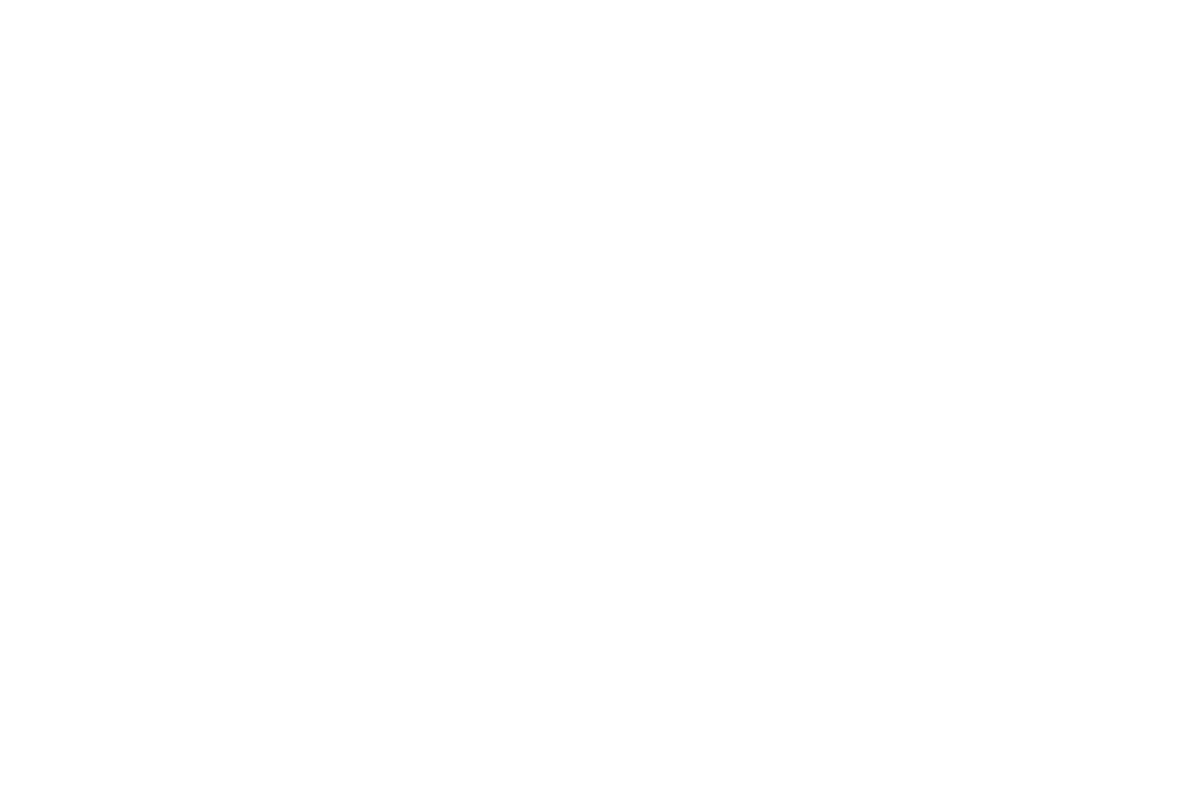

rfinder_plots - INFO : 	 ... ALT/AZ for S1342+5324 ...

rfinder - INFO : ---- Alt/Az plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 2D ... 



<IPython.core.display.Javascript object>


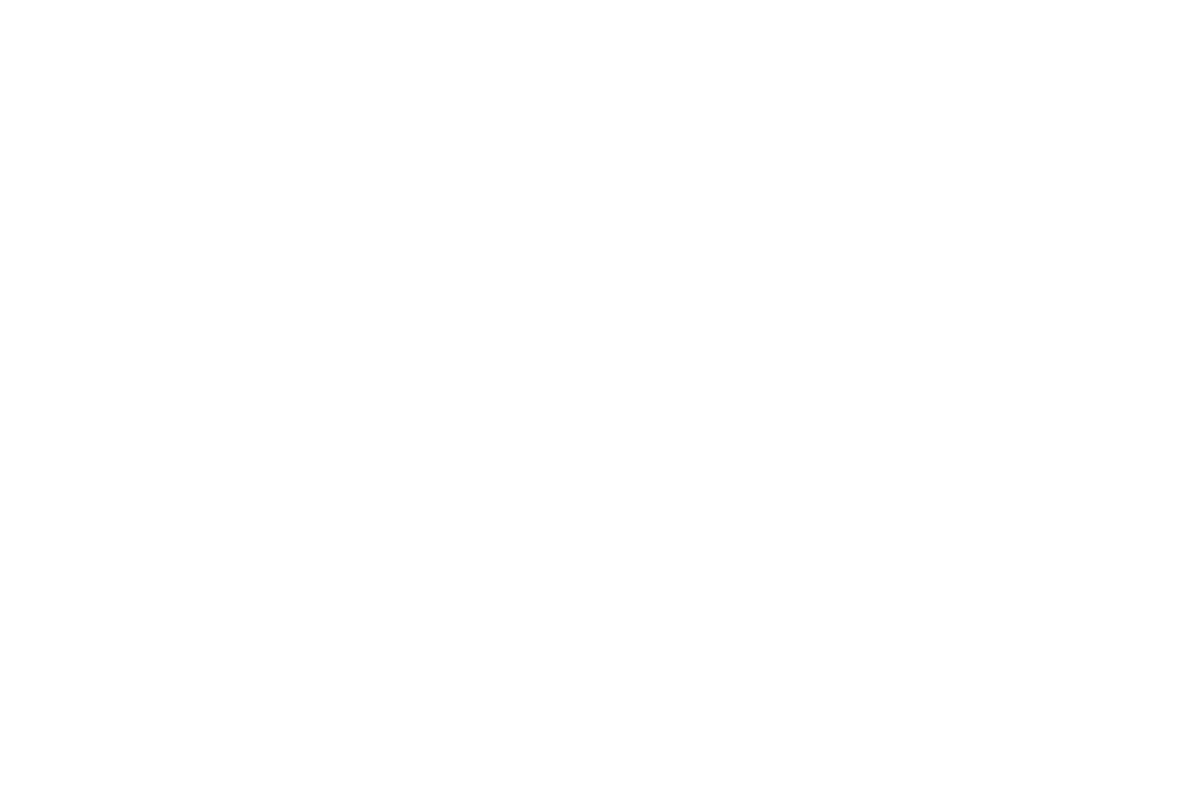

rfinder_plots - INFO : 	 ... RFI per baseline lenght and frequency plotted ... 


rfinder - INFO : ---- RFI in 2D plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


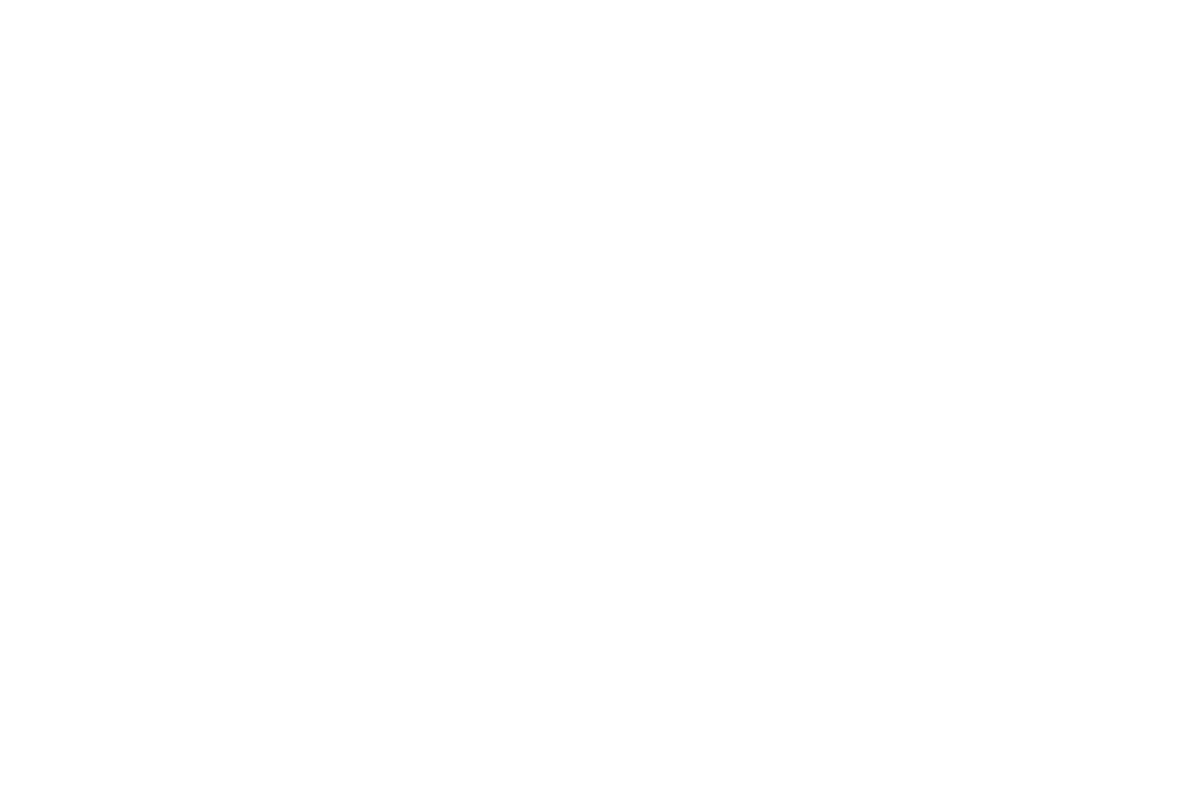

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


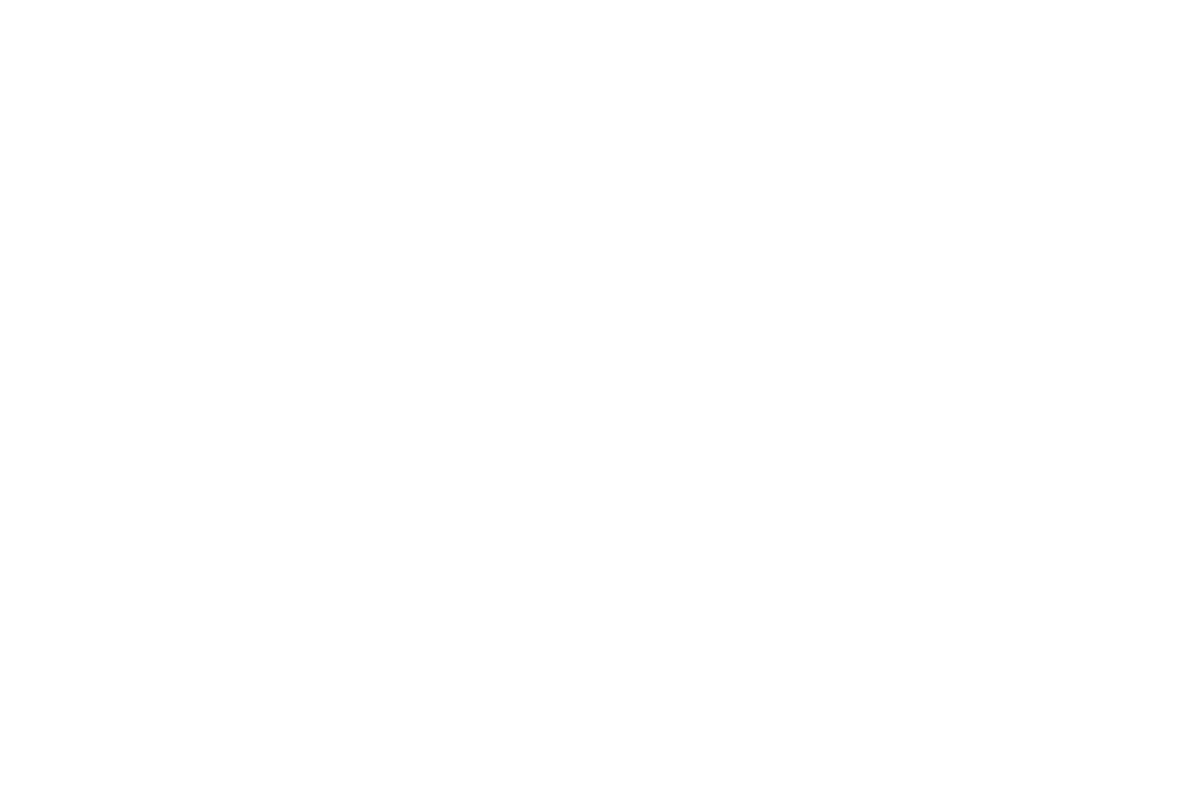

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting factor of noise increas per frequency channel ...


<IPython.core.display.Javascript object>


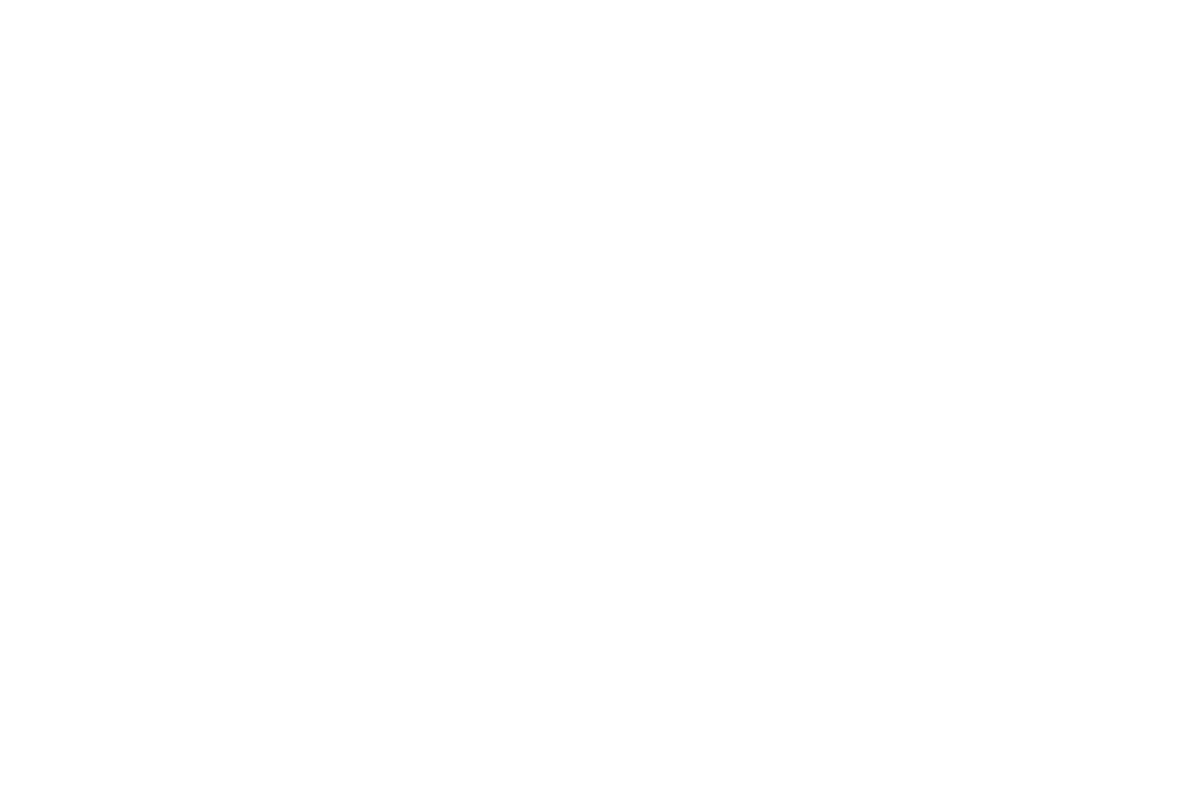

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 



<IPython.core.display.Javascript object>


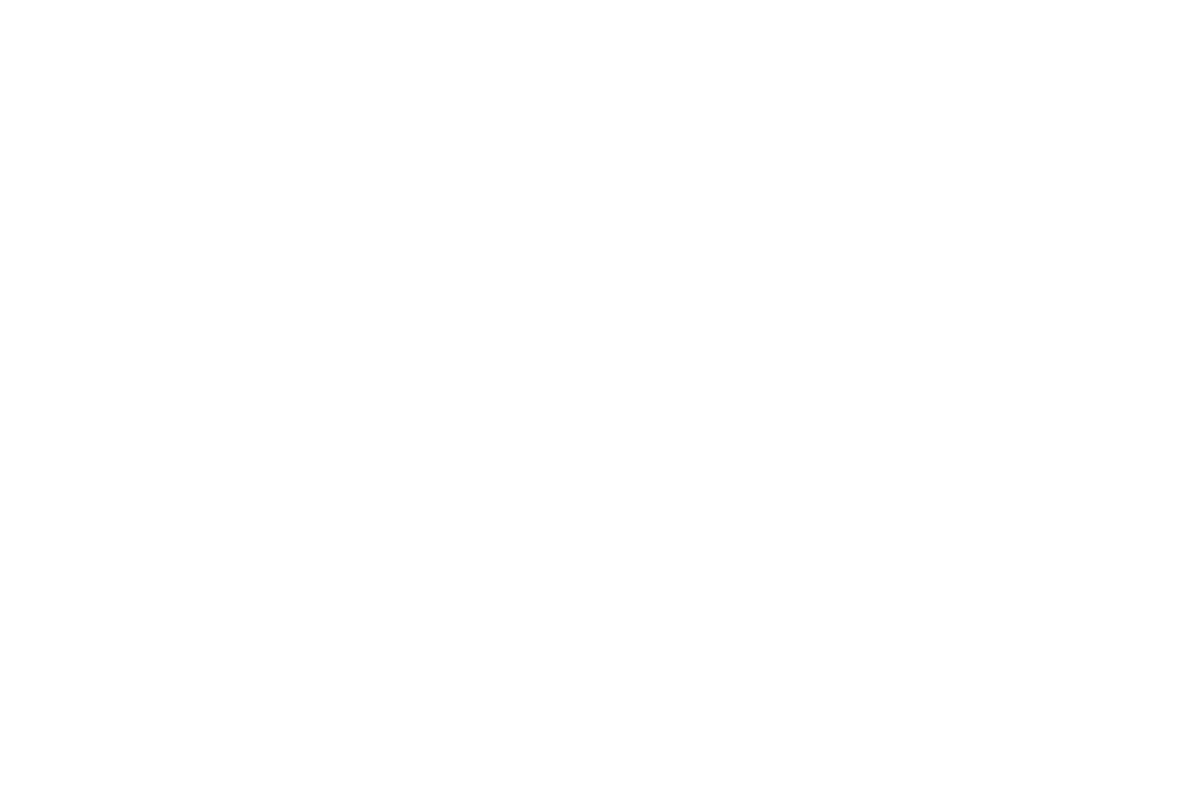

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder - INFO : ---- RFI in 1D plotted ----

rfinder - INFO :  ------ End of RFInder ------ 




	+------+
	 Html report done 
	+------+
	+------+
	 Done 
	+------+


In [8]:
#before doing the flagging, want to try the RFInder module to get a sense of the data quality
#load preflag for paths and such
preflag = apercal.preflag(cfgfile)


# get parameters and run the RFInder module
rfi_par = rfinder.rfinder('/home/adams/rfinder_default.yml')

# Set working directory & filenames
#rfi_par.cfg_par['general']['workdir'] = '/home/vdhulst/Data/A0030+50/00/raw/'
rfi_par.cfg_par['general']['workdir'] = preflag.rawdir+'/' #look at central beam, add trailing slash
# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True
rfi_par.cfg_par['beam_shape']['enable'] = False
rfi_par.cfg_par['plots']['enable'] = True
# MS file
rfi_par.cfg_par['general']['msname'] = [preflag.target]

rfi_par.set_dirs()
# print parameters
print rfi_par.cfg_par

#run rfinder
run = rfi_par.go(rfi_par.cfg_par)

if run == 0: 
    print '\t+------+\n\t Done \n\t+------+'

/home/adams/rfirfi_q/plots/rfi_base_full.png


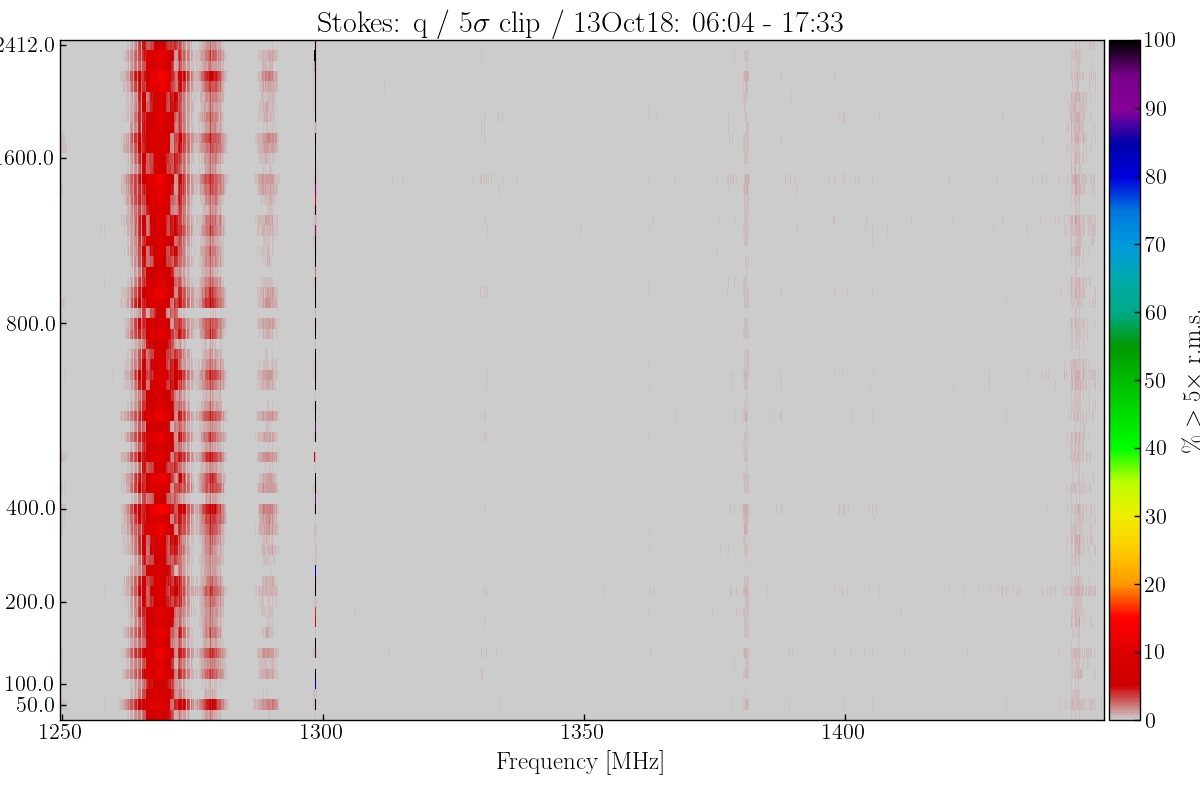

/home/adams/rfirfi_q/plots/flags_full_sl_rfi.png


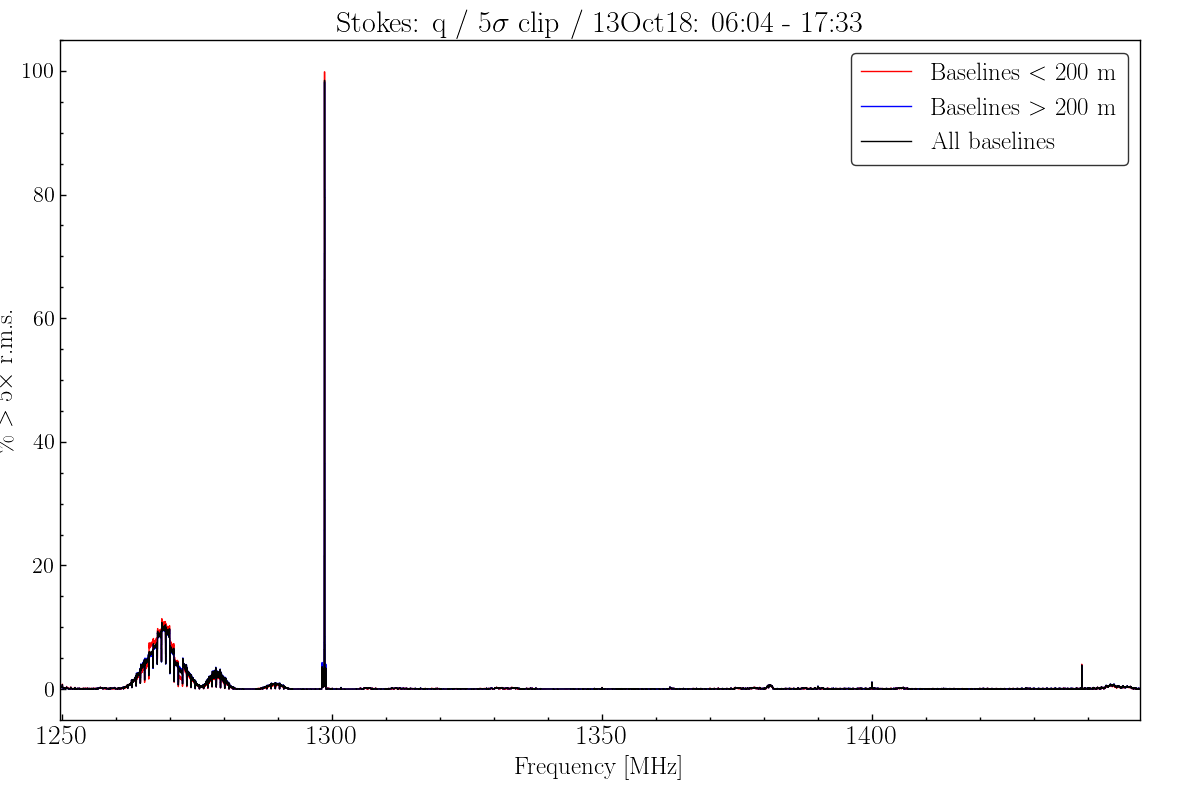

/home/adams/rfirfi_q/plots/noisefactor_full_sl_rfi.png


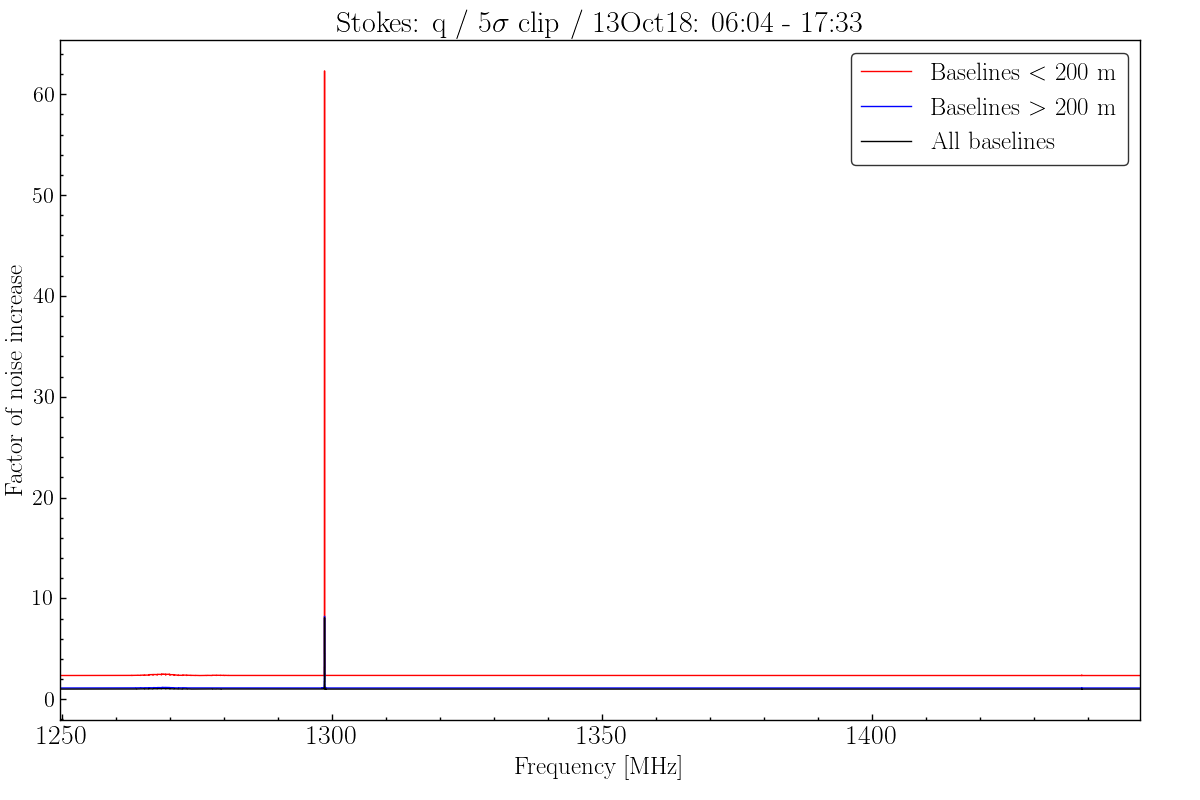

/home/adams/rfirfi_q/plots/AltAZ_full.png


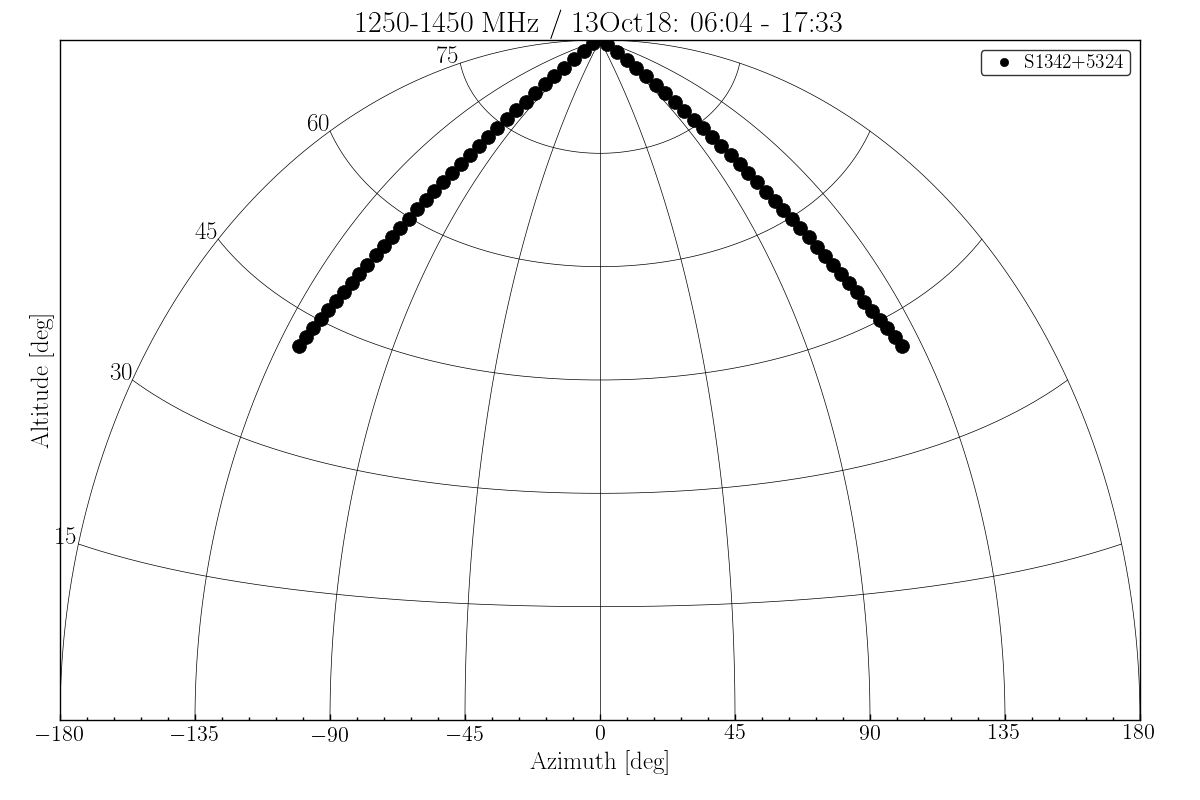

/home/adams/rfirfi_q/plots/noise_full_sl_rfi.png


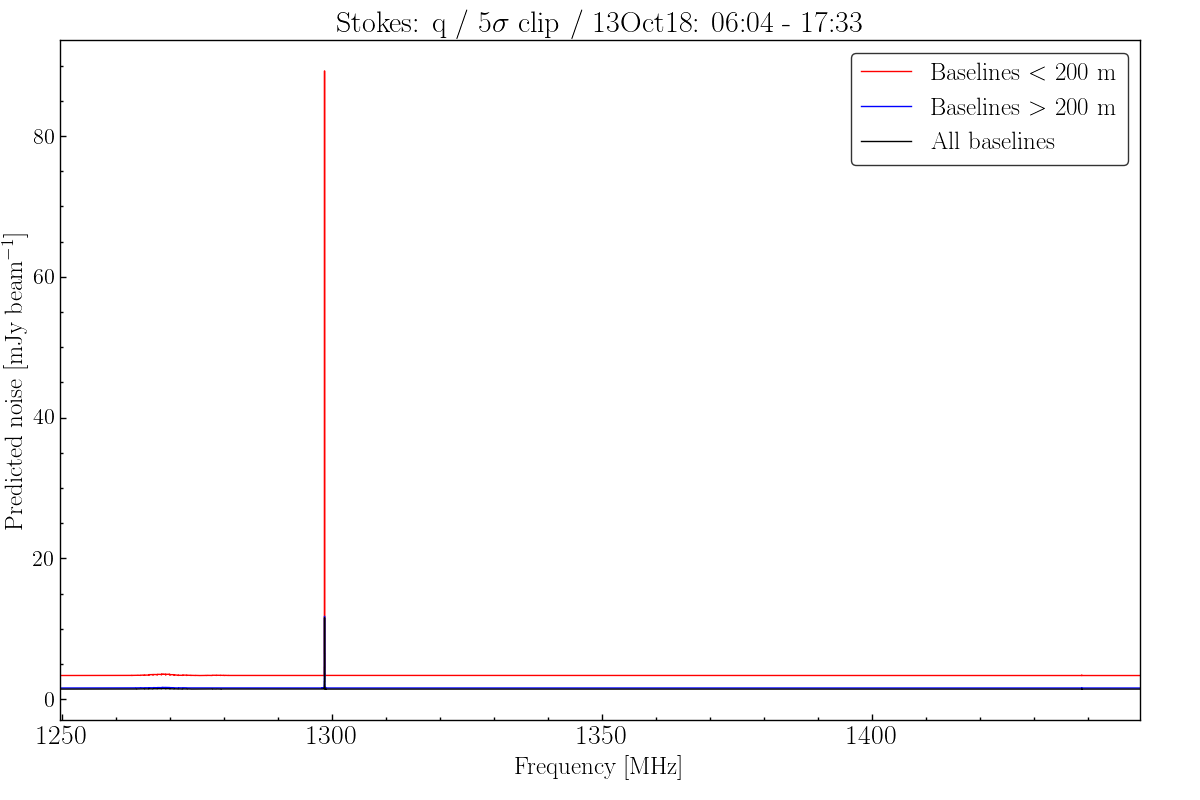

In [11]:
rfipltlist_png = glob.glob('/home/adams/rfirfi_q/plots' +'/'+'*png')

# load files as images
x=Image(rfipltlist_png[0])
y=Image(rfipltlist_png[1])
z=Image(rfipltlist_png[2])
w=Image(rfipltlist_png[3])
v=Image(rfipltlist_png[4])

#then display all images
print rfipltlist_png[0] 
display(x)
print rfipltlist_png[1]
display(y)
print rfipltlist_png[2]
display(z)
print rfipltlist_png[3]
display(w)
print rfipltlist_png[4]
display(v)

In [12]:
preflag = apercal.preflag(cfgfile)
preflag.show()

PREFLAG - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


PREFLAG
	preflag_shadow = True
	preflag_edges = True
	preflag_ghosts = True
	preflag_manualflag = True
	preflag_manualflag_fluxcal = True
	preflag_manualflag_polcal = True
	preflag_manualflag_target = True
	preflag_manualflag_targetbeams = all
	preflag_manualflag_auto = True
	preflag_manualflag_antenna = 
	preflag_manualflag_corr = 
	preflag_manualflag_baseline = 
	preflag_manualflag_channel = 
	preflag_manualflag_time = 
	preflag_aoflagger = True
	preflag_aoflagger_bandpass = True
	preflag_aoflagger_fluxcal = True
	preflag_aoflagger_polcal = True
	preflag_aoflagger_target = True
	preflag_aoflagger_targetbeams = all
	preflag_aoflagger_fluxcalstrat = fluxcal.rfis
	preflag_aoflagger_polcalstrat = polcal.rfis
	preflag_aoflagger_targetstrat = target.rfis


In [ ]:
#believe I can now directly just run preflag.go()
#will find out!

start = timer()
preflag.go()
end = timer()
print 'Elapsed time for to flag the data is {} minutes'.format((end - start)/60.) #time in minutes



PREFLAG - INFO : ########## Starting Pre-flagging step ##########
PREFLAG - INFO : # Flagging shadowed antennas #
PREFLAG - INFO : # Flagging subband edges #
PREFLAG - INFO : # Flagging ghost channels #


In [15]:
print 'Elapsed time to flag the data is {} minutes'.format((end - start)/60.) #time in minutes
print 'Elapsed time to flag the data is {} hours'.format((end - start)/3600.) #time in hours
print 'Elapsed time to flag the data is {} days'.format((end - start)/(3600.*24)) #time in days

Elapsed time to flag the data is 2108.40488108 minutes
Elapsed time to flag the data is 35.1400813514 hours
Elapsed time to flag the data is 1.46417005631 days


rfinder - INFO : 	 ... Reading parameter file ... 

rfinder - INFO :  ------ STARTING RFI analysis ------

rfi - INFO : 	 ... Field, Antenna & Bandwidth Info ...



Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/FIELD: 9 columns, 1 rows


rfi - INFO : 	Field with name S1342+5324 (Field ID = 0)
rfi - INFO : 	Total number of antennas:	12


Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/ANTENNA: 8 columns, 12 rows


rfi - INFO : 	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]


Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/SPECTRAL_WINDOW: 14 columns, 1 rows

rfi - INFO : 	Channel Width [kHz]:	12.20703125
rfi - INFO : 	Start         [GHz]:	1.249609375
rfi - INFO : 	End           [GHz]:	1.44959716797

rfinder_stats - INFO : 	 ...  Observing time Info ... 




Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 24 columns, 105144 rows


rfinder_stats - INFO : 	 Start date: 18Oct13:06:04:15
rfinder_stats - INFO : 	 End date  : 18Oct13:17:33:55 


rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 



Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 24 columns, 105144 rows


rfinder_stats - INFO : 		 ... Altitude = [41.46909026] deg
rfinder_stats - INFO : 		 ... Azimuth = [52.73099086] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ...  Predicting natural r.m.s. ... 

rfinder_stats - INFO : 	 Assumptions on apertif telescope
rfinder_stats - INFO : 		Dish diameter = 25.0 m
rfinder_stats - INFO : 		 ... and SEFD = 523.131552 Jy
rfinder_stats - INFO : 		 ... and Tsys = 93.0 K
rfinder_stats - INFO : 	 Properties of observation
rfinder_stats - INFO : 		 Total number of baselines = 66.0
rfinder_stats - INFO : 		 Total number of channels = 16384
rfinder_stats - INFO : 		 Observing time on source = 11.50293 h (2 polarisations)

rfinder_stats - INFO : 	 Stokes I natural r.m.s.       = 1.432e+00 mJy/b 
rfinder_stats - INFO : 	 ... Natural r.m.s. predicted ... 

rfi - INFO : 	 ... info from MS file loaded  


rfinder - INFO : ---- MSfile Loaded -----

rfi - INFO : 	 ... Sorting baselines ... 

rfinder_stats - INFO : 	 ... Baseline info .

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [80.27405445] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.18169293] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [81.76902044] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.76285903] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [83.26586486] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.15256958] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [84.76355629] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.18830772] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [46.3549015] deg
rfinder_stats - INFO : 		 ... Azimuth = [302.66413562] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [45.09059135] deg
rfinder_stats - INFO : 		 ... Azimuth = [303.81428636] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [43.8432535] deg
rfinder_stats - INFO : 		 ... Azimuth = [304.97601626] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [42.61357473] deg
rfinder_stats - INFO : 		 ... Azimuth = [306.14951578] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinde

<IPython.core.display.Javascript object>


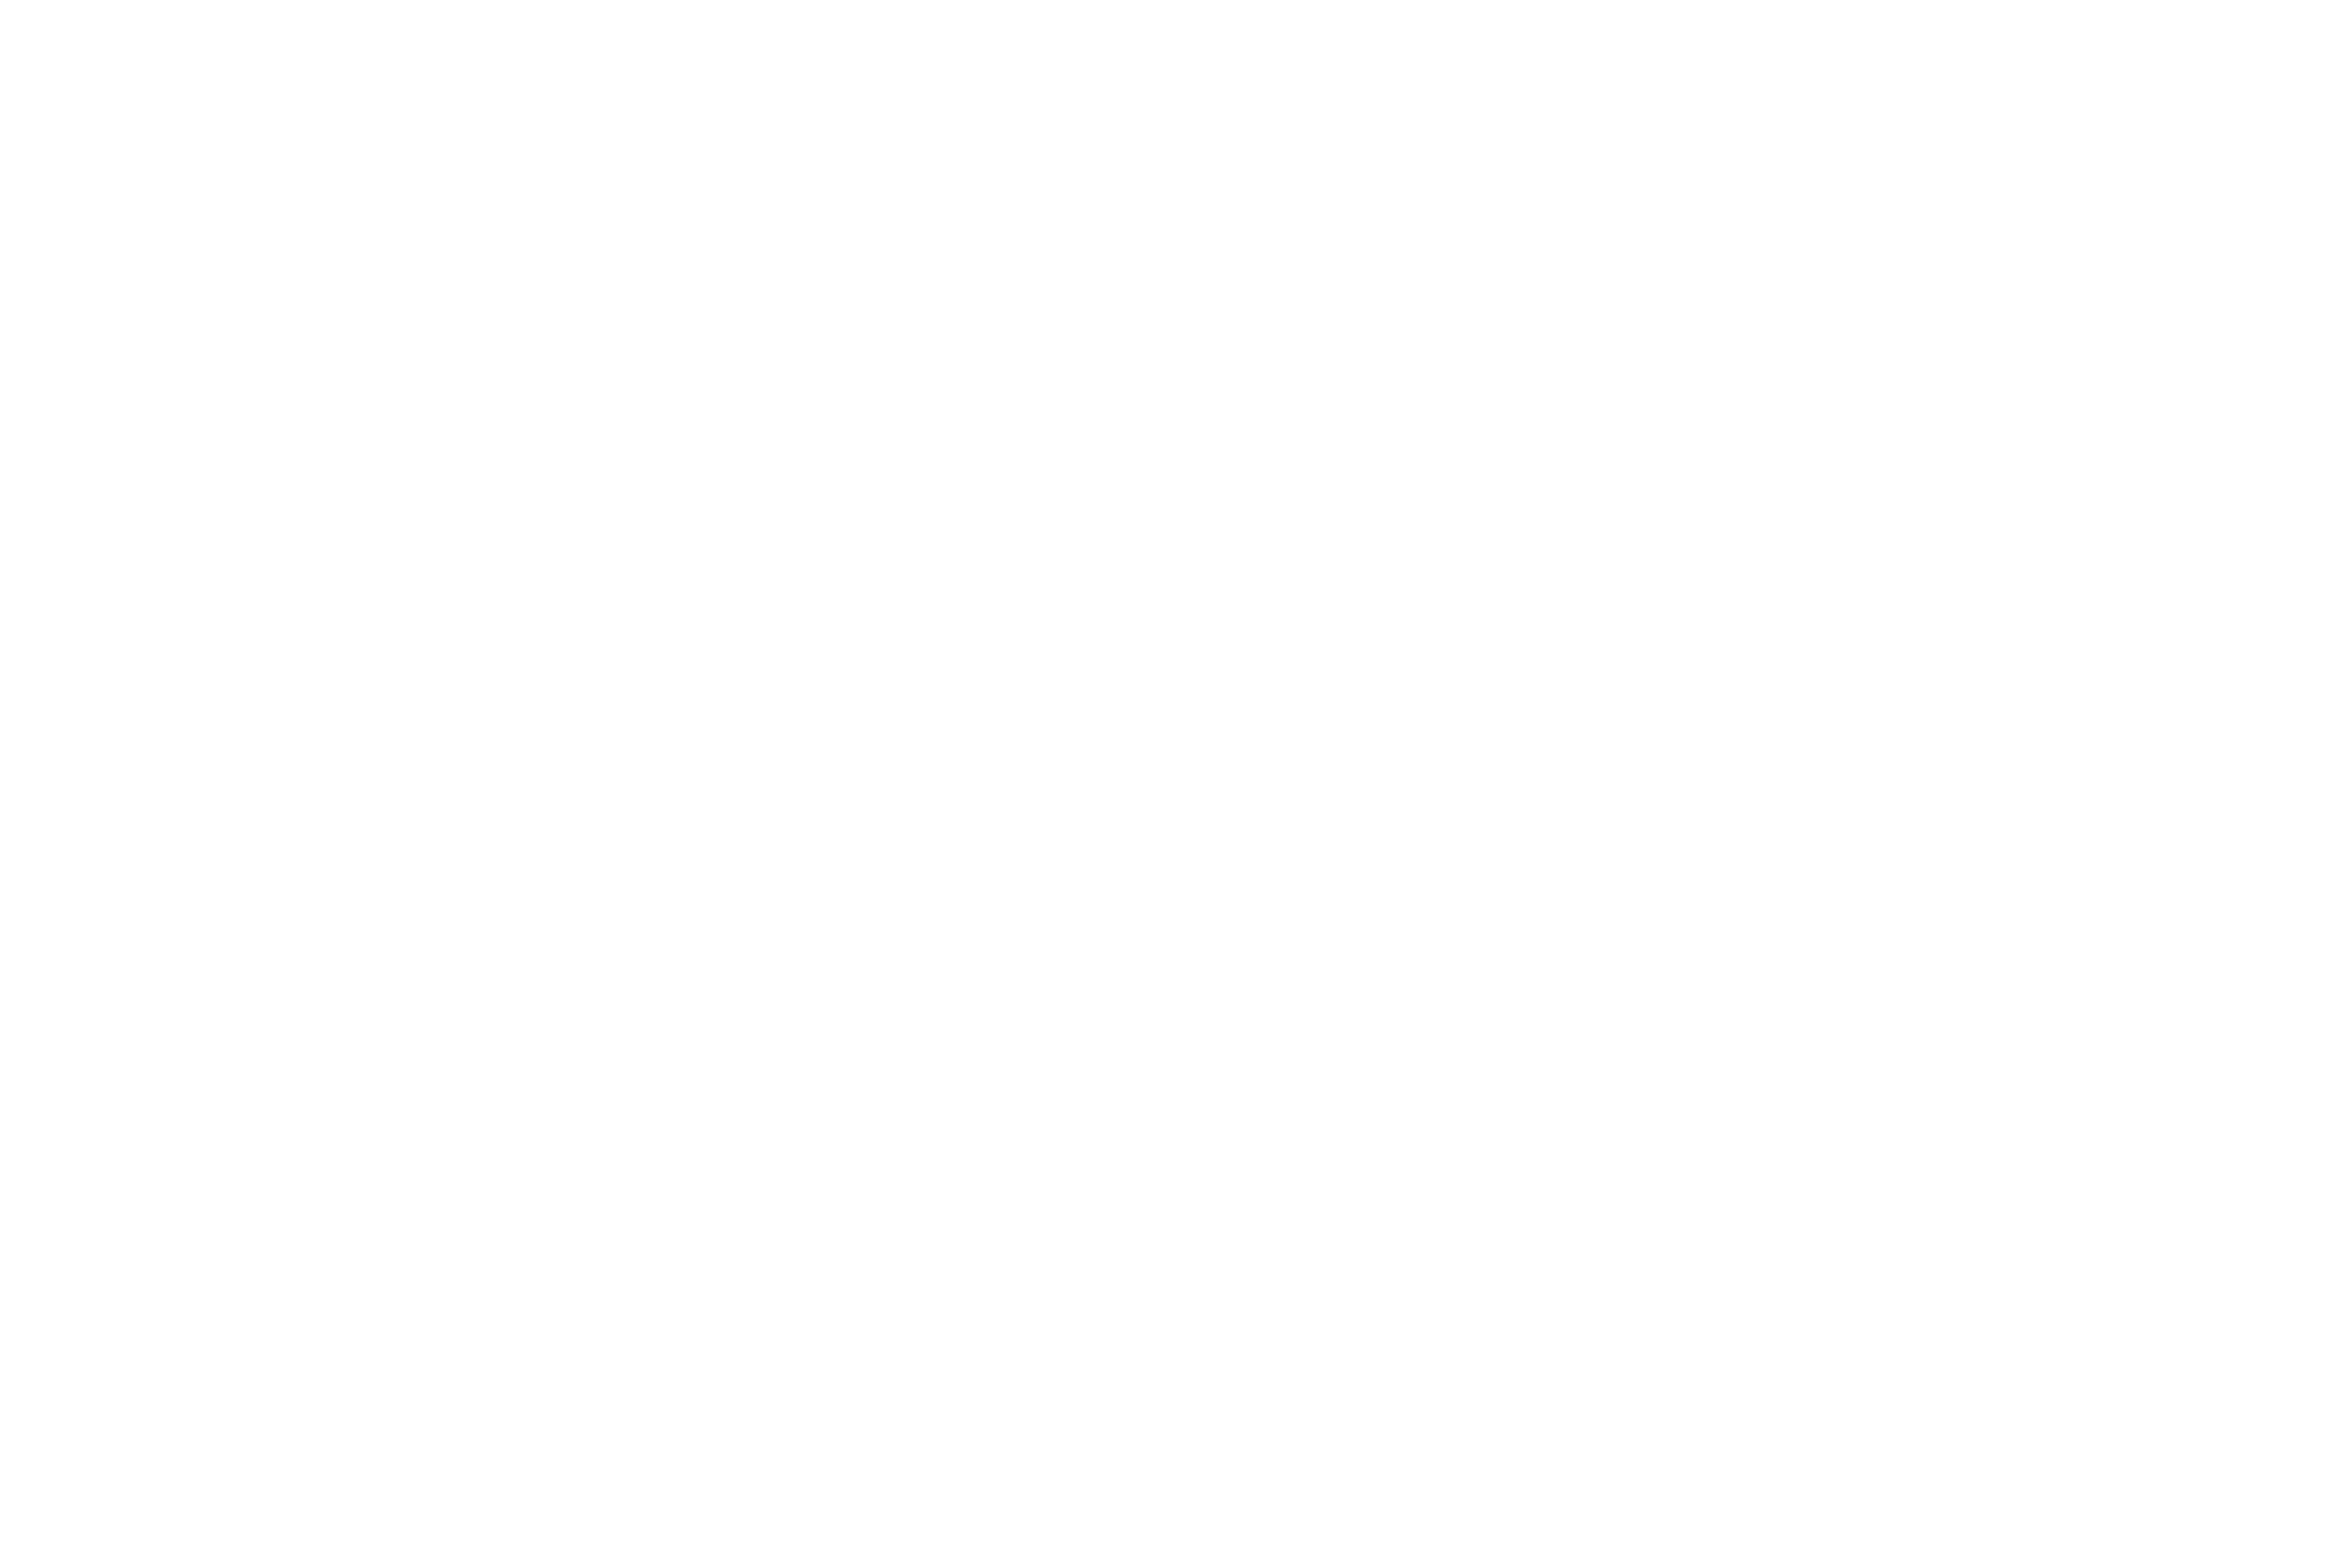

rfinder_plots - INFO : 	 ... ALT/AZ for S1342+5324 ...

rfinder - INFO : ---- Alt/Az plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 2D ... 



<IPython.core.display.Javascript object>


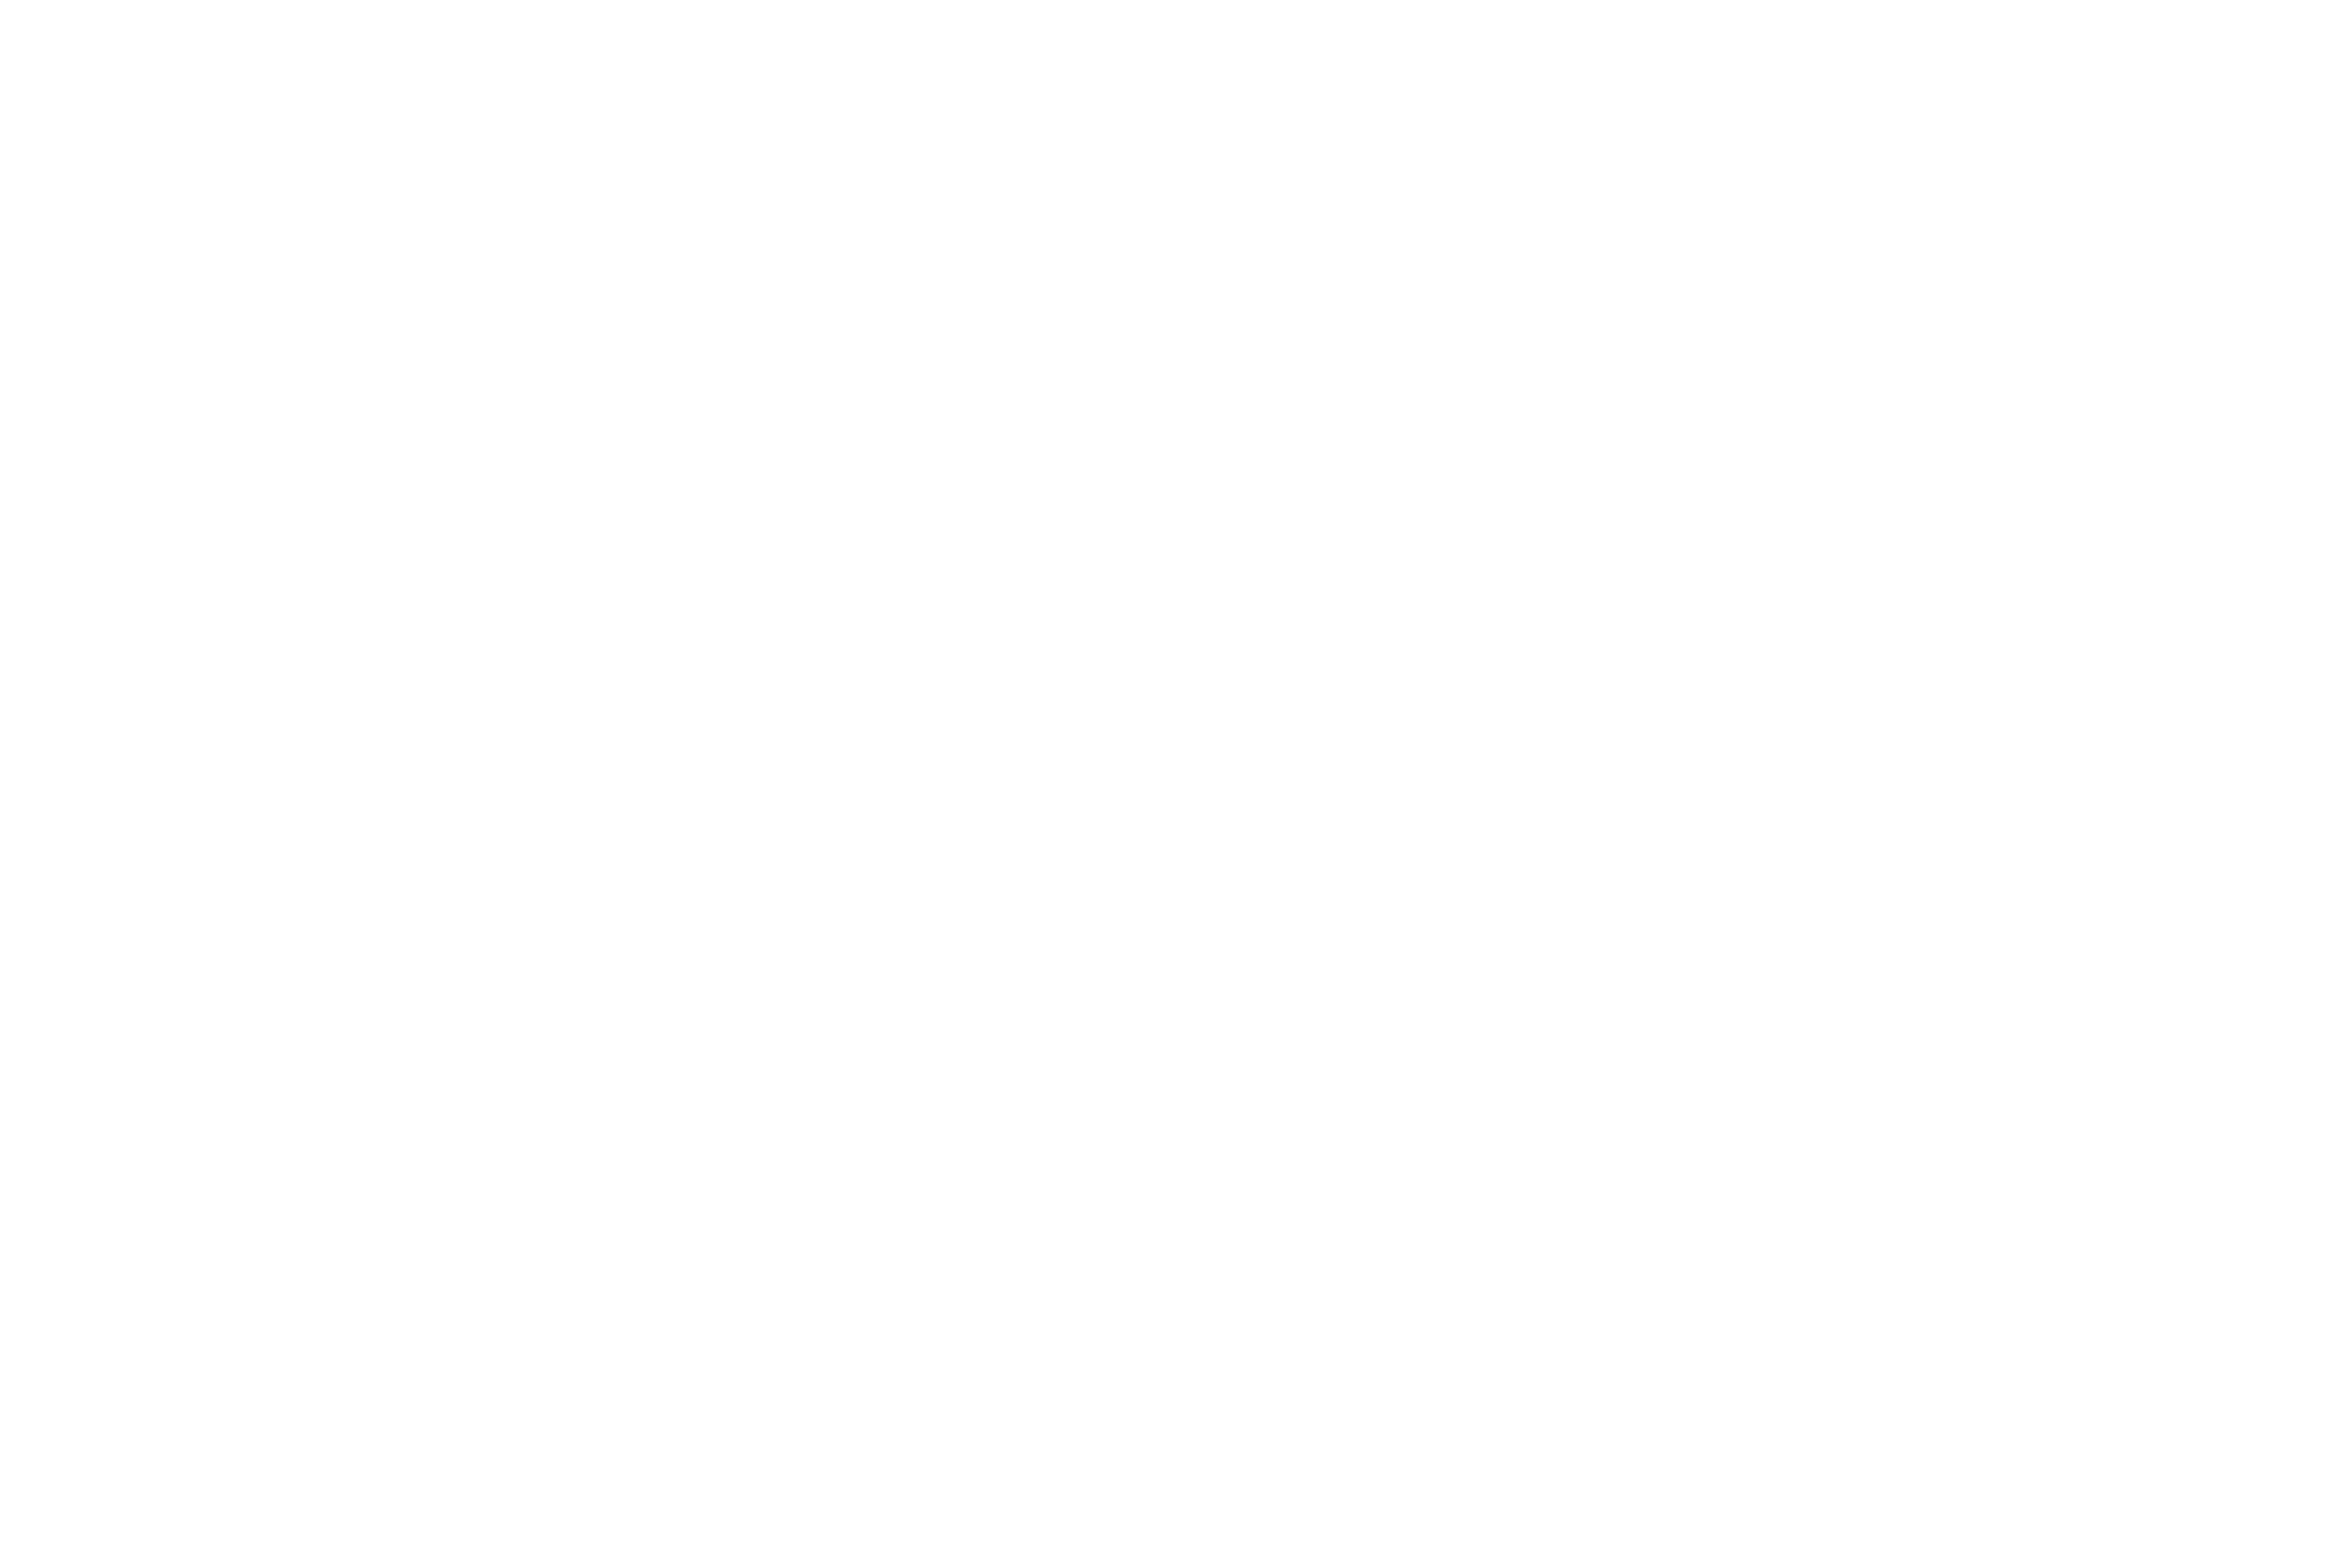

rfinder_plots - INFO : 	 ... RFI per baseline lenght and frequency plotted ... 


rfinder - INFO : ---- RFI in 2D plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


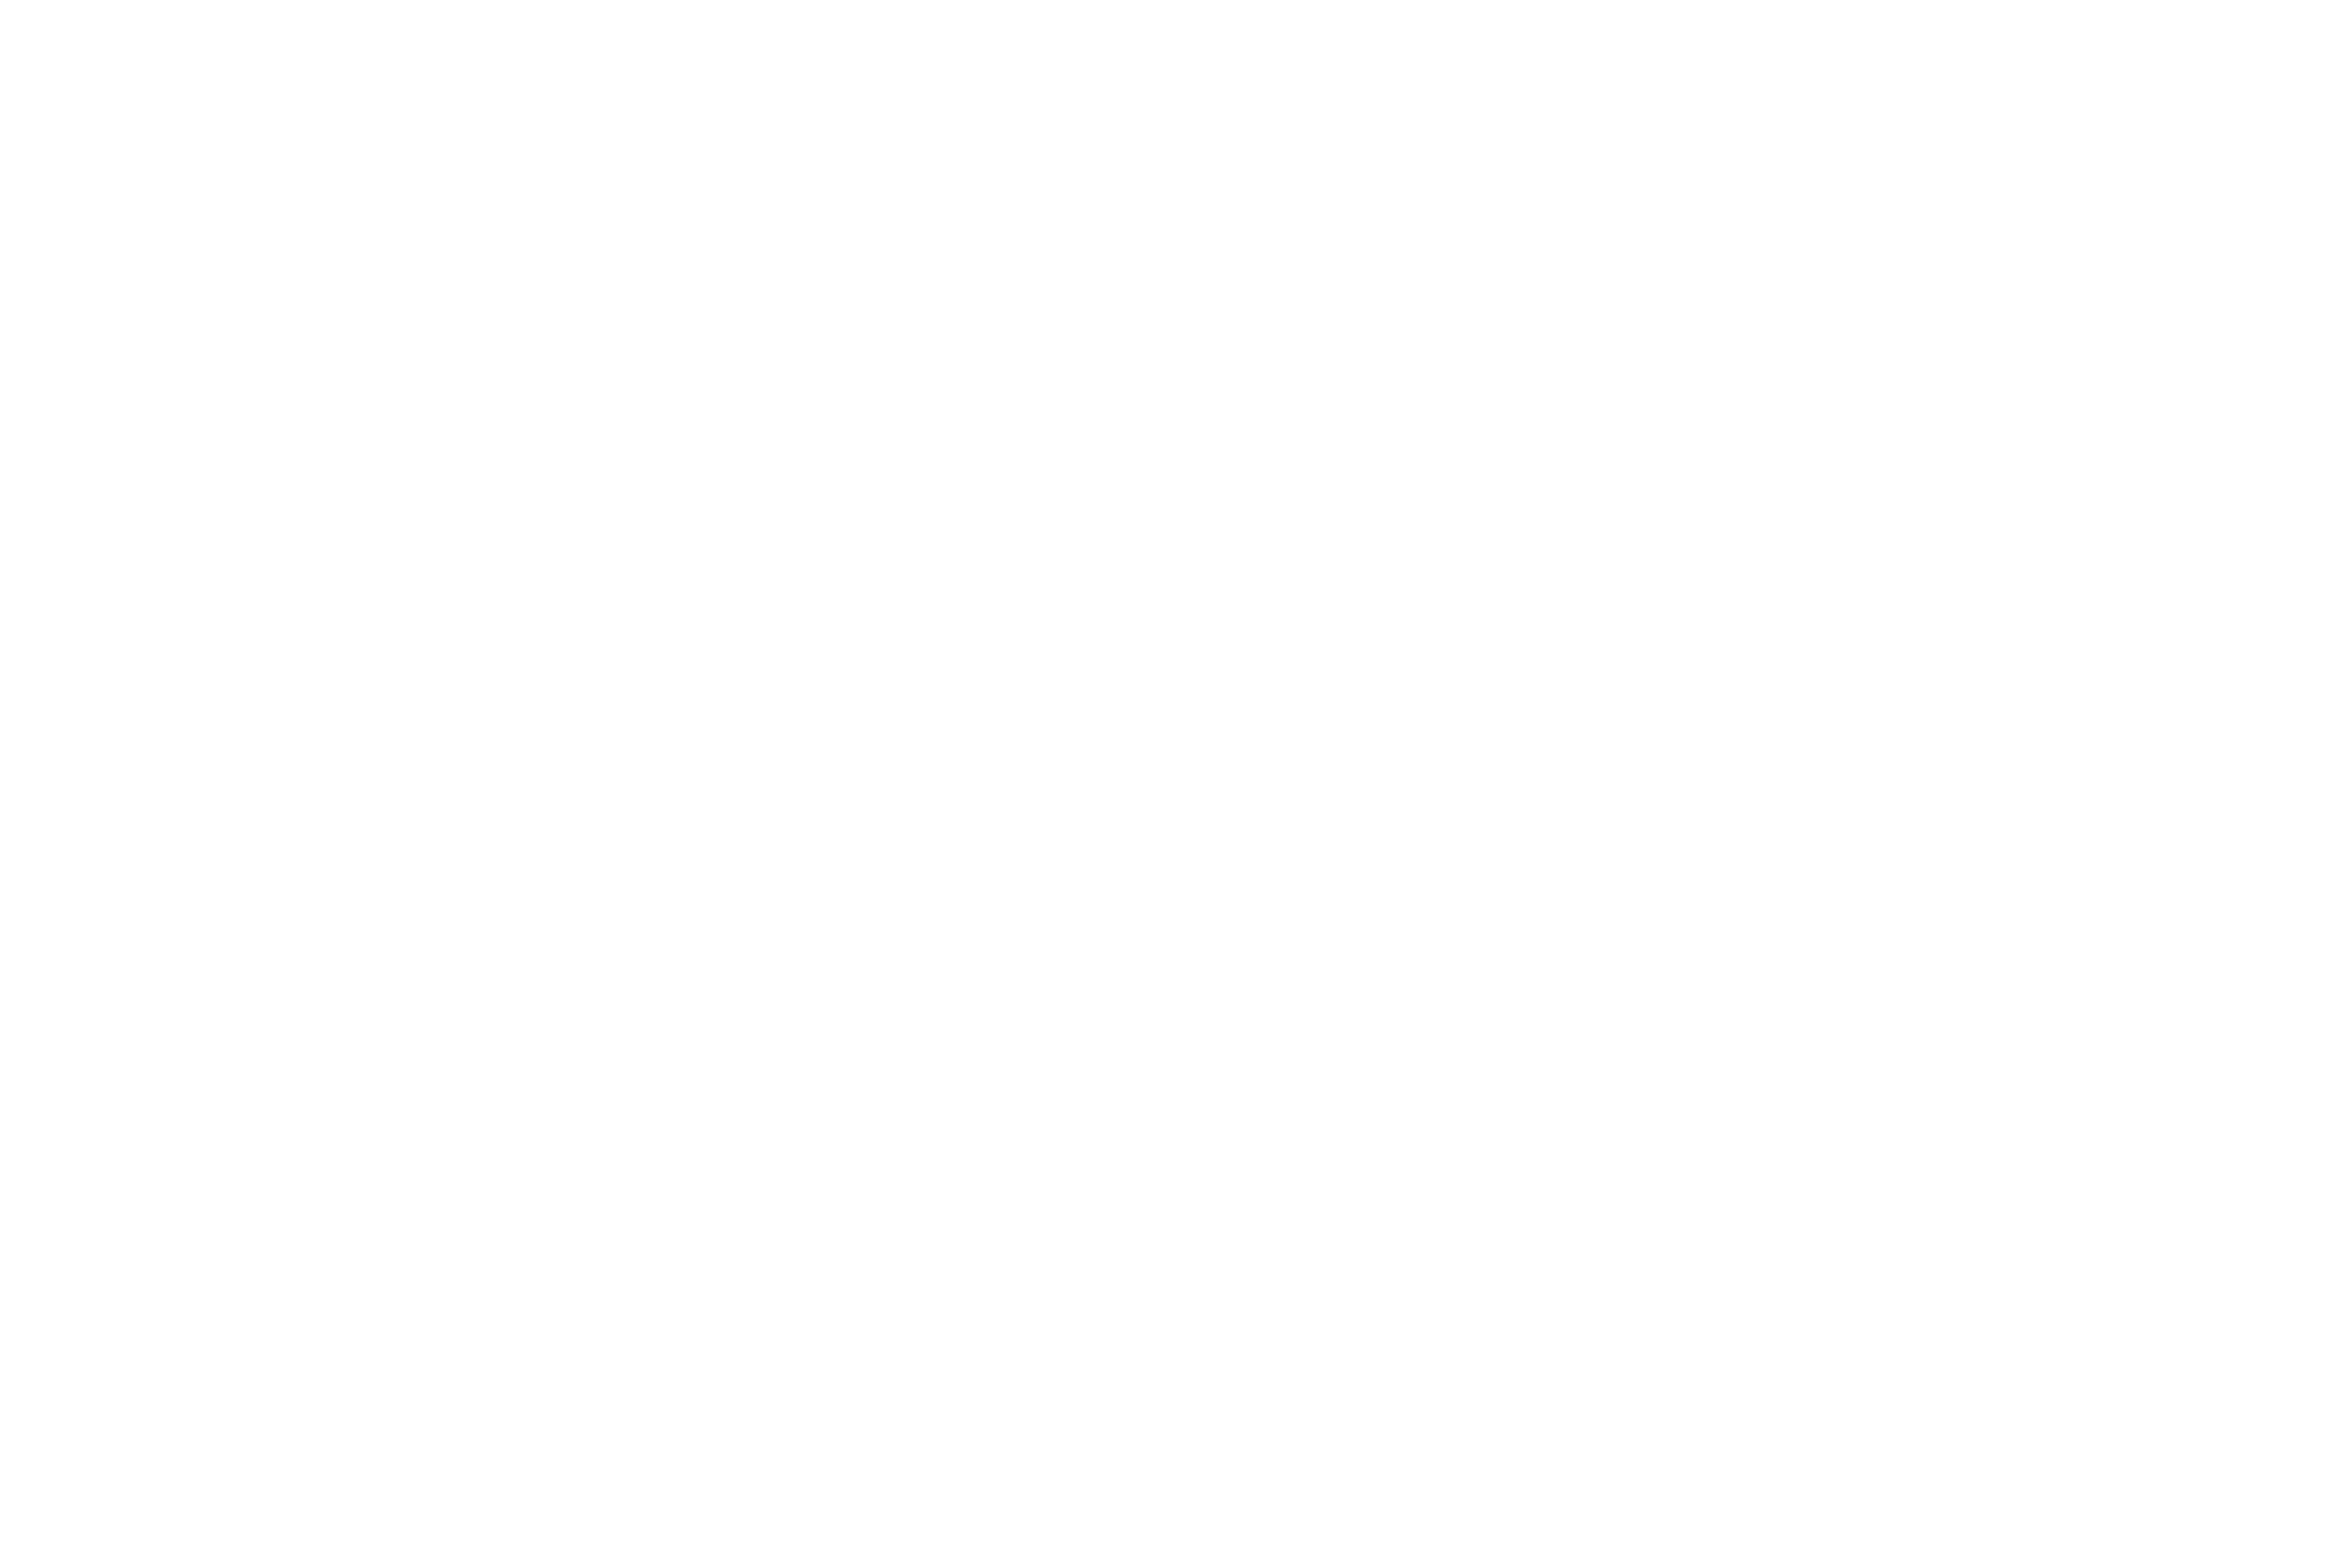

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


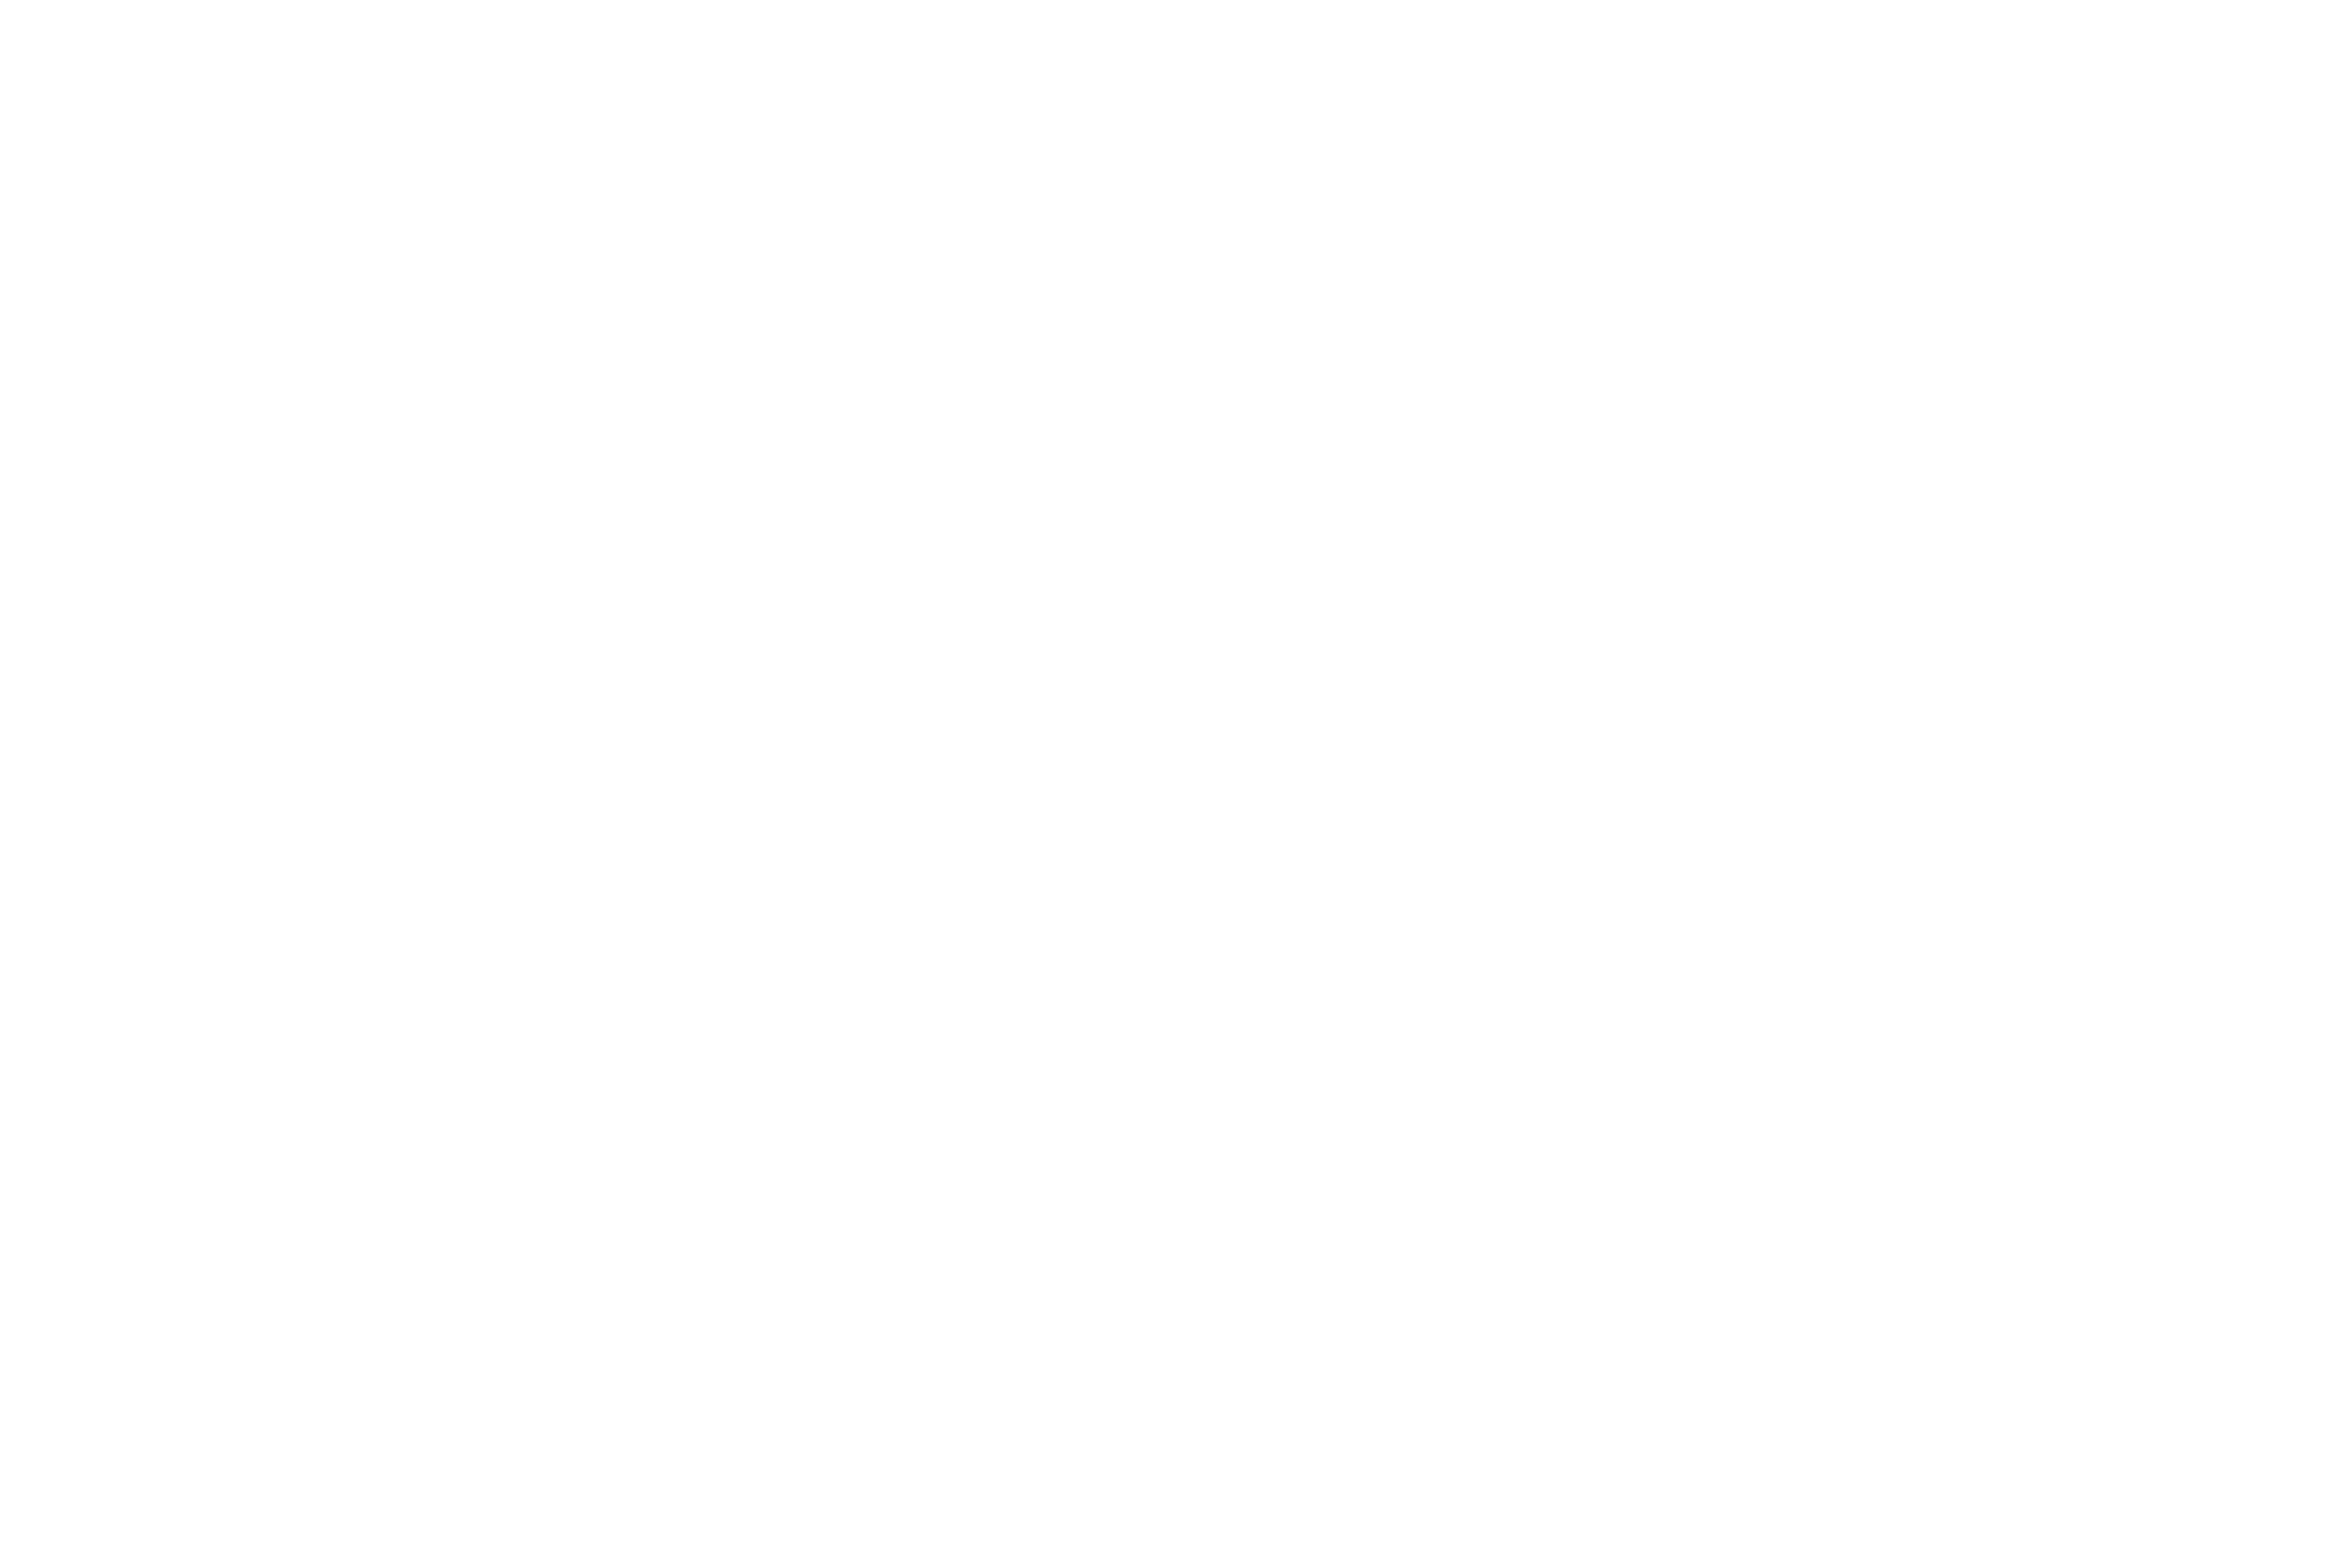

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting factor of noise increas per frequency channel ...


<IPython.core.display.Javascript object>


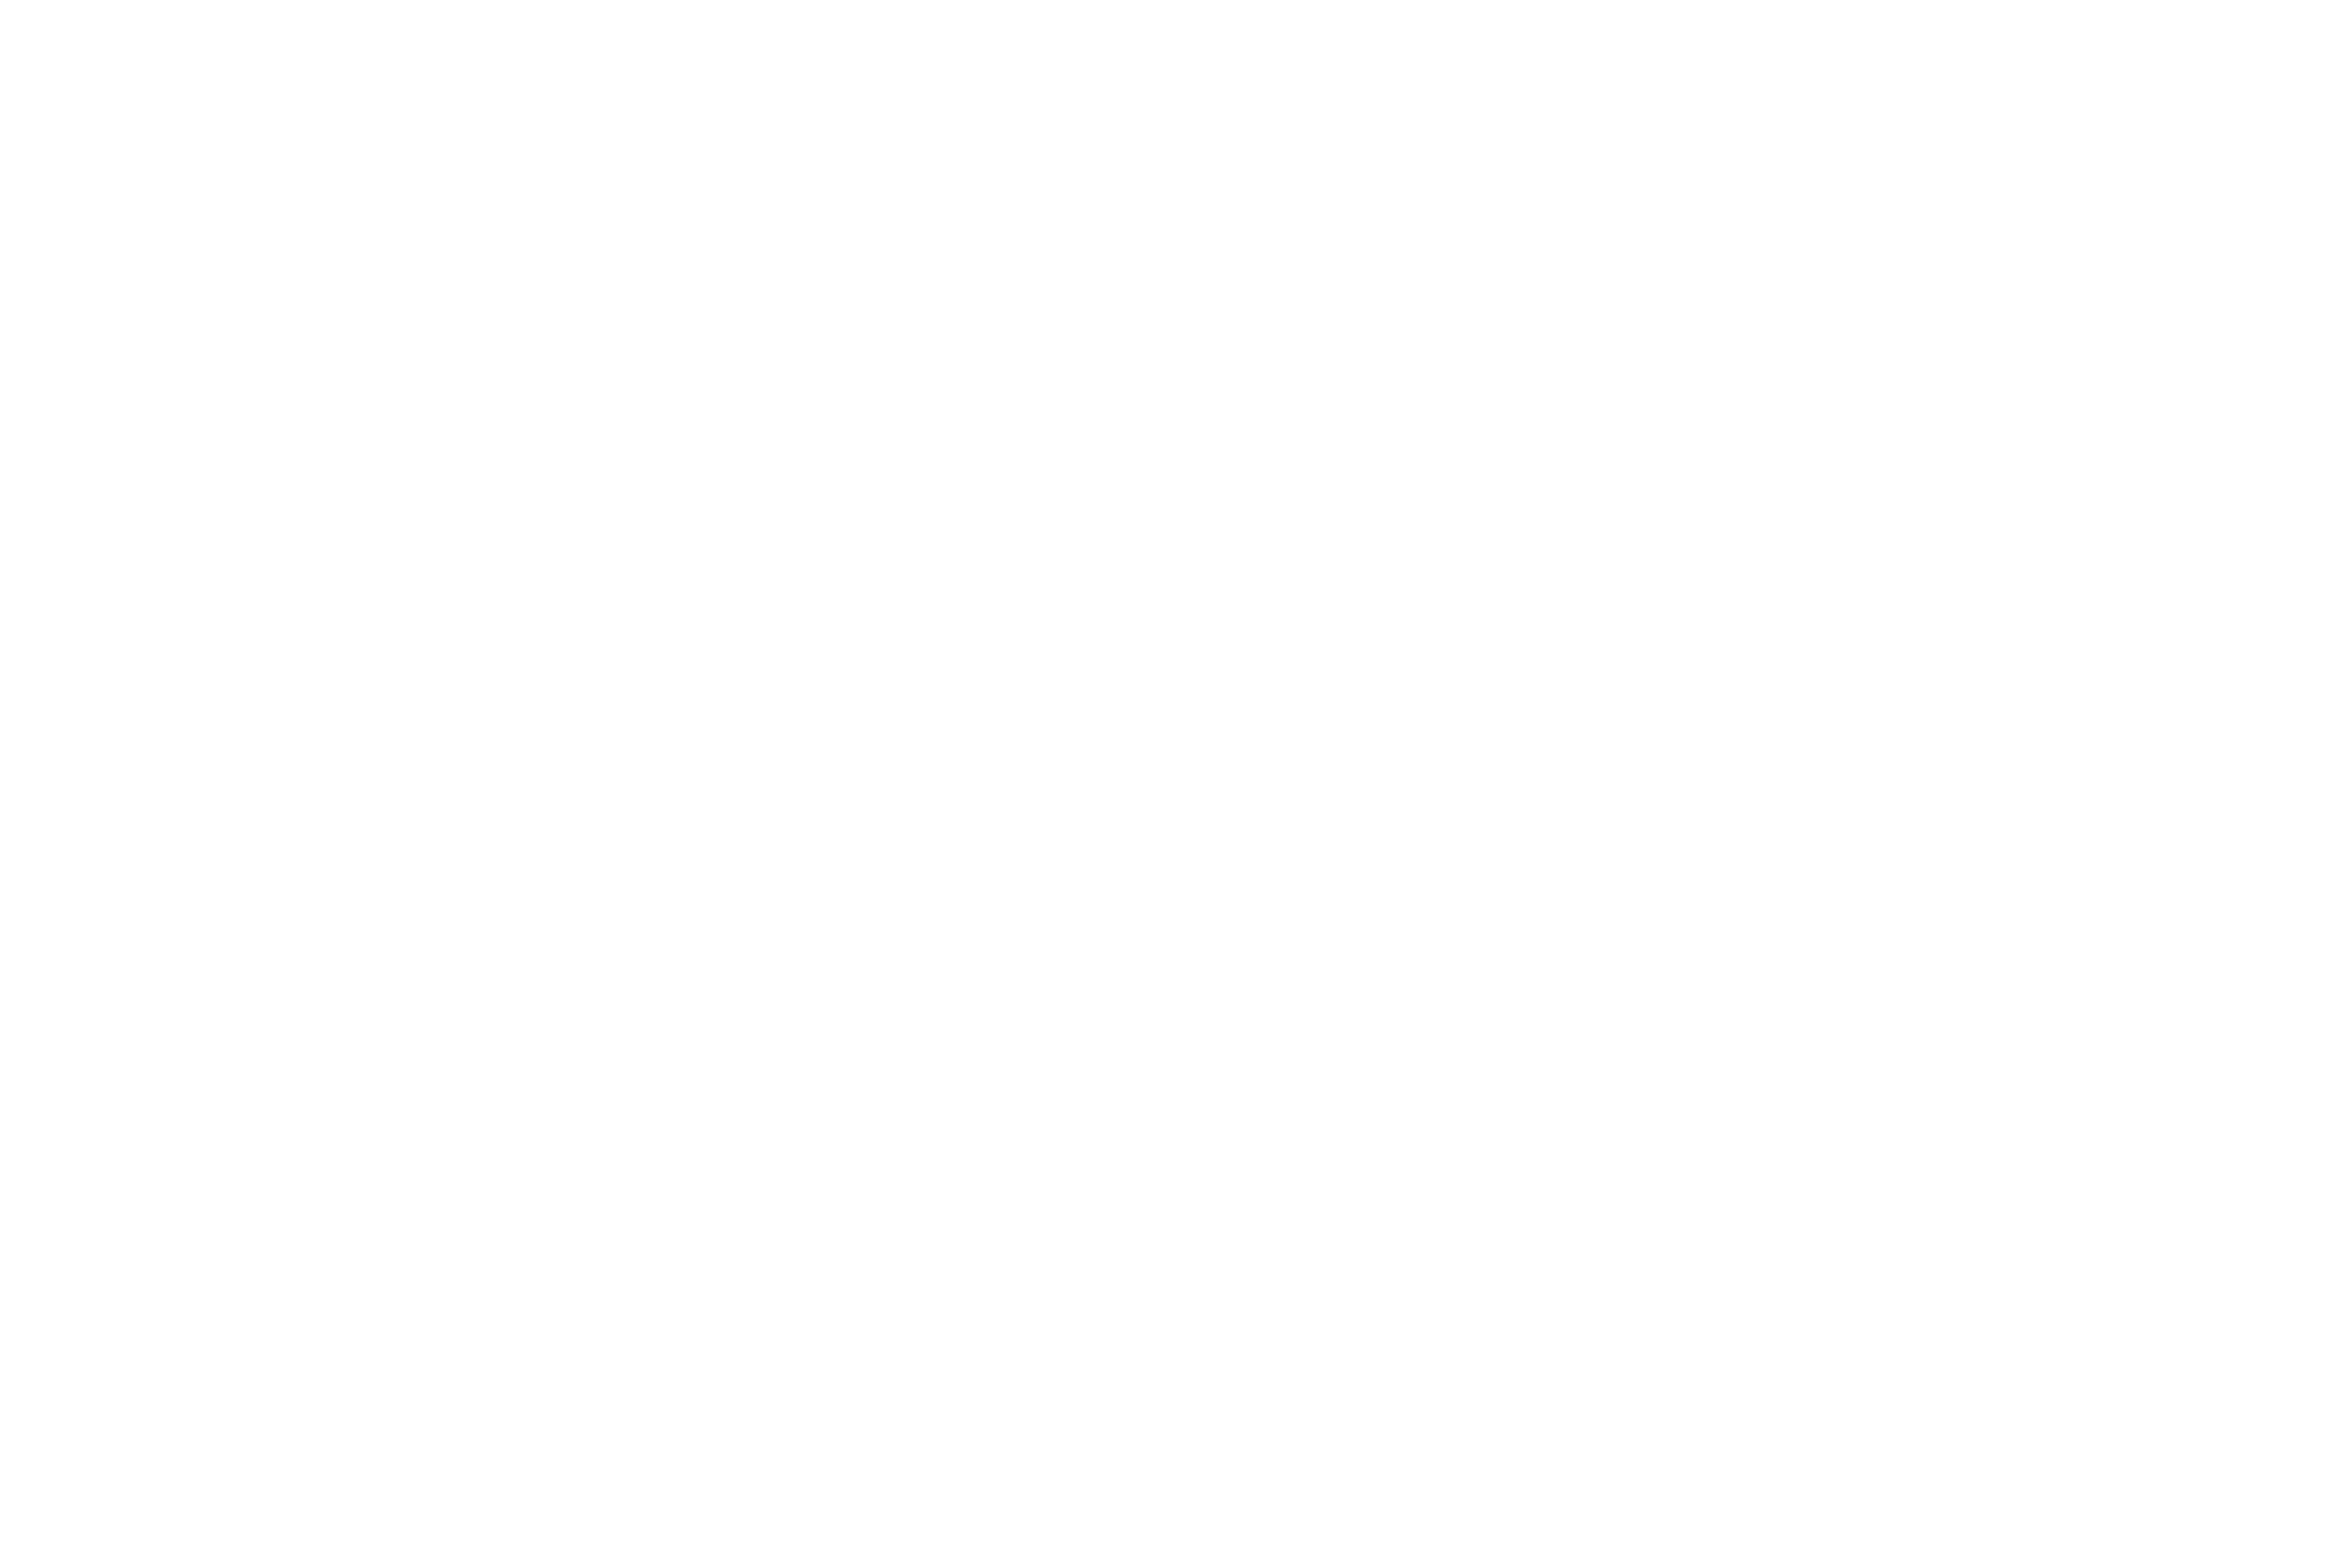

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 



<IPython.core.display.Javascript object>


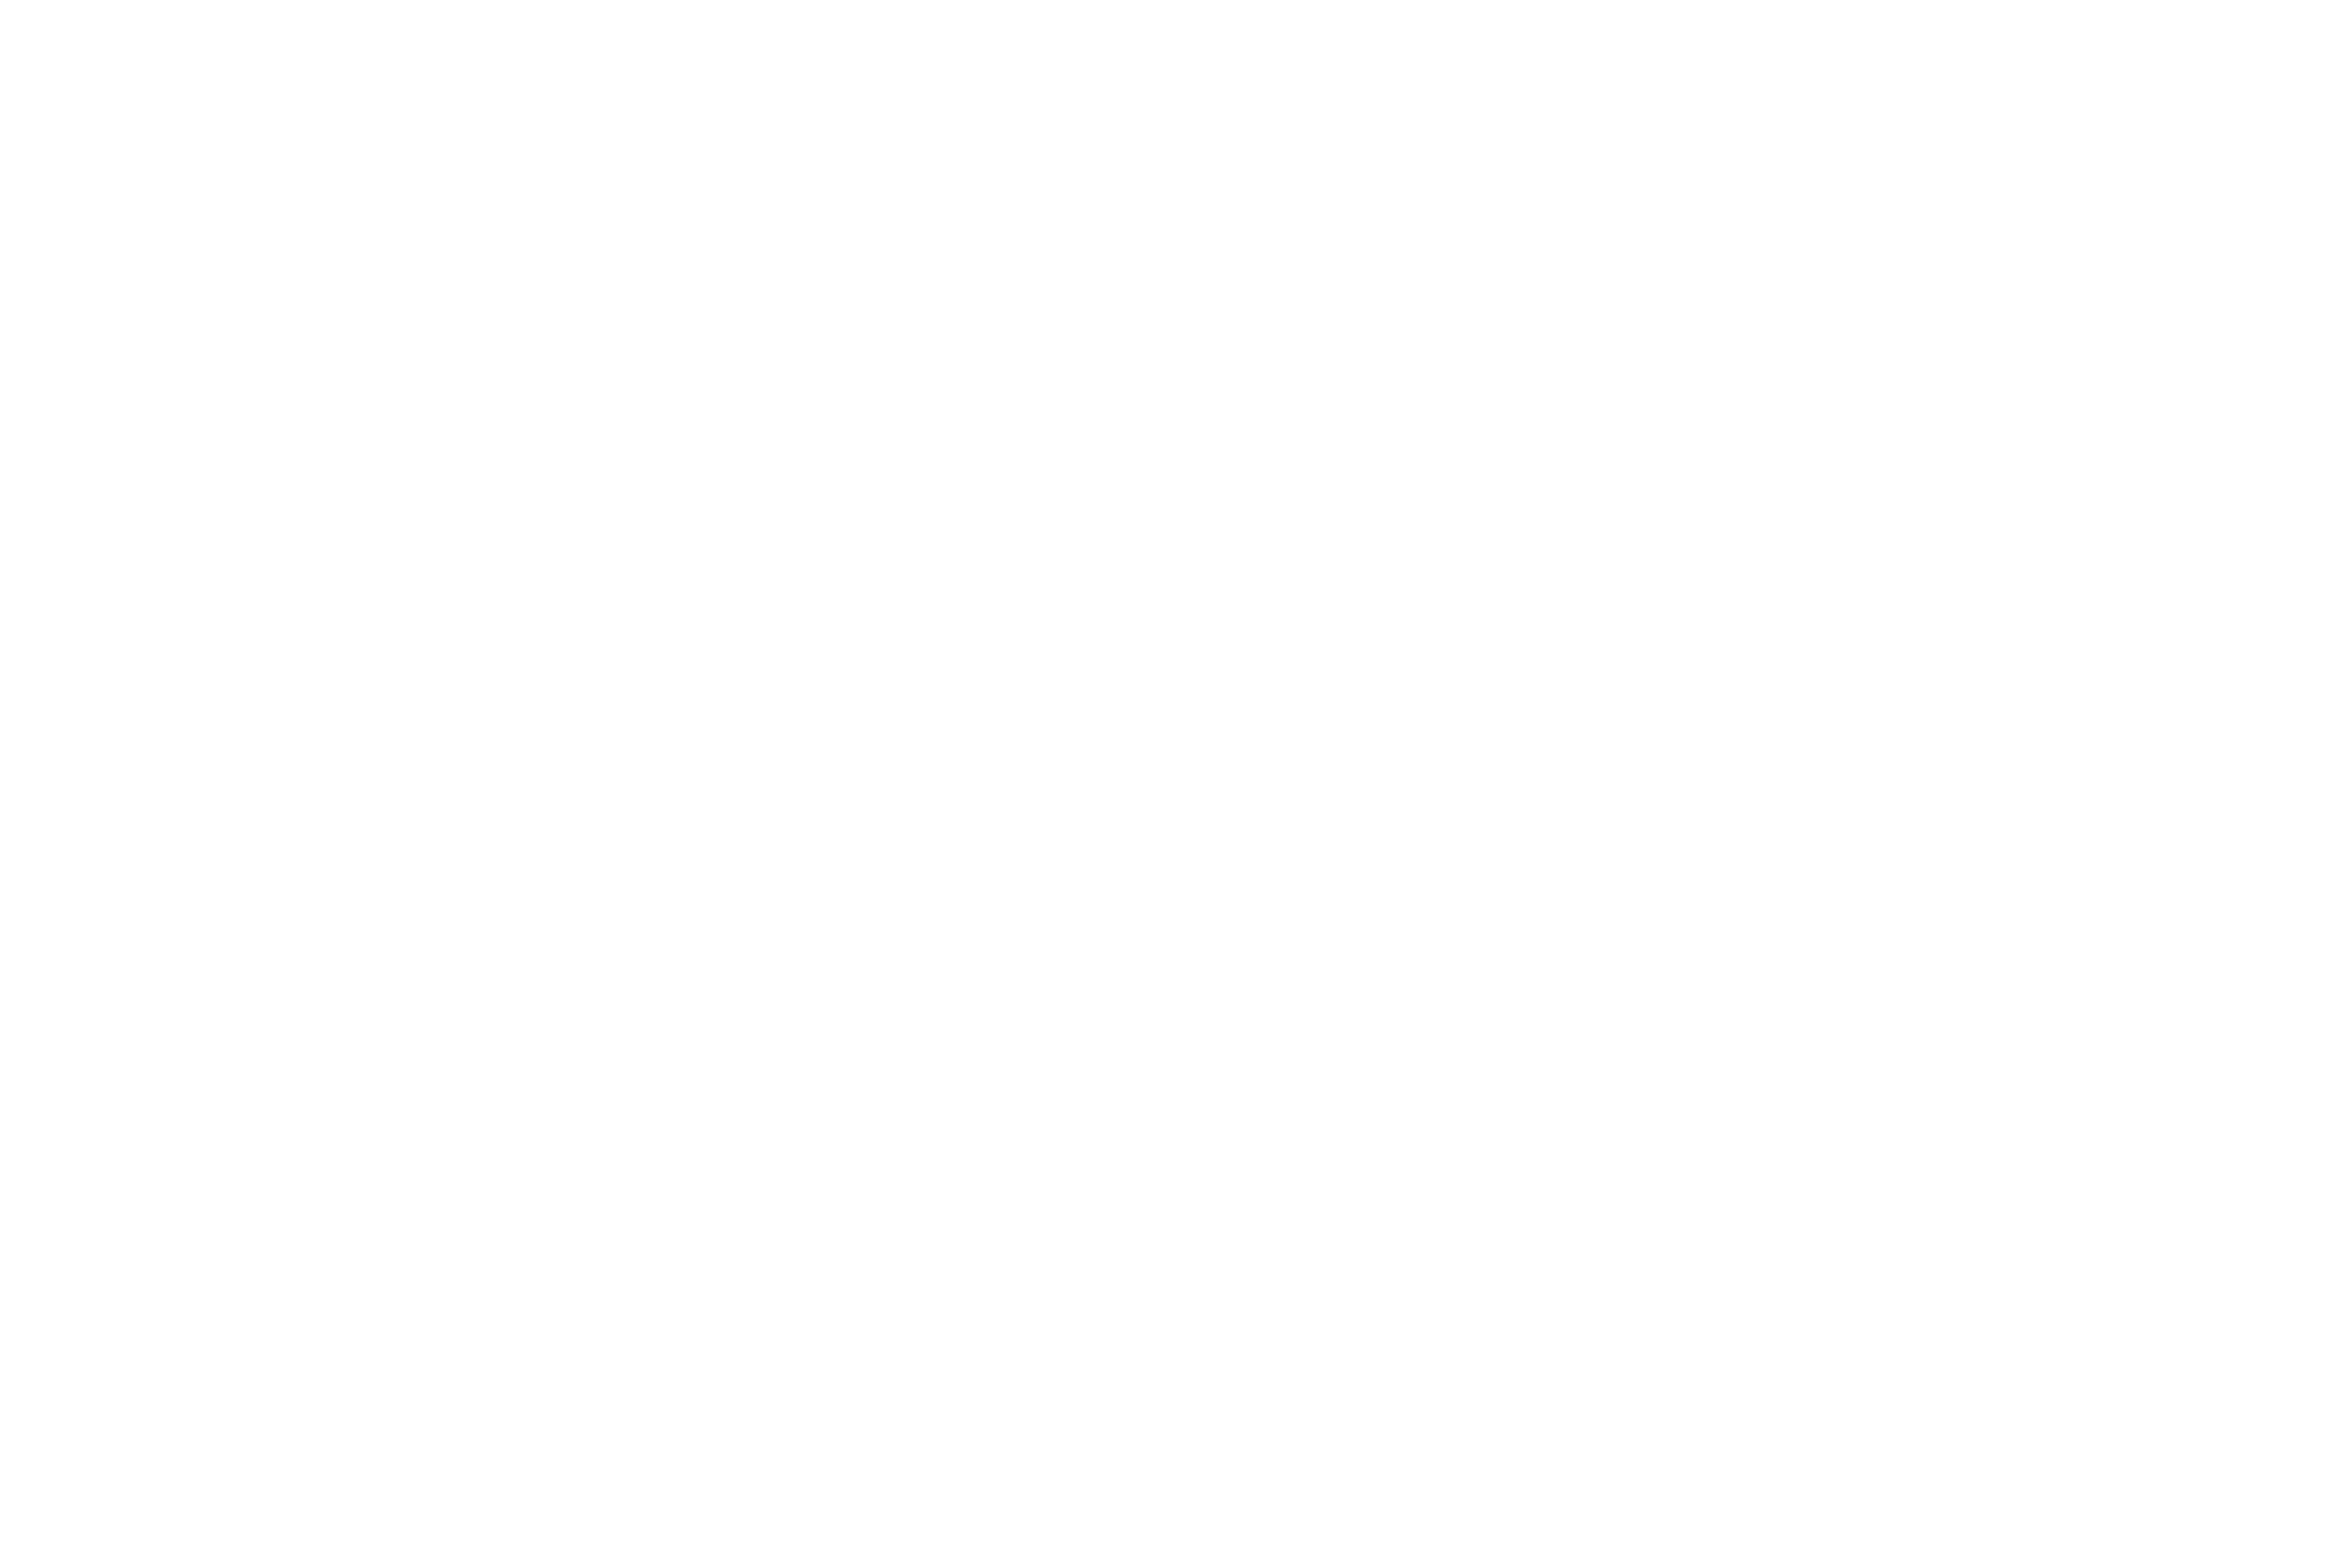

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder - INFO : ---- RFI in 1D plotted ----

rfinder - INFO :  ------ End of RFInder ------ 




	+------+
	 Html report done 
	+------+
	+------+
	 Done 
	+------+
Elapsed time to use RFInder to look at flags is


In [17]:
#before moving on to convert, use RFInder again
#This time want to look at applied flags, and see how that compares
#to predictions made above by RFInder

startrfi=timer()
# get parameters and run the RFInder module
rfi_par = rfinder.rfinder('/home/adams/rfinder_default.yml')

# Set working directory & filenames
rfi_par.cfg_par['general']['workdir'] = preflag.rawdir+'/' #look at central beam, add trailing slash
# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True  
rfi_par.cfg_par['beam_shape']['enable'] = False
rfi_par.cfg_par['plots']['enable'] = True
rfi_par.cfg_par['rfi']['RFInder_mode'] = 'use_flags'  #set it to use flags from MS
# MS file
rfi_par.cfg_par['general']['msname'] = [preflag.target]

rfi_par.set_dirs()
# print parameters
#print rfi_par.cfg_par

#run rfinder
run = rfi_par.go(rfi_par.cfg_par)

if run == 0: 
    print '\t+------+\n\t Done \n\t+------+'

endrfi=timer()

print 'Elapsed time to use RFInder to look at flags is {} minutes'.format((endrfi - startrfi)/60.) #time in minutes

In [19]:
print 'Elapsed time to use RFInder to look at flags is {} minutes'.format((endrfi - startrfi)/60.) #time in minutes

Elapsed time to use RFInder to look at flags is 4.30365134875 minutes


['/home/adams/rfirfi_q/plots/flags_full_sl_flags.png', '/home/adams/rfirfi_q/plots/noise_full_sl_flags.png', '/home/adams/rfirfi_q/plots/noisefactor_full_sl_flags.png', '/home/adams/rfirfi_q/plots/flags_base_full.png']


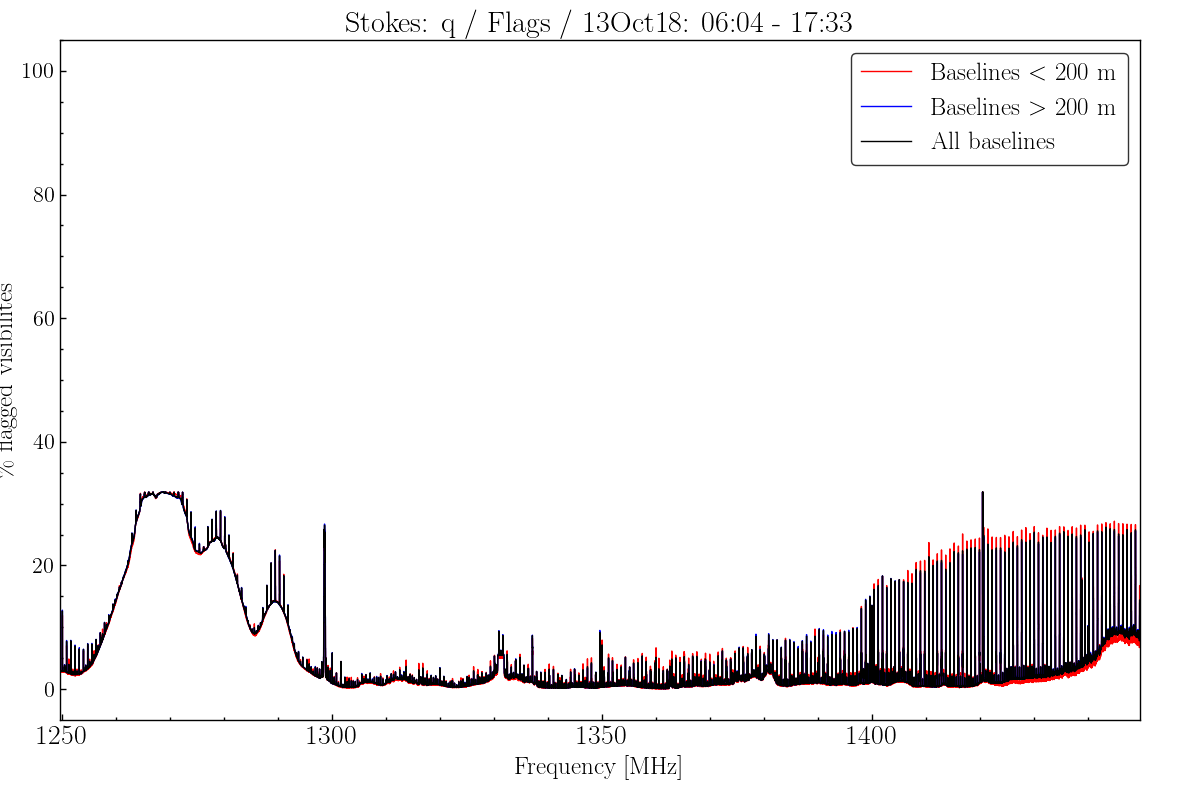

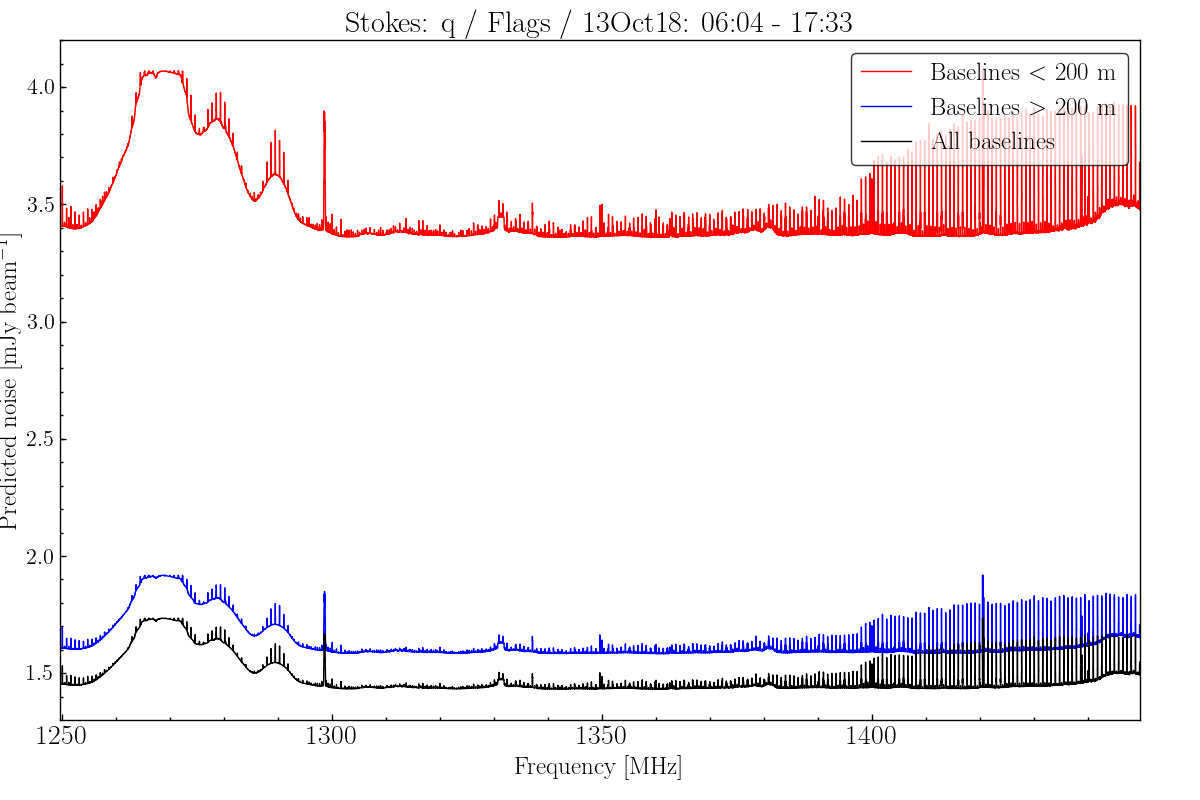

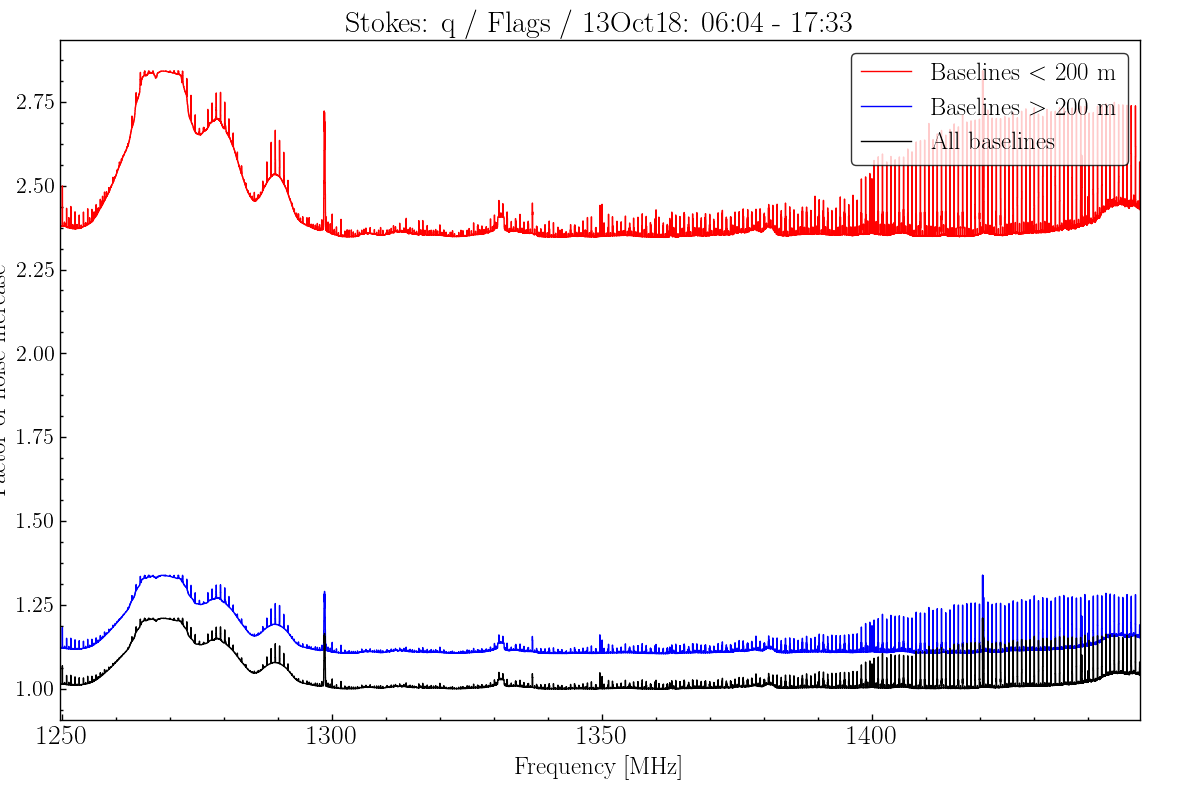

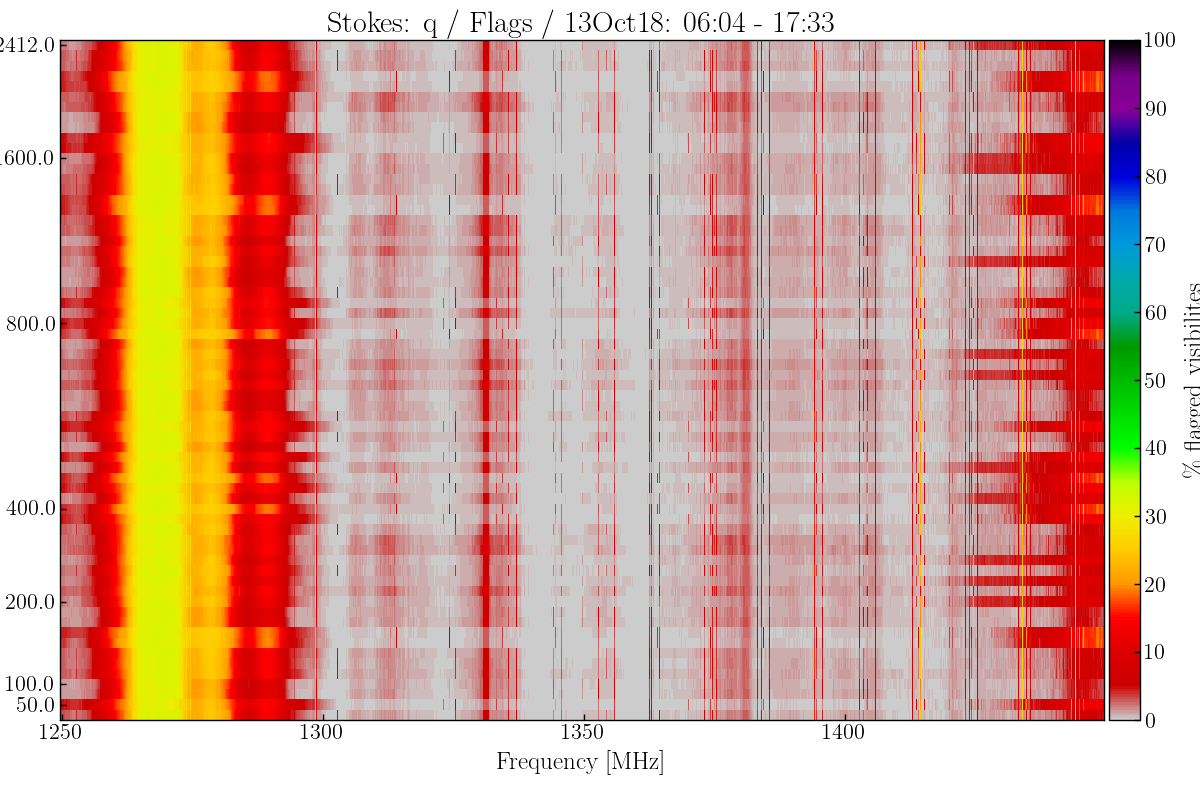

In [23]:
rfipltlist_png = glob.glob('/home/adams/rfirfi_q/plots' +'/'+'*flags.png') 
rfipltlist_png.append(glob.glob('/home/adams/rfirfi_q/plots' +'/'+'flags_base_full.png')[0])
#need to check this to see if it updates plots or not
#Looks like there are new plots, need to be careful about naming convention
#unfortunately not a single straightword way to do this
print rfipltlist_png


# load files as images
x=Image(rfipltlist_png[0])
y=Image(rfipltlist_png[1])
z=Image(rfipltlist_png[2])
w=Image(rfipltlist_png[3])
#v=Image(rfipltlist_png[4])

#then display all images
display(x,y,z,w)

#Can see flagging of ghosts and subband edges. Not sure what else to take from this
#Can see RFI below 1300

In [8]:
#inspected in rfigui briefly and looks good, so move on
convert = apercal.convert(cfgfile)
convert.show()

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


CONVERT
	convert_fluxcal = True
	convert_polcal = True
	convert_target = True
	convert_targetbeams = all
	convert_removeuvfits = True


In [ ]:
start=timer()
convert.go()
end=timer()

print 'Elapsed time to convert the data is {} minutes'.format((end - start)/60.) #time in minutes

CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : # Converted flux calibrator dataset from MS to UVFITS format! #
CONVERT - INFO : # Converted polarised calibrator dataset from MS to UVFITS format! #
CONVERT - INFO : # Converting target beam datasets from MS to UVFITS format. #
CONVERT - WARNING : # Could not convert dataset for target beam 01 from MS to UVFITS format! #


In [10]:
#Don't know why beam01 didn't convert.
#Check header information w/ code above again?
#Need to check log to see if any more beams didn't convert because I interrupted notebook
#Does look like everything else converted
print 'Elapsed time to convert the data is {} minutes'.format((end - start)/60.) #time in minutes
print 'Elapsed time to convert the data is {} hours'.format((end - start)/3600.) #time in hours

Elapsed time to convert the data is 835.962200665 minutes
Elapsed time to convert the data is 13.9327033444 hours


In [15]:
"""Now make plots of amplitude vs time, uvdist, frequency
Will start with beam 00 (all sources) and then pick a few random beams for spot checking
This should probably be changed to create plots for everything,
and create an html page that can be visited for inspection."""

#first define quick functions for getting different plots
#want to be able to rerun for different sources, beams easily

def get_timeamp(mirfile,mirdevice='amptime.gif/gif'):
    uvplt = lib.miriad('uvplt')
    uvplt.vis = mirfile
    uvplt.axis='time,amplitude'
    uvplt.line = 'chan,16384,1'
    uvplt.device = mirdevice
    uvplt.nxy='4,4'
    uvplt.log='/home/adams/shakedown/logs/amp_time_output.txt'
    uvplt.go()
    
def get_uvdistamp(mirfile,mirdevice='ampuvdist.gif/gif'):
    uvplt = lib.miriad('uvplt')
    uvplt.vis = mirfile
    uvplt.axis ='uvdistance,amplitude'
    uvplt.line = 'chan,16384,1' #average all chans together, assumes 200 MHz
    uvplt.device=mirdevice
    uvplt.nxy='4,4'
    uvplt.log = '/home/adams/shakedown/logs/amp_uvdist_output.txt' #just to minimize output to screen
    uvplt.go()

def get_freqamp(mirfile,mirdevice='ampfreq.gif/gif'):
    uvplt = lib.miriad('uvplt')
    uvplt.vis = mirfile
    uvplt.axis ='freq,amplitude'
    uvplt.average = '1000' #average all times together
    uvplt.device=mirdevice
    uvplt.nxy='4,4'
    uvplt.log = '/home/adams/shakedown/logs/amp_freq_output.txt' #just to minimize output to screen
    uvplt.go()





In [16]:
#read cfg file, means can restart notebook w/ this cell
convert = apercal.convert(cfgfile)

#make sure in working directory
#start w/ beam 00, then do other beams separately
subs.managefiles.director(convert,'ch',convert.crosscaldir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = convert.target[:-3] +'.mir'

mirflux = convert.fluxcal[:-3] +'.mir'

mirpol = convert.polcal[:-3] +'.mir'

get_timeamp(mirtarget,mirdevice='amptime_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_target.gif/gif')
get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')

get_timeamp(mirflux,mirdevice='amptime_flux.gif/gif')
get_uvdistamp(mirflux,mirdevice='ampuvdist_flux.gif/gif')
get_freqamp(mirflux,mirdevice='ampfreq_flux.gif/gif')

get_timeamp(mirpol,mirdevice='amptime_pol.gif/gif')
get_uvdistamp(mirpol,mirdevice='ampuvdist_pol.gif/gif')
get_freqamp(mirpol,mirdevice='ampfreq_pol.gif/gif')

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


/data/adams/apertif/shakedown_S1342+5324/00/crosscal


In [17]:
#and display plots for all three sources
#First have to find all files and rename with *.png
#They are single image files and then I can dispaly them

#find files with glob
pltlist_gif = glob.glob('*.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

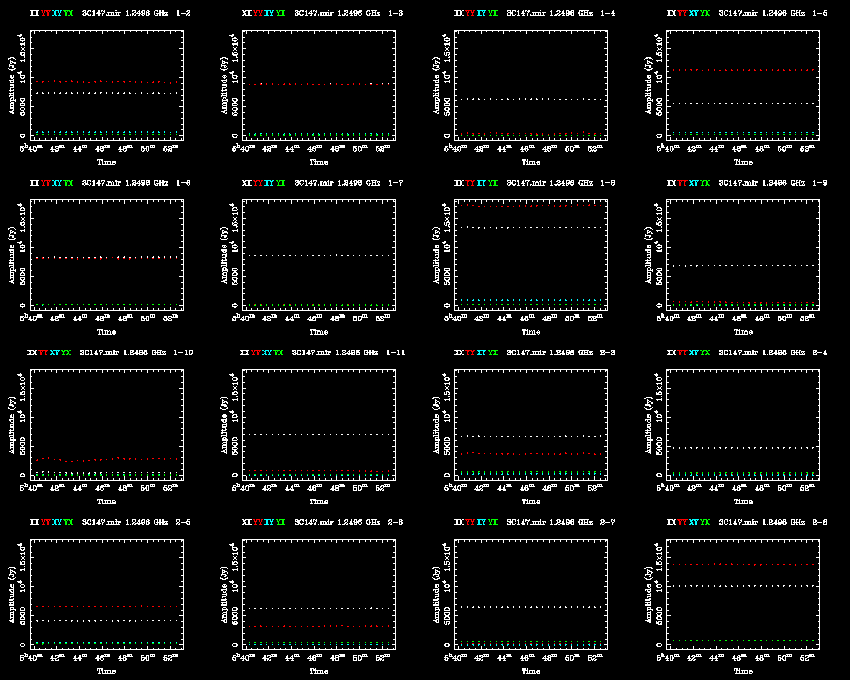

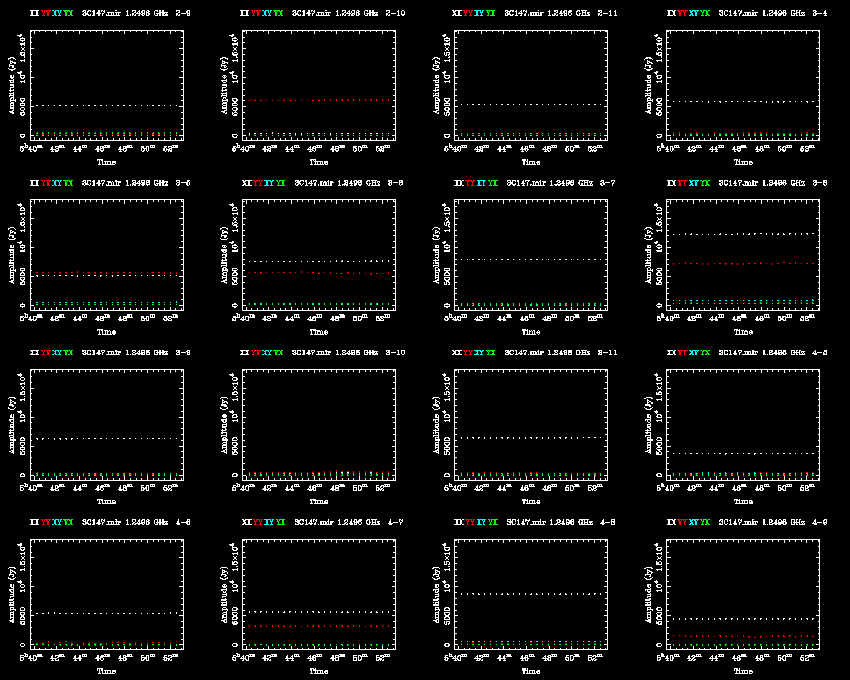

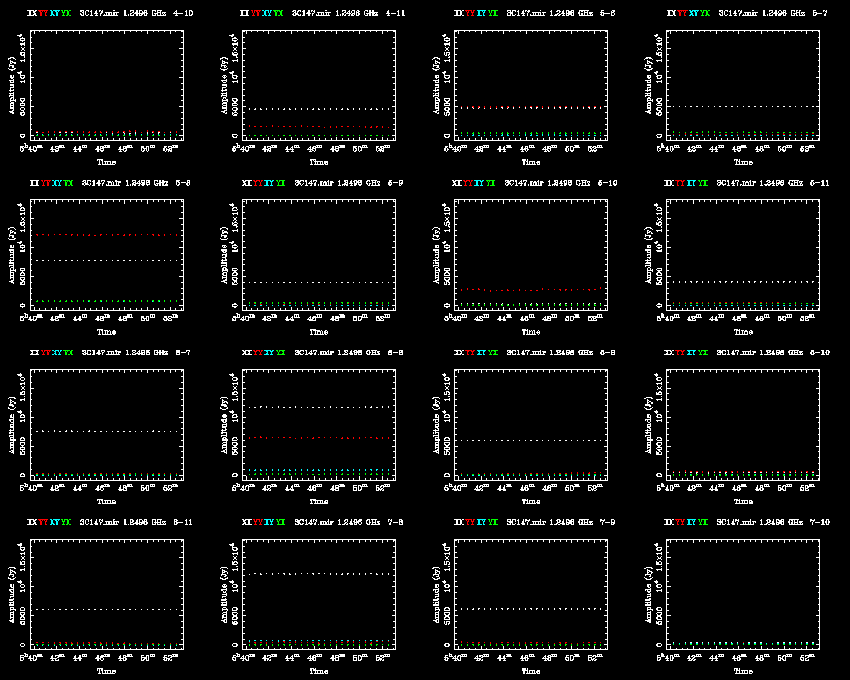

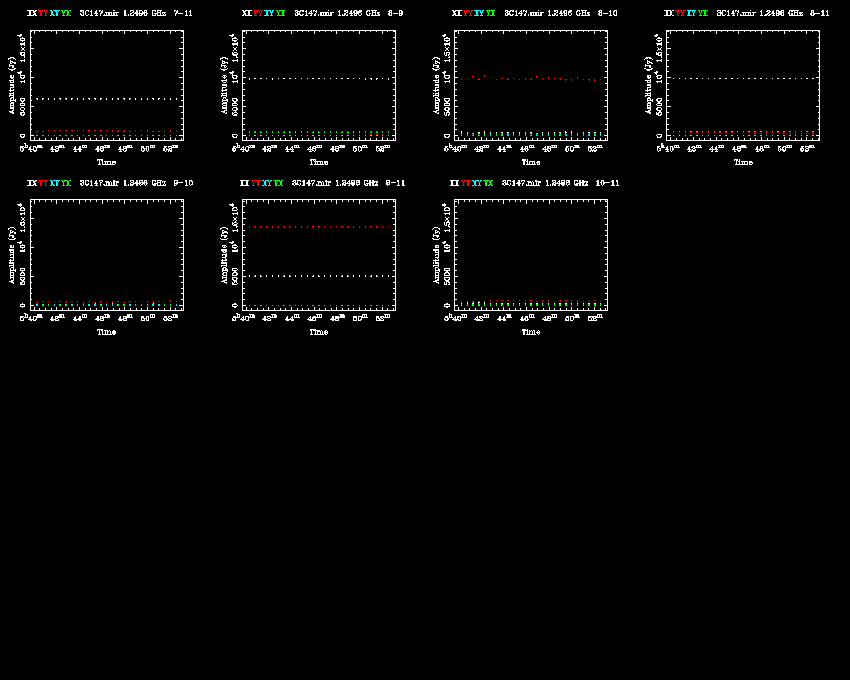

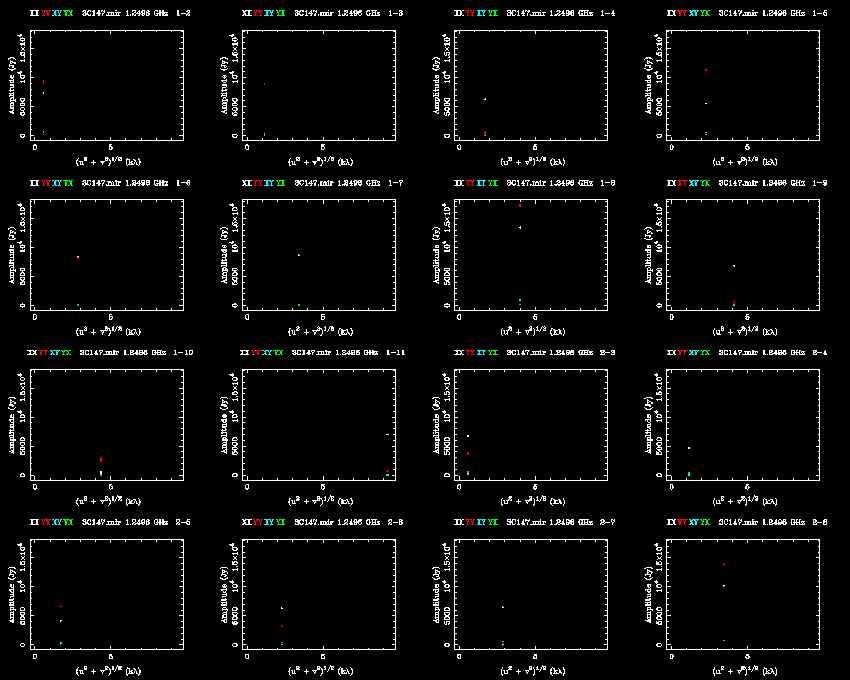

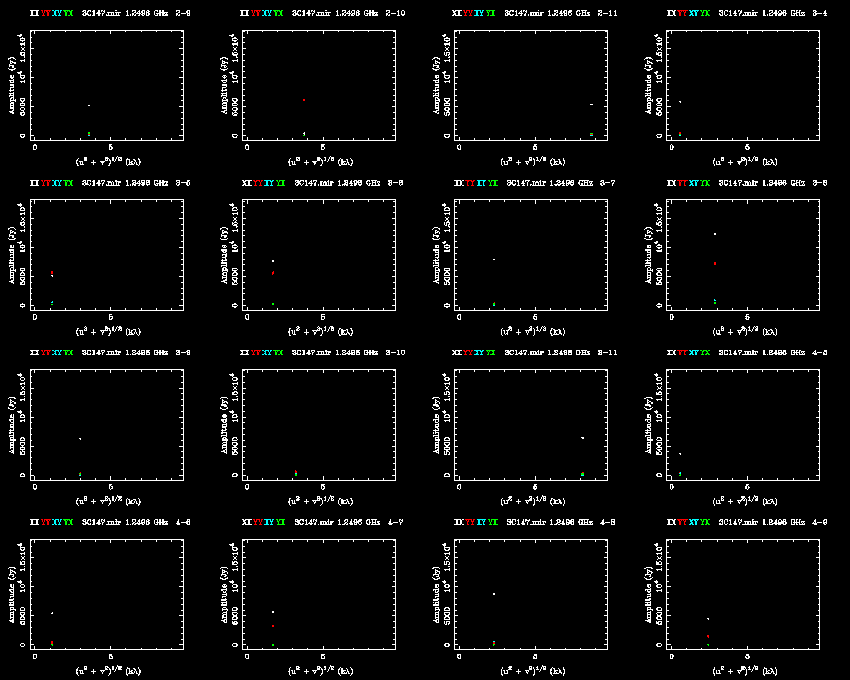

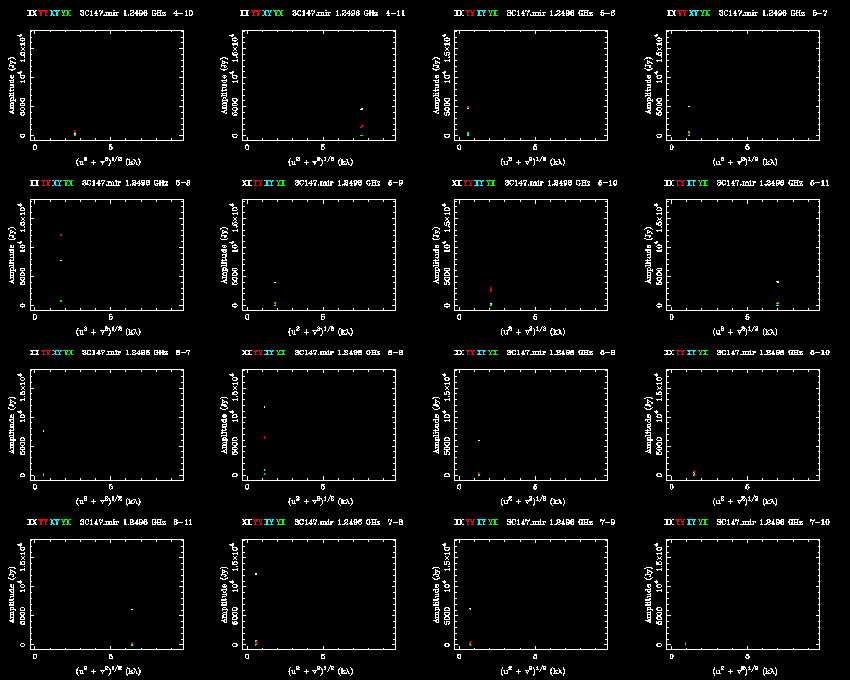

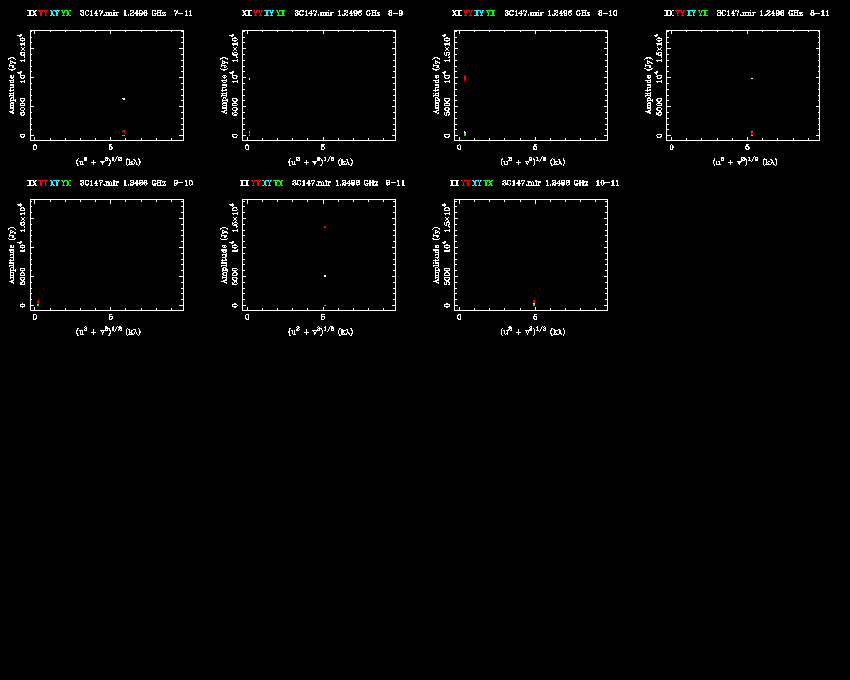

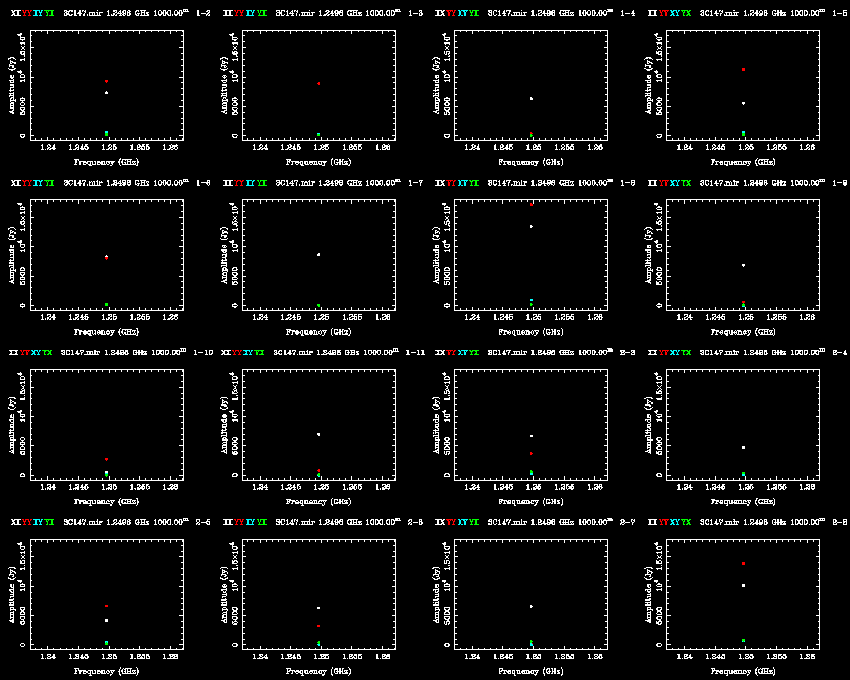

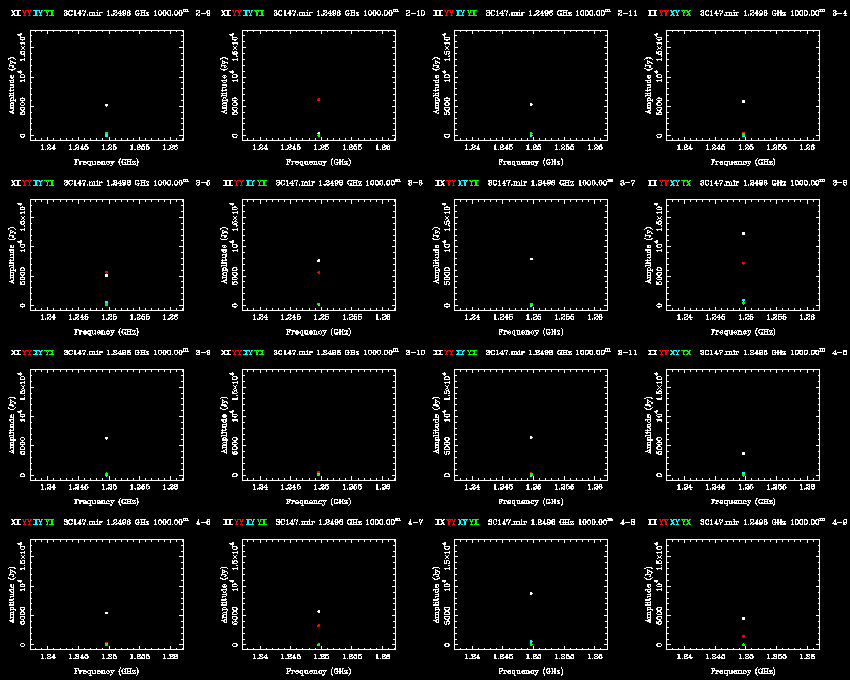

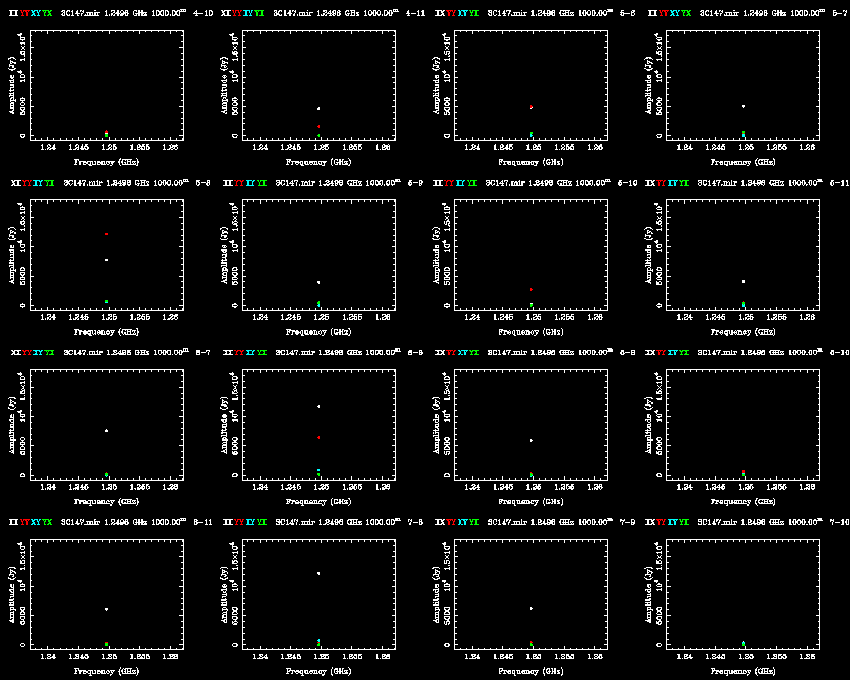

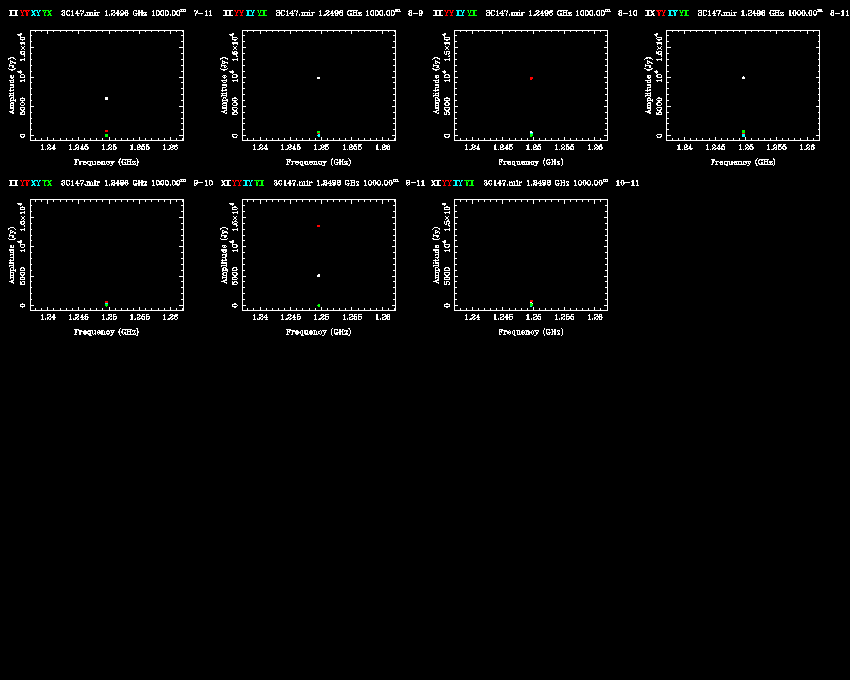

In [18]:
"""Display all plots for flux cal"""

pltlist_target = glob.glob(convert.crosscaldir+'/'+'*flux.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

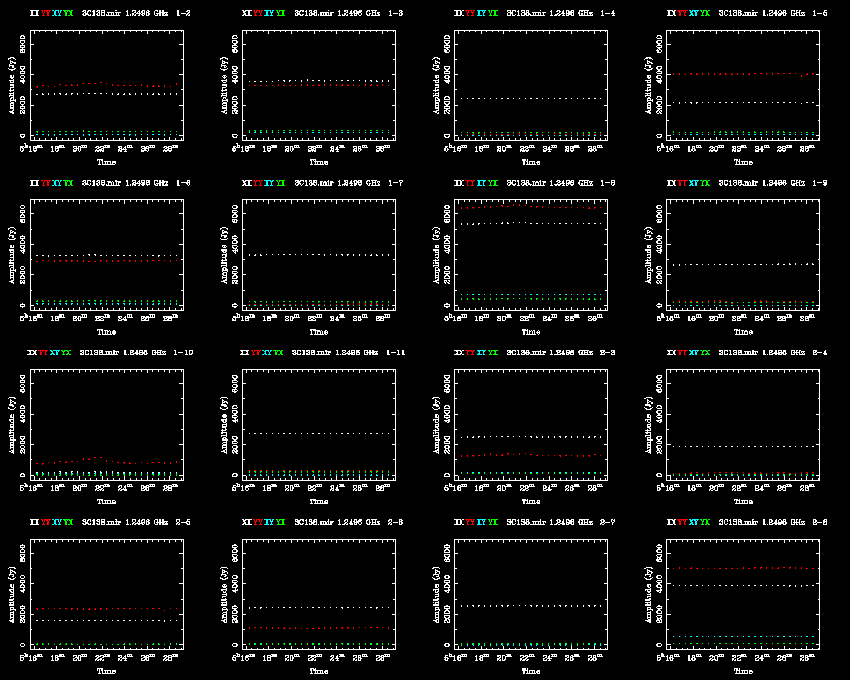

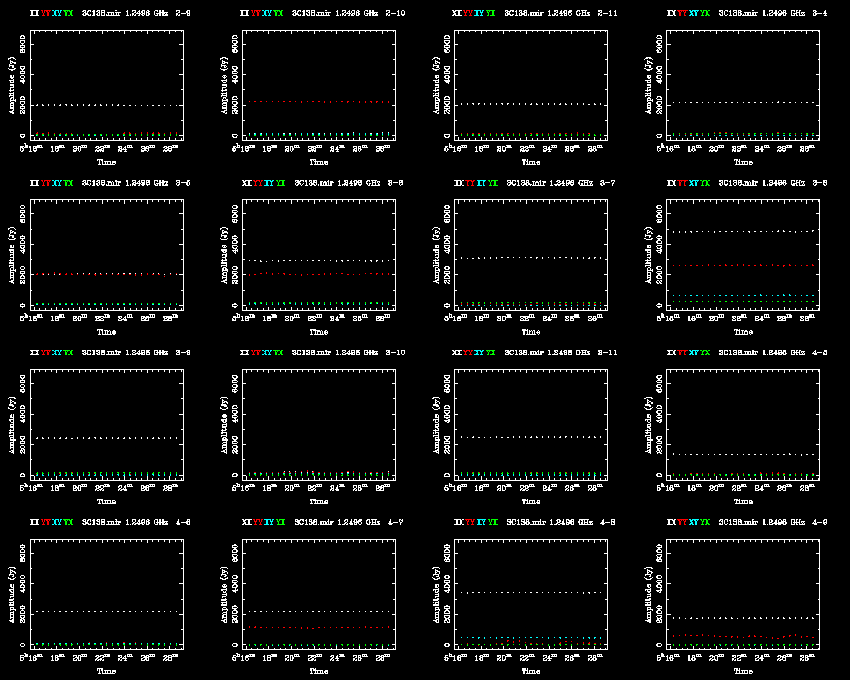

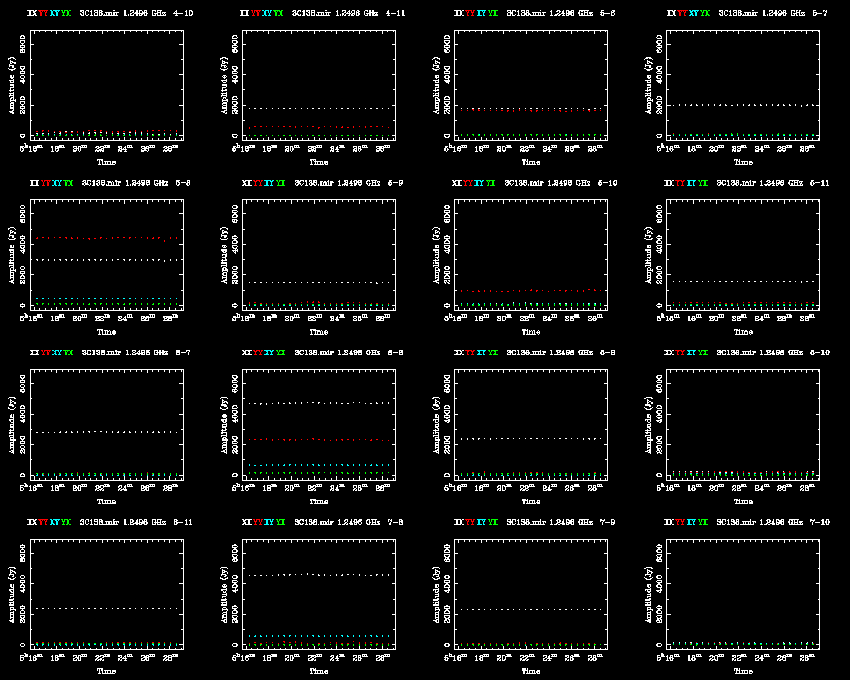

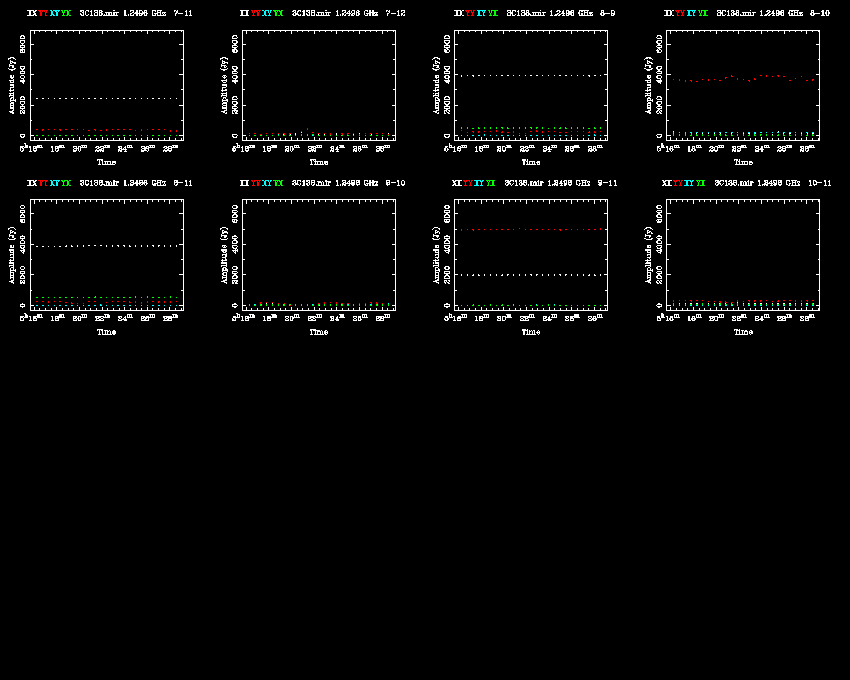

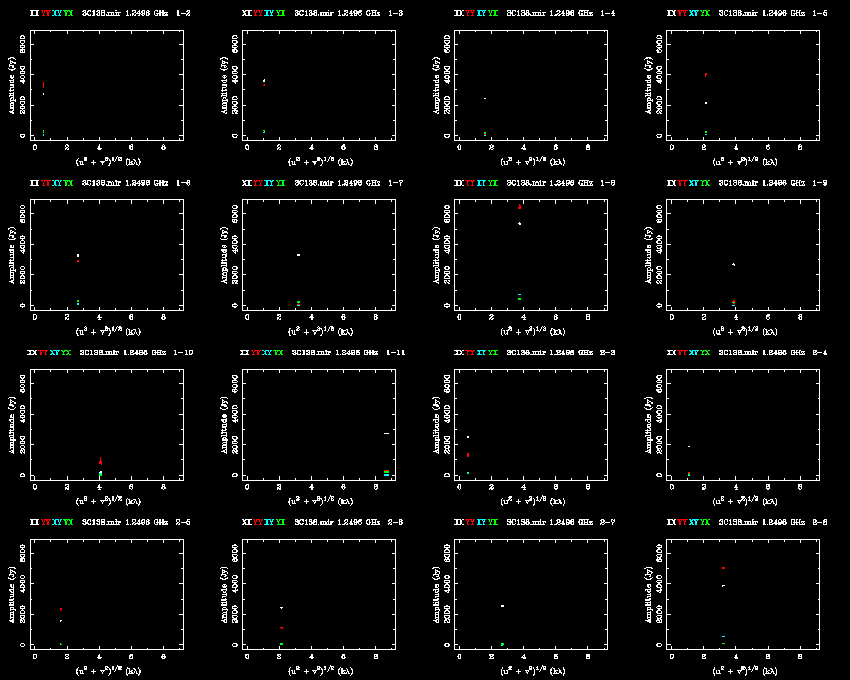

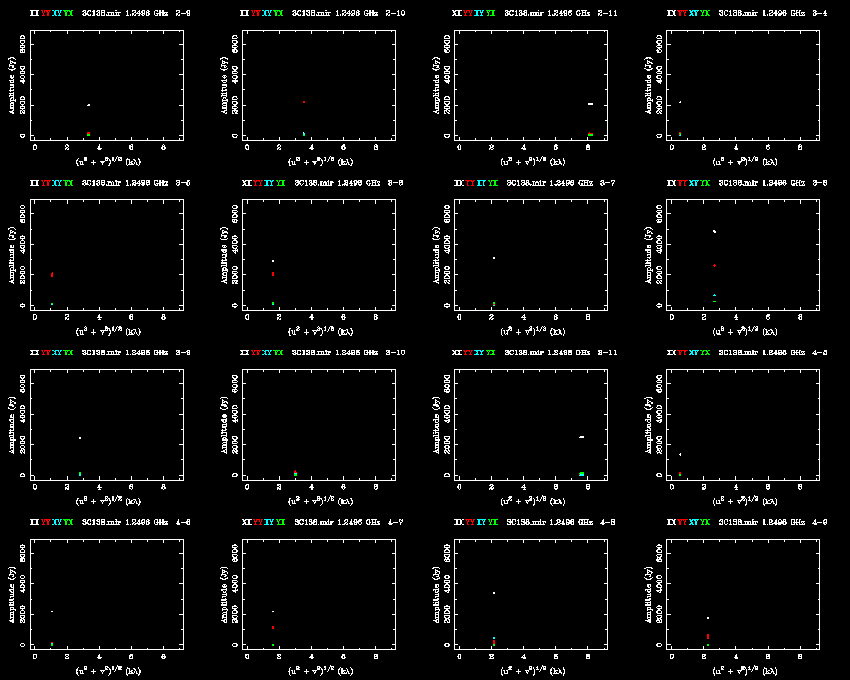

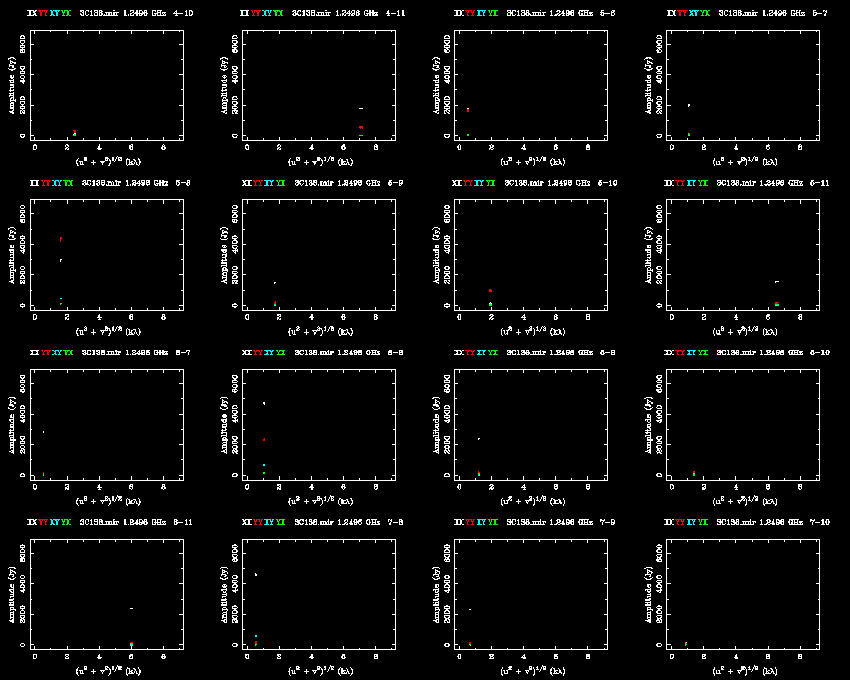

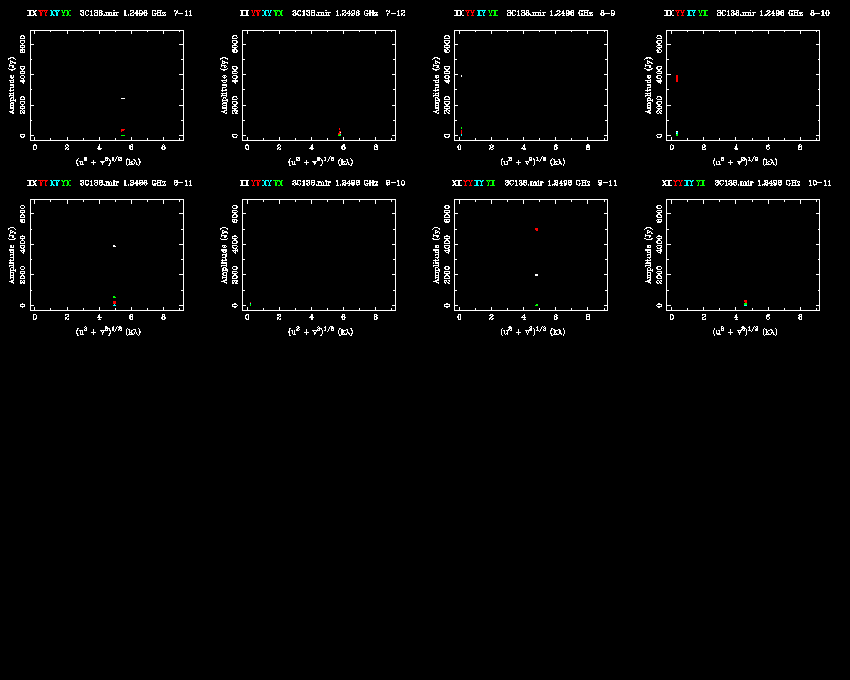

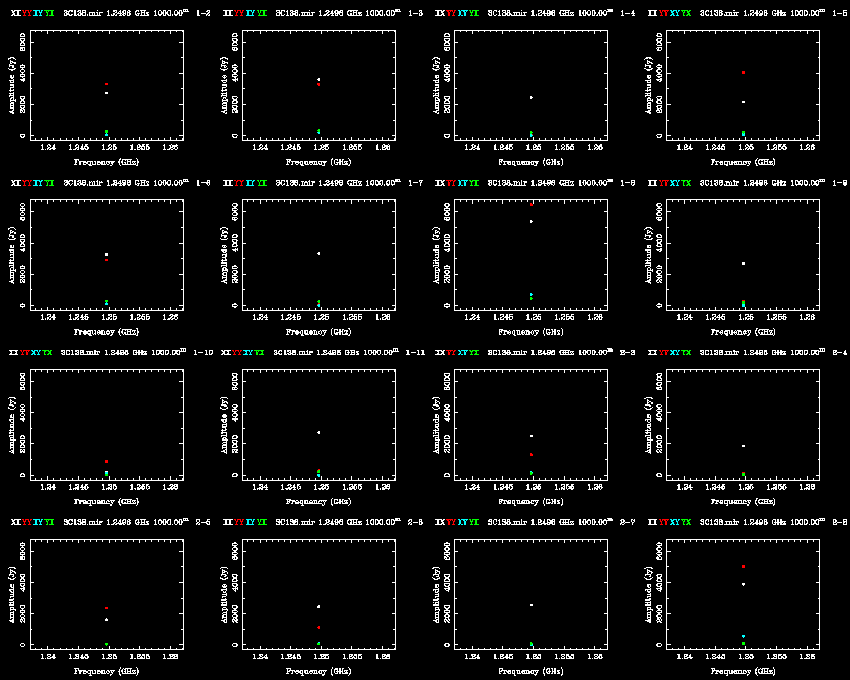

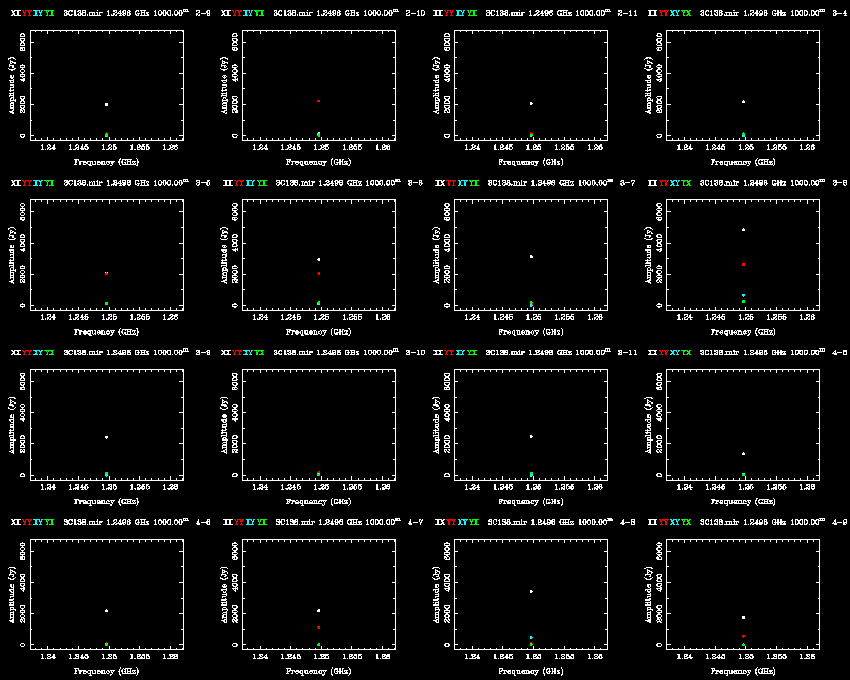

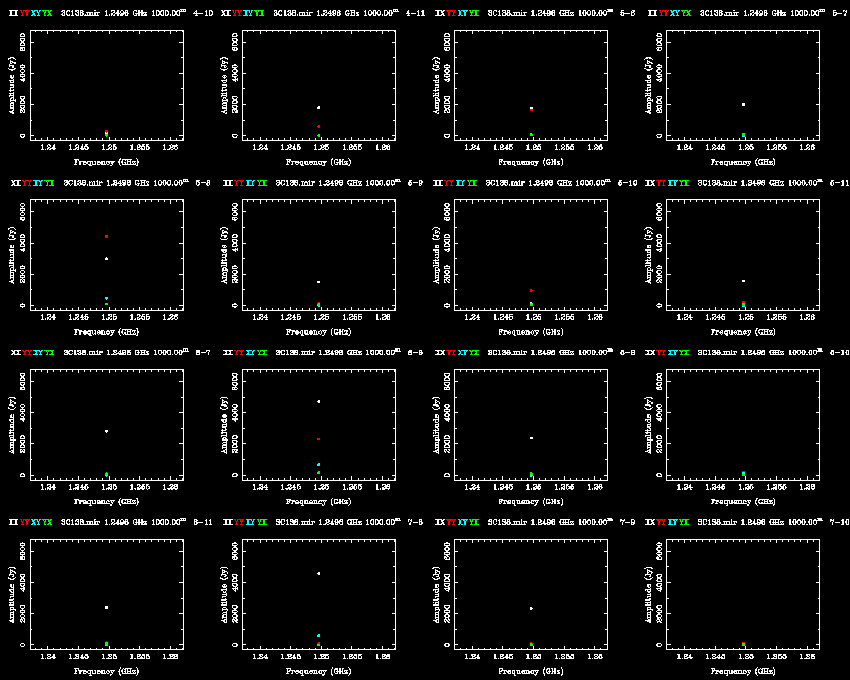

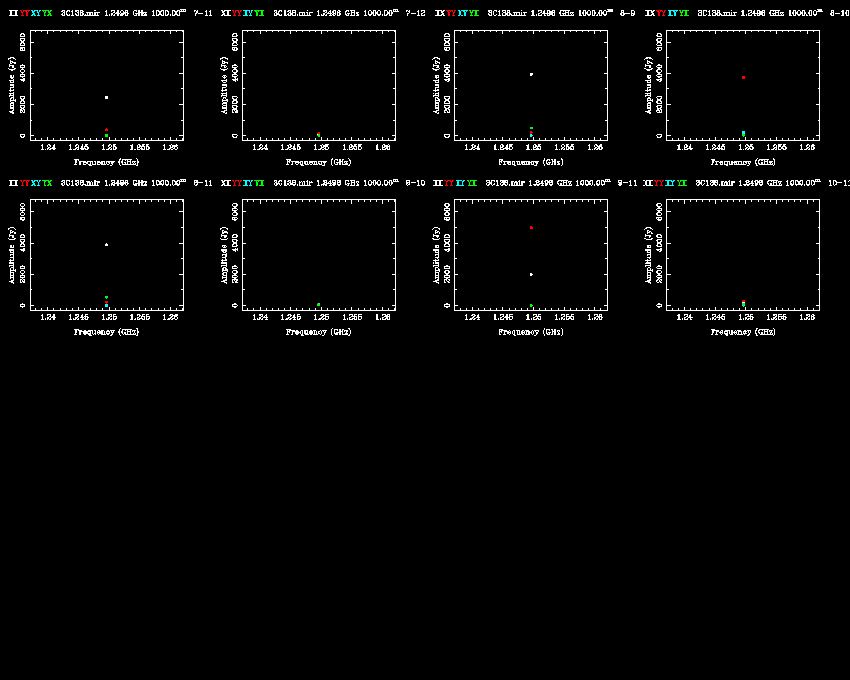

In [19]:
"""Display all plots for pol cal"""

pltlist_target = glob.glob(convert.crosscaldir+'/'+'*pol.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

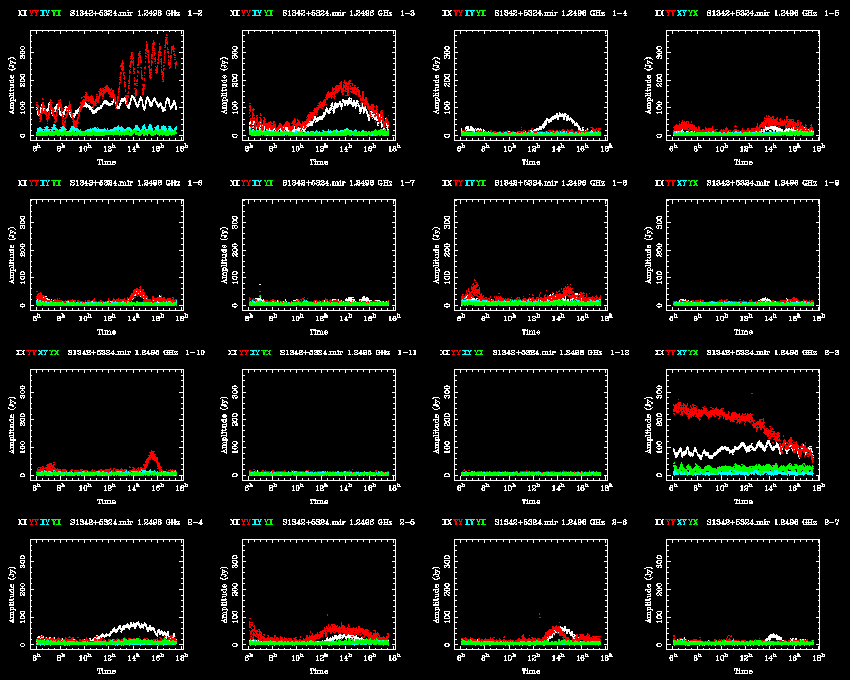

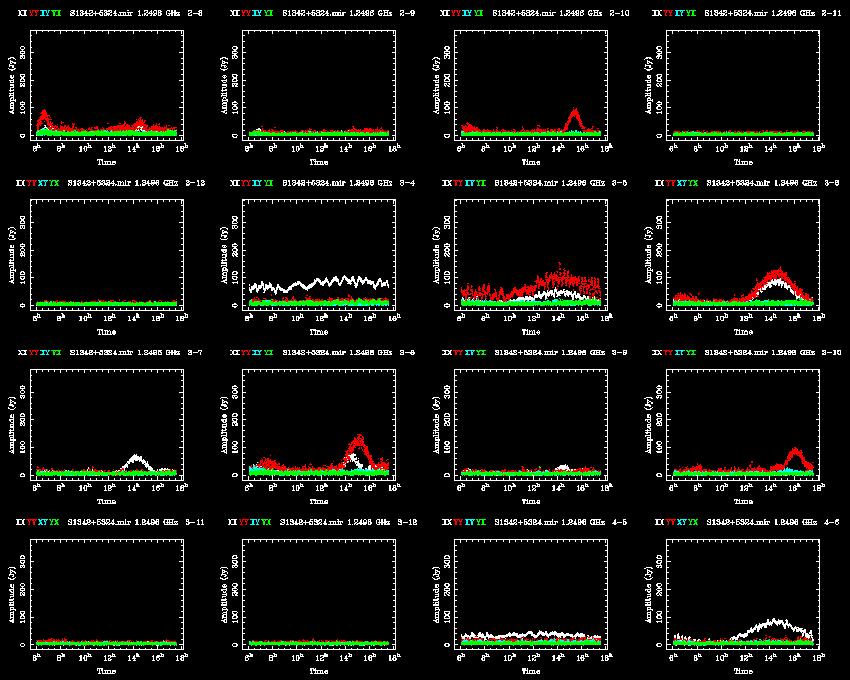

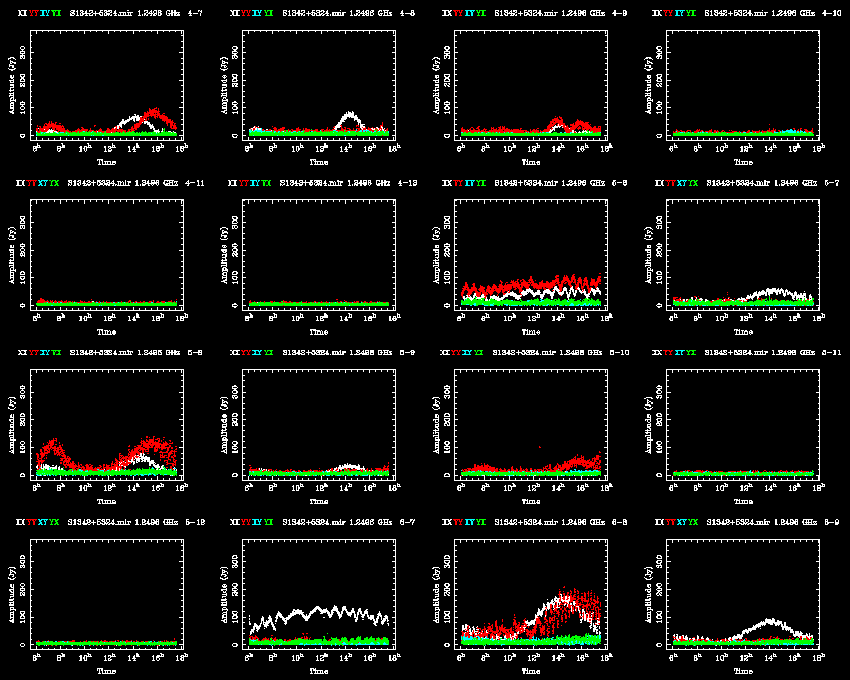

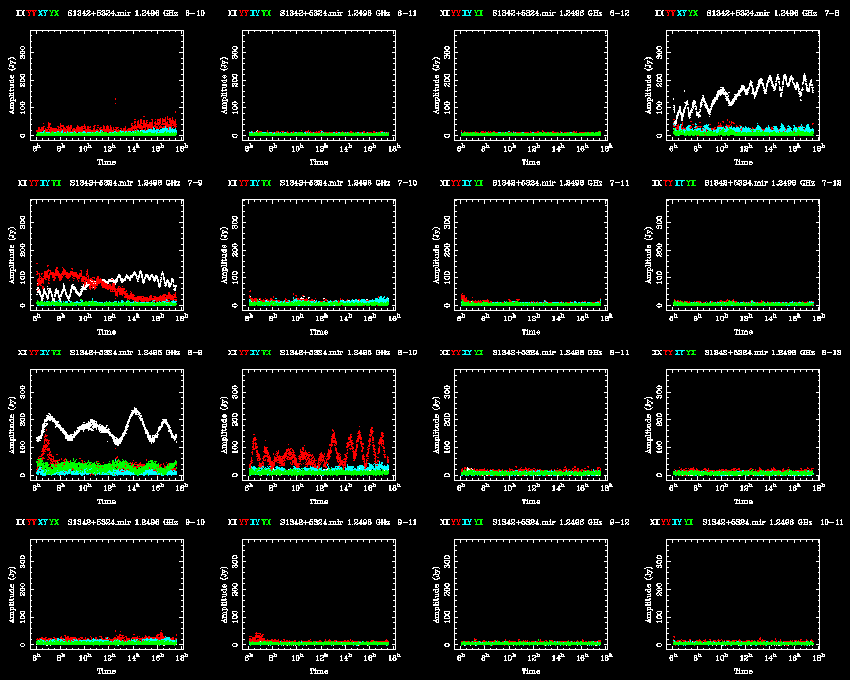

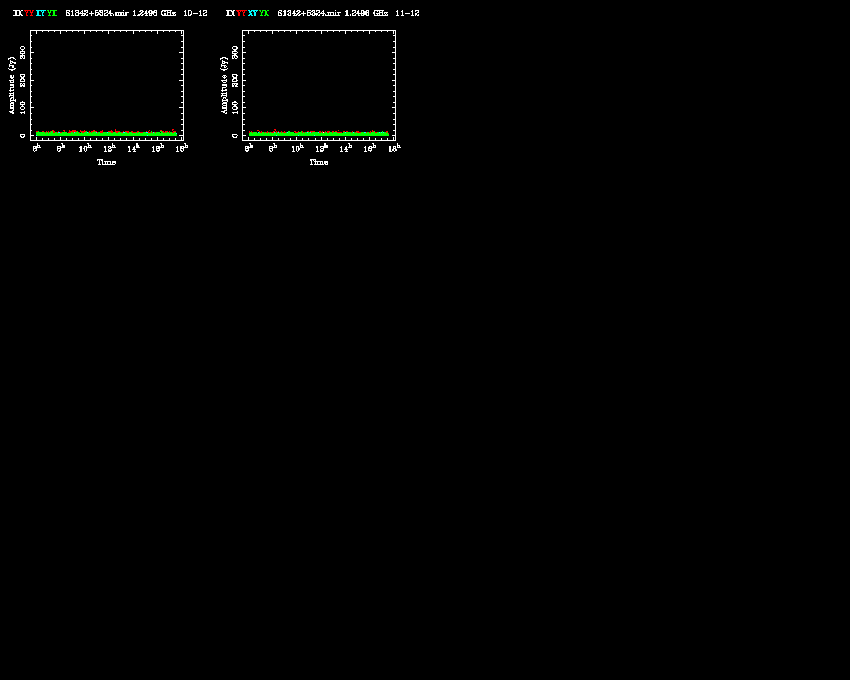

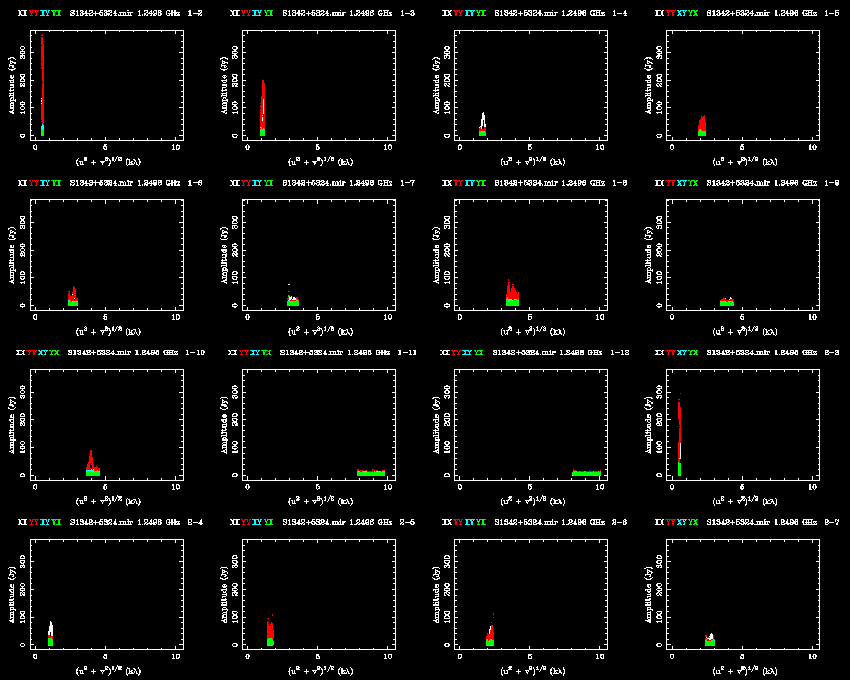

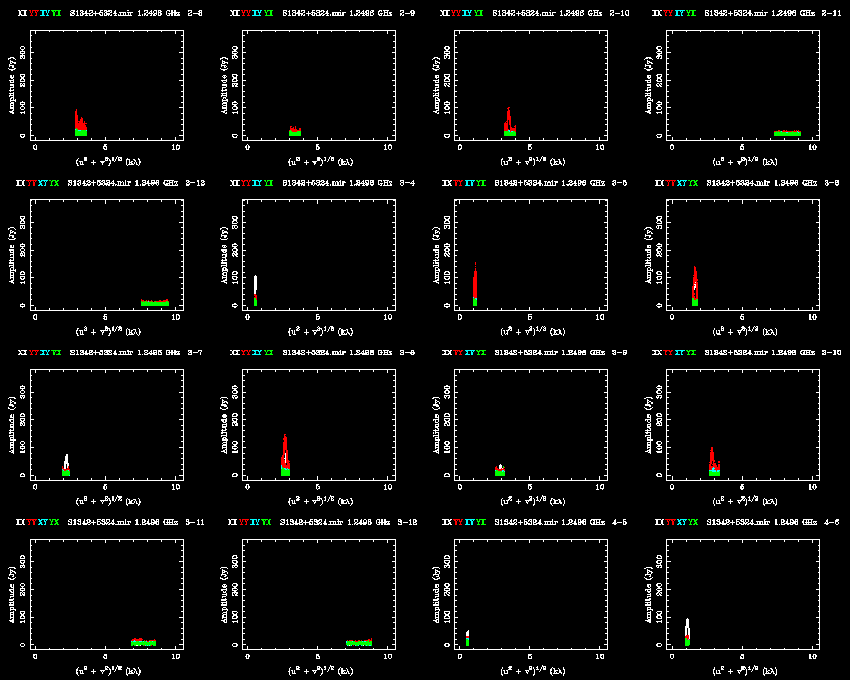

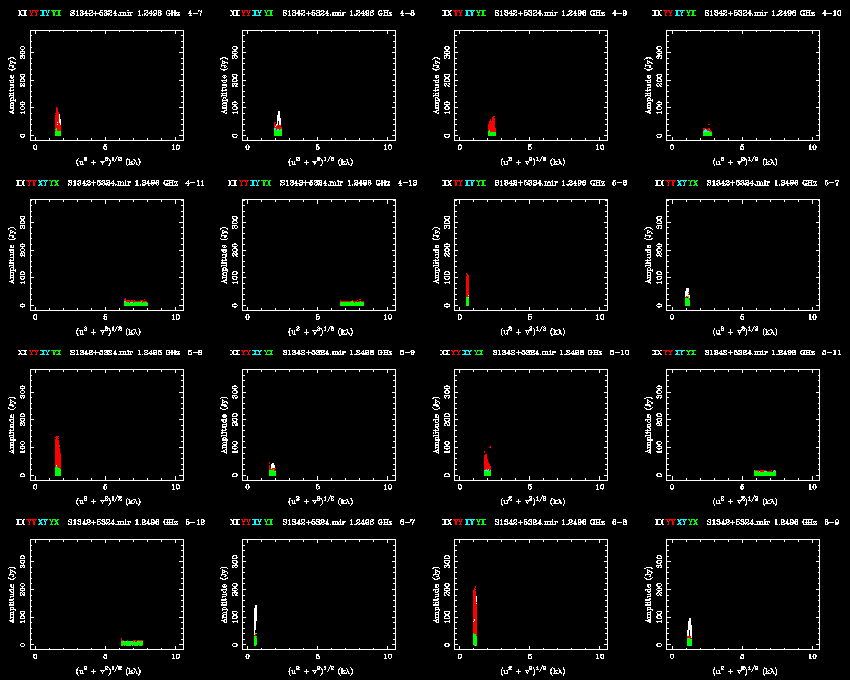

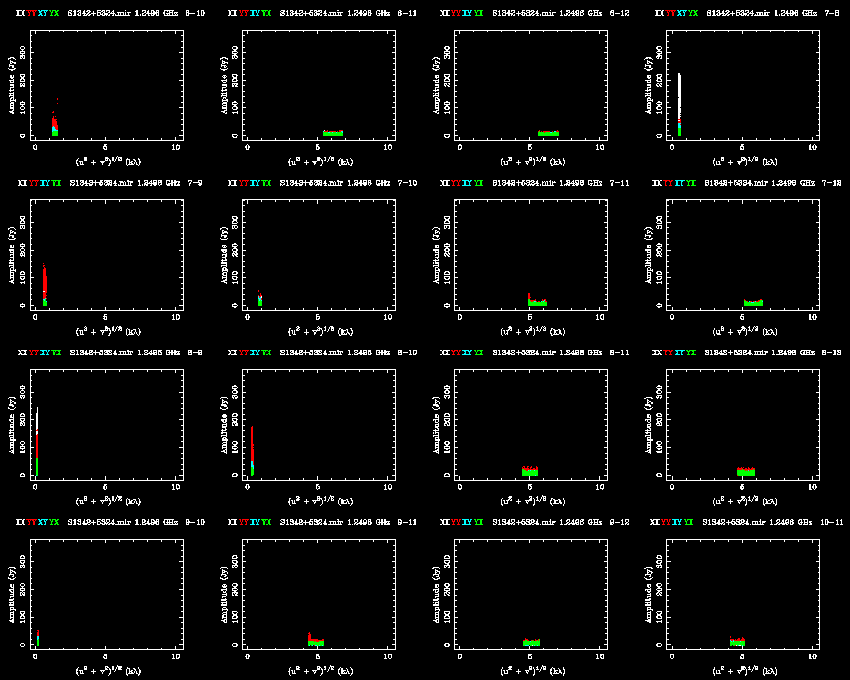

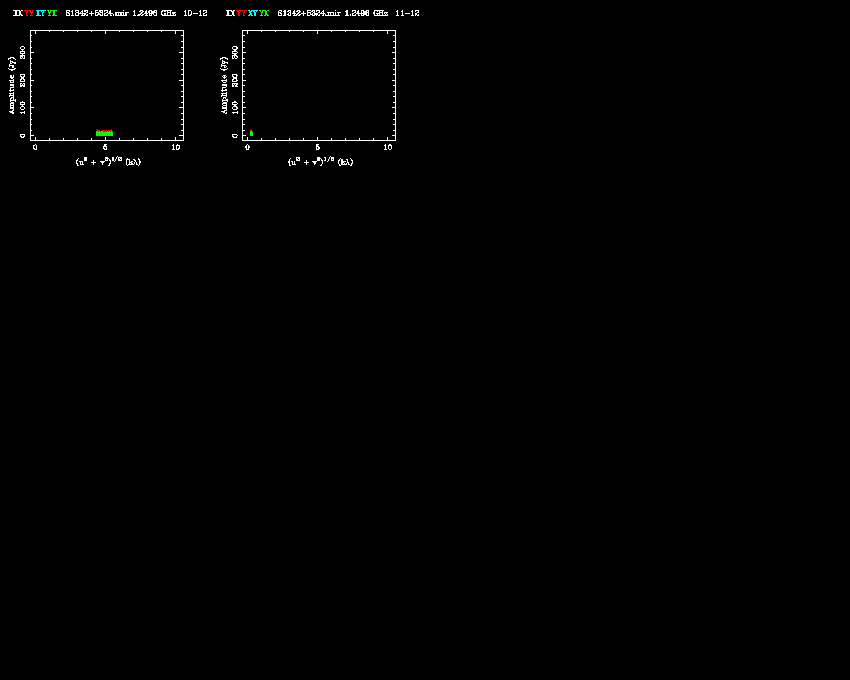

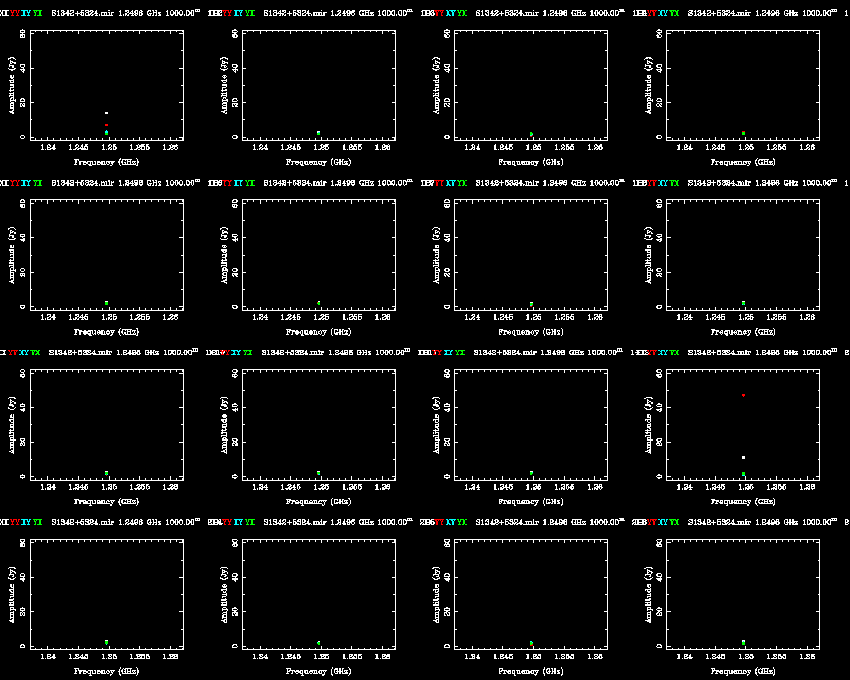

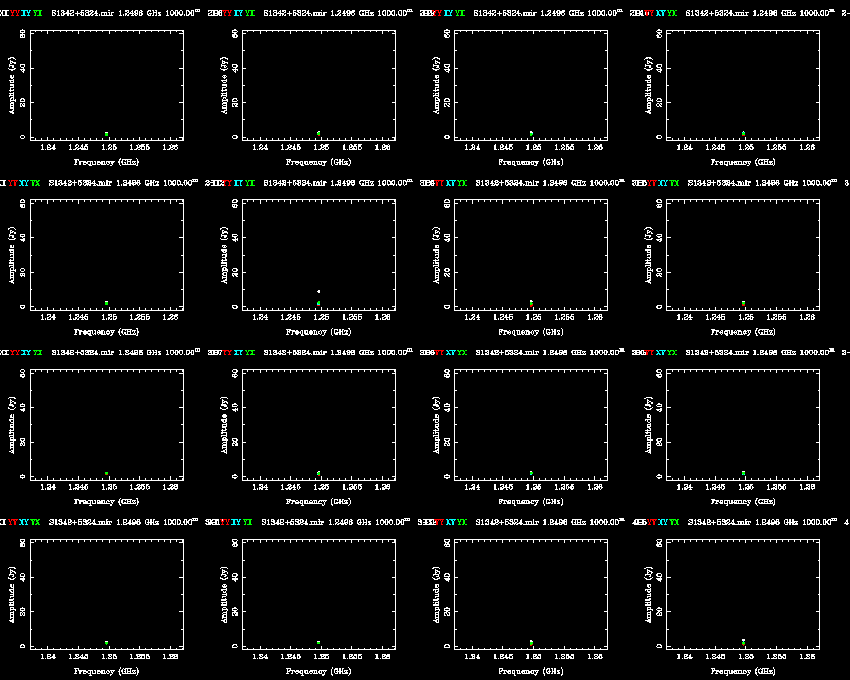

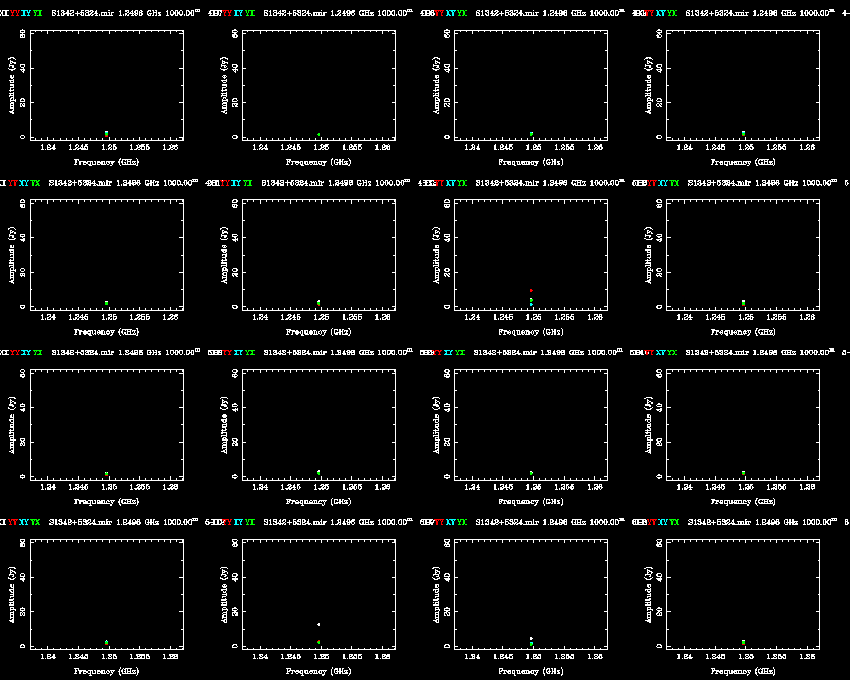

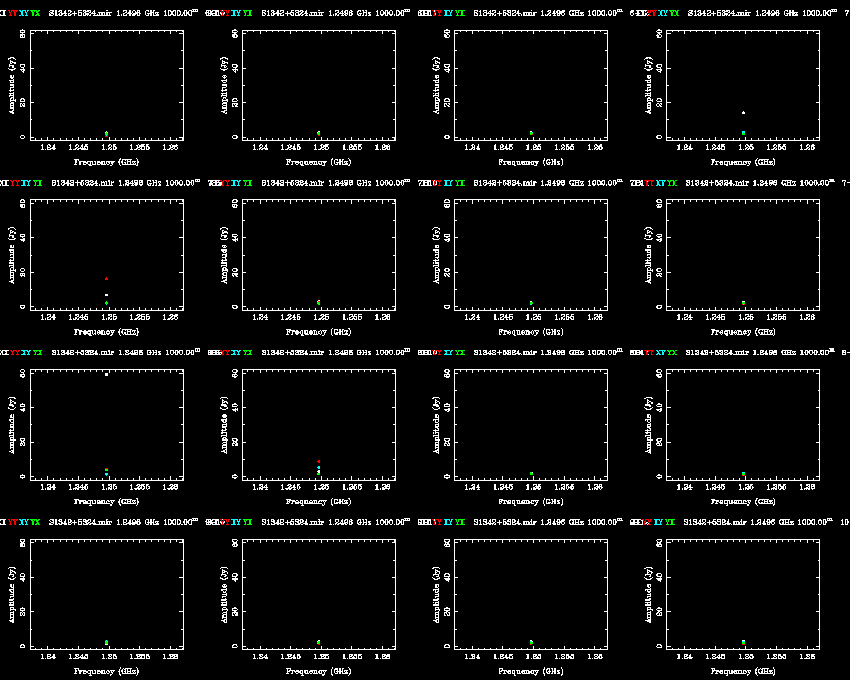

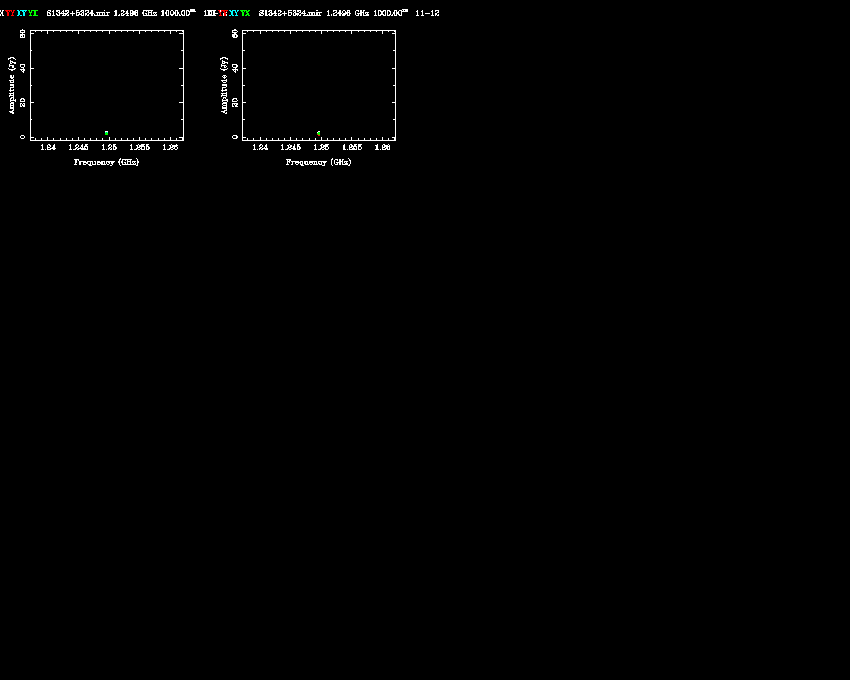

In [20]:
"""Display all plots for target"""

pltlist_target = glob.glob(convert.crosscaldir+'/'+'*target.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

The amp frequency plots aren't working, which I don't understand. But I will move on for now. I think it may actually be that uvspec was working before, despite the buffer error message. And that may explain why in my test notebook I only had plots for some baselines. This will go in the needs-to-be-looked at list.

In [36]:
#Now pick a few random beams to also produce plots for them
#Look at inspection plots to select beams that I think might be most problematic:
#11,20,22 plus 15 as mostly good (one hot atnenna?)
convert = apercal.convert(cfgfile)

#make sure in working directory
beamdir = convert.basedir + '11/crosscal/'
#start w/ beam 00, then do other beams separately
subs.managefiles.director(convert,'ch',beamdir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = convert.target[:-3] +'.mir'

start=timer()
get_timeamp(mirtarget,mirdevice='amptime_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_target.gif/gif')
get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')
end=timer()

print 'It took {0} minutes to get the visibilty amplitude plots for a target beam'.format((end-start)/60.)

#find files with glob
pltlist_gif = glob.glob('*.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


/data/adams/apertif/shakedown_S1342+5324/11/crosscal
It took 9.07203334967 minutes to get the visibilty amplitude plots for a target beam


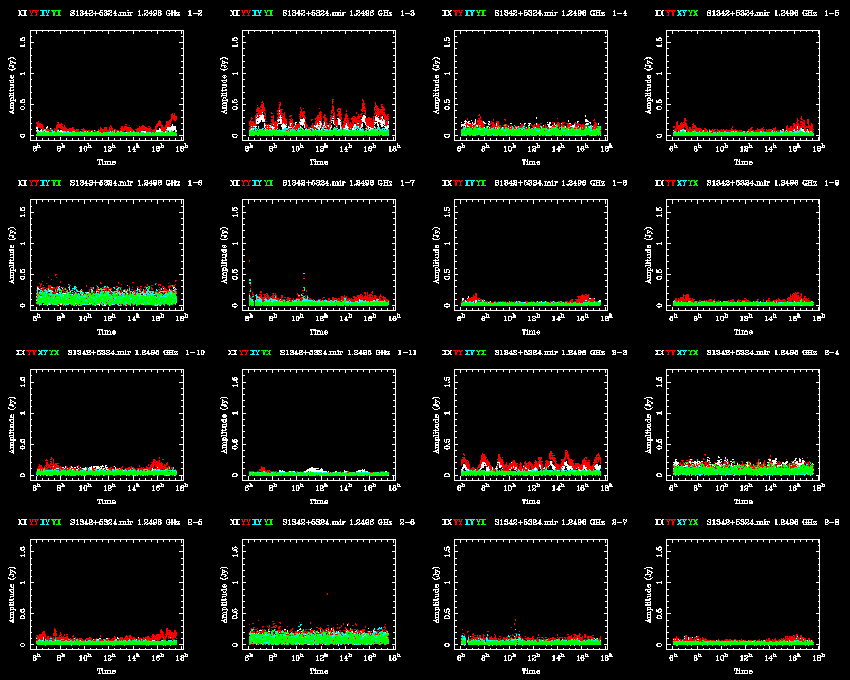

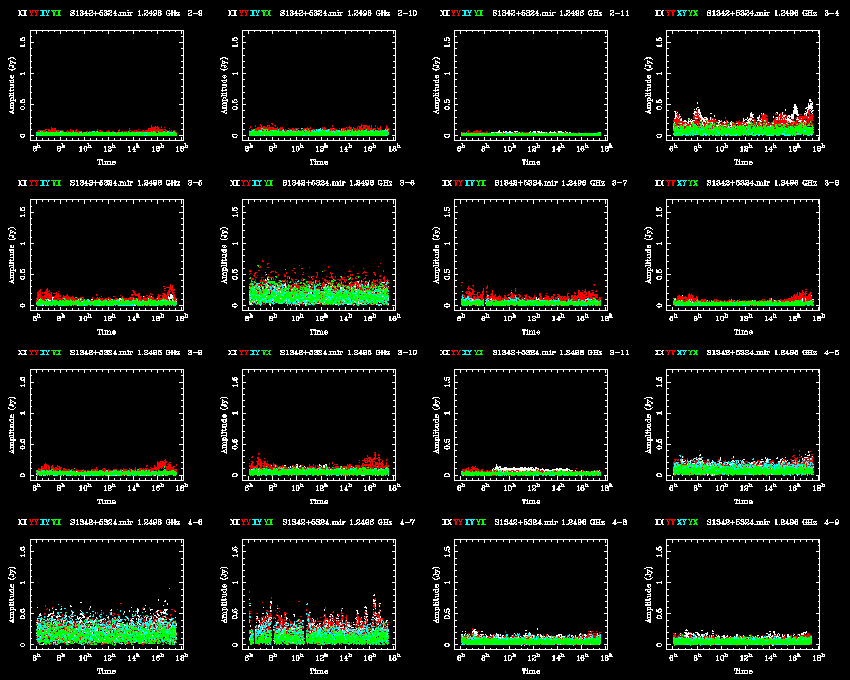

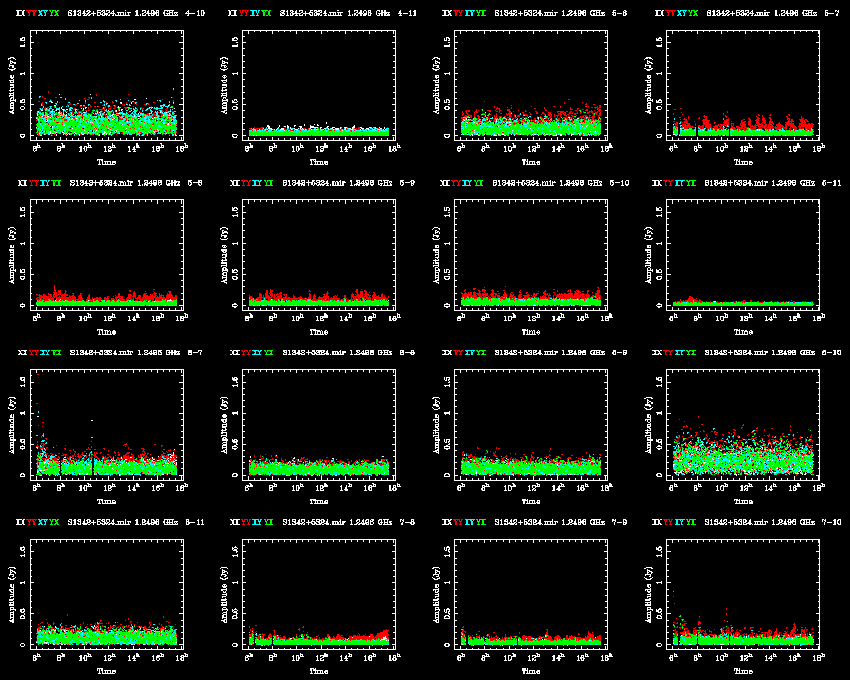

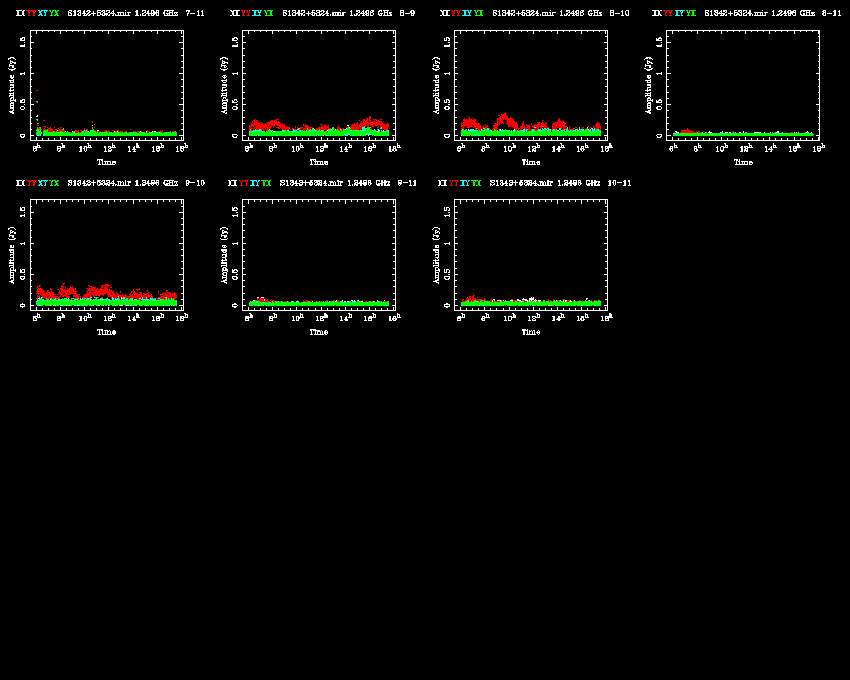

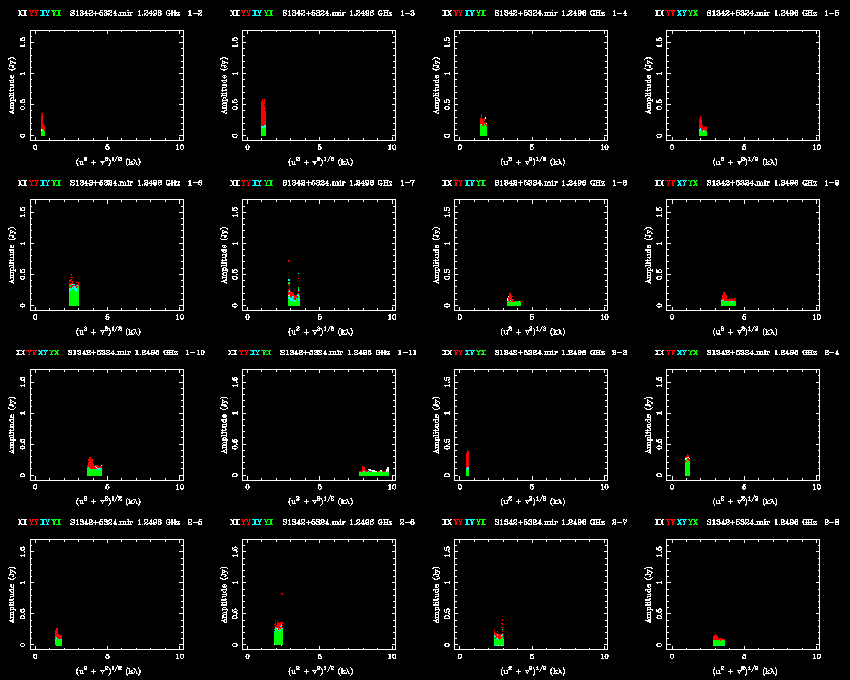

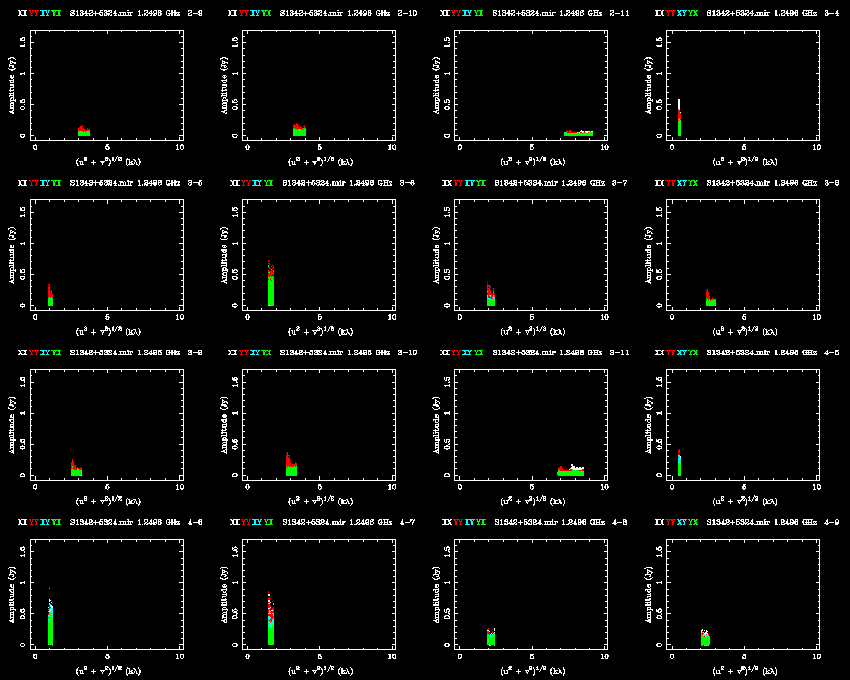

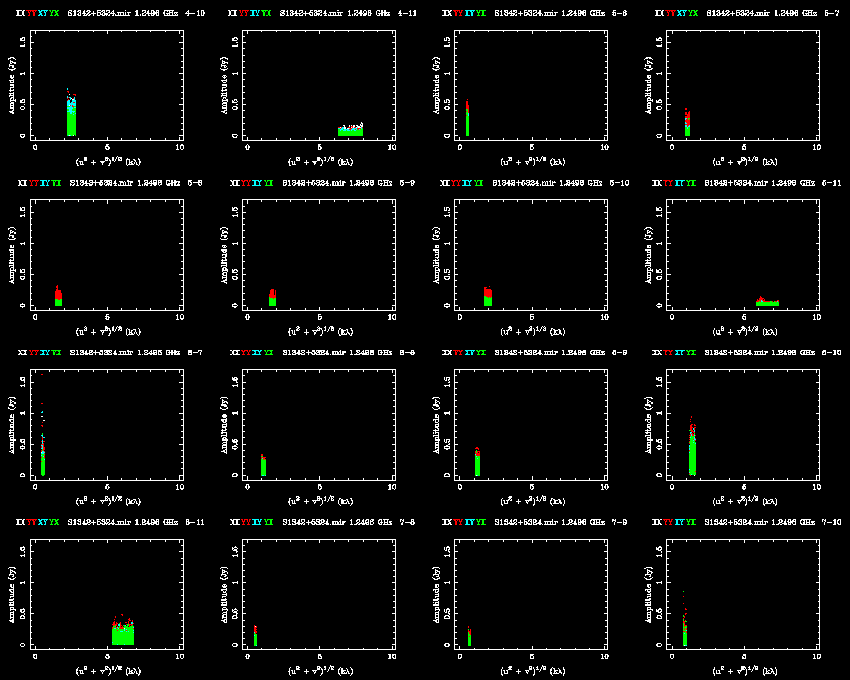

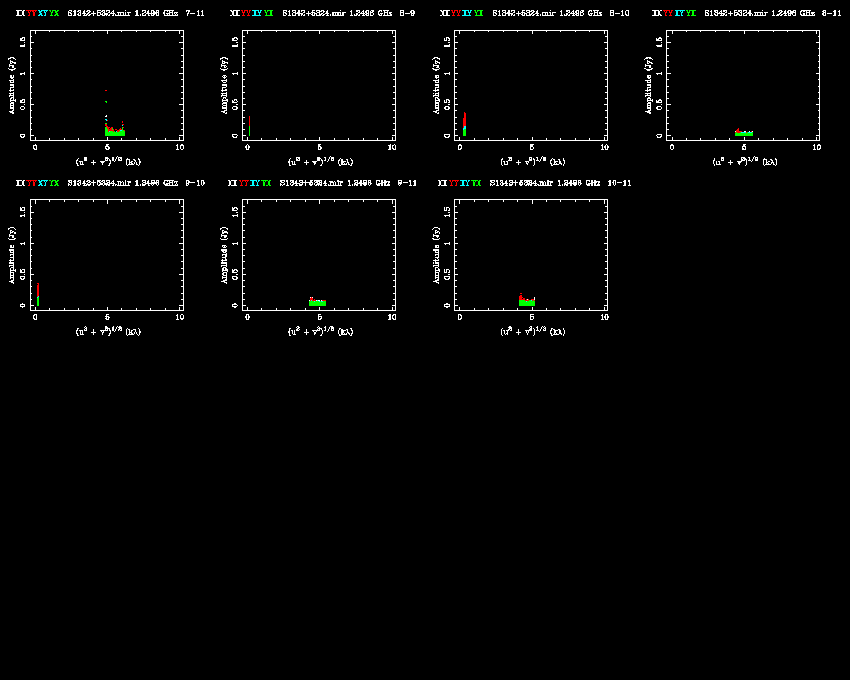

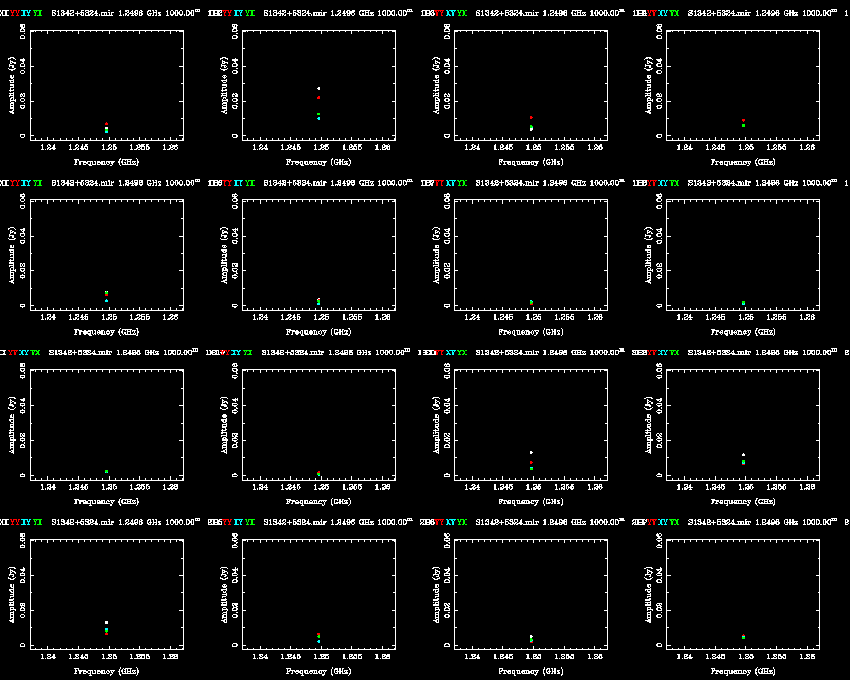

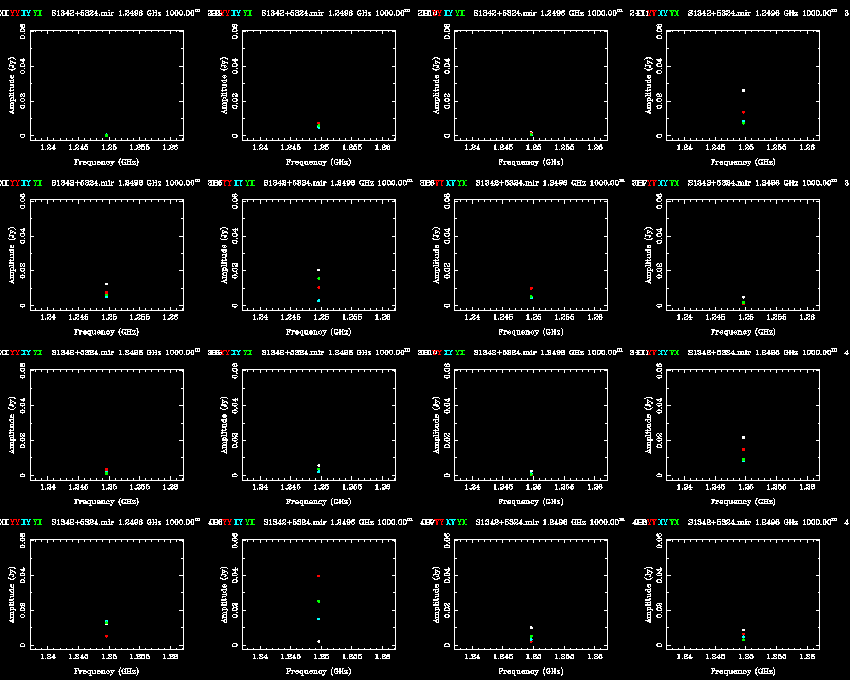

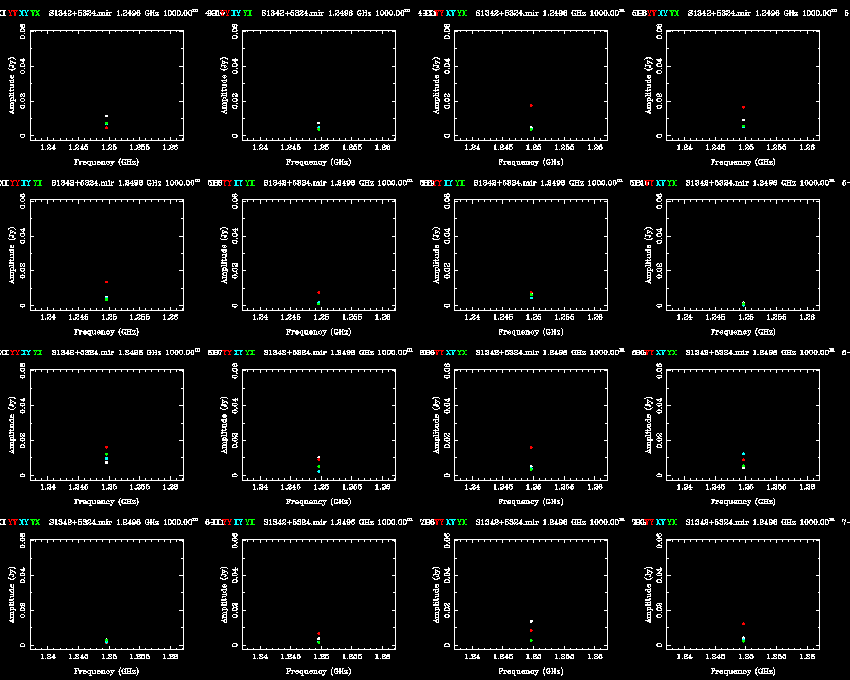

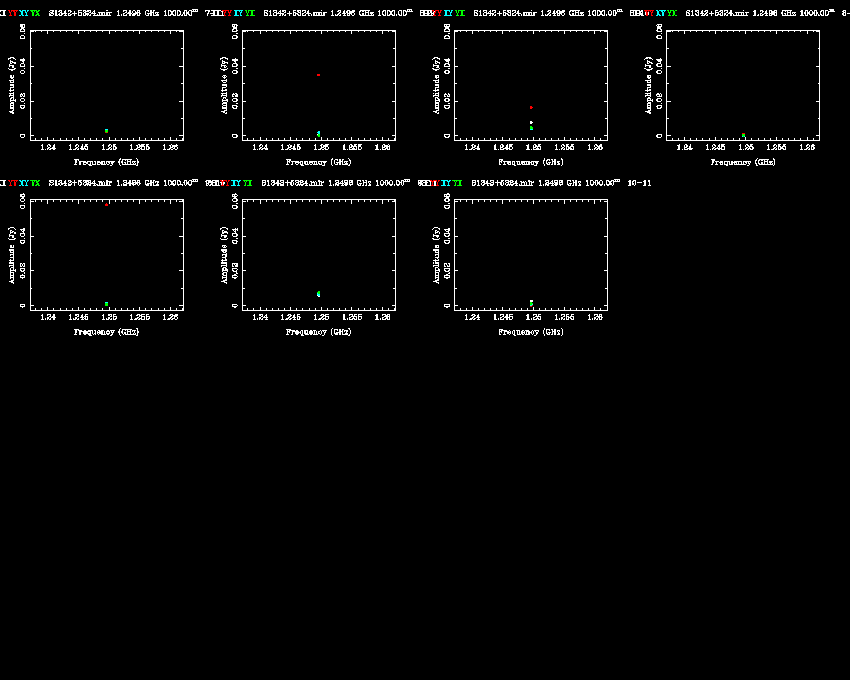

In [37]:
"""Display all plots for target in beam 11"""
#reran this after calibration because I had messed up, so it's calibrated data

pltlist_target = glob.glob(beamdir+'*target.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

In [38]:
#Now pick a few random beams to also produce plots for them
#Look at inspection plots to select beams that I think might be most problematic:
#11,20,22 plus 15 as mostly good (one hot atnenna?)
convert = apercal.convert(cfgfile)

#make sure in working directory
beamdir = convert.basedir + '20/crosscal/'
subs.managefiles.director(convert,'ch',beamdir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = convert.target[:-3] +'.mir'

start=timer()
get_timeamp(mirtarget,mirdevice='amptime_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_target.gif/gif')
get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')
end=timer()

print 'It took {0} minutes to get the visibilty amplitude plots for a target beam'.format((end-start)/60.)

#find files with glob
pltlist_gif = glob.glob('*.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


/data/adams/apertif/shakedown_S1342+5324/20/crosscal
It took 9.03124636809 minutes to get the visibilty amplitude plots for a target beam


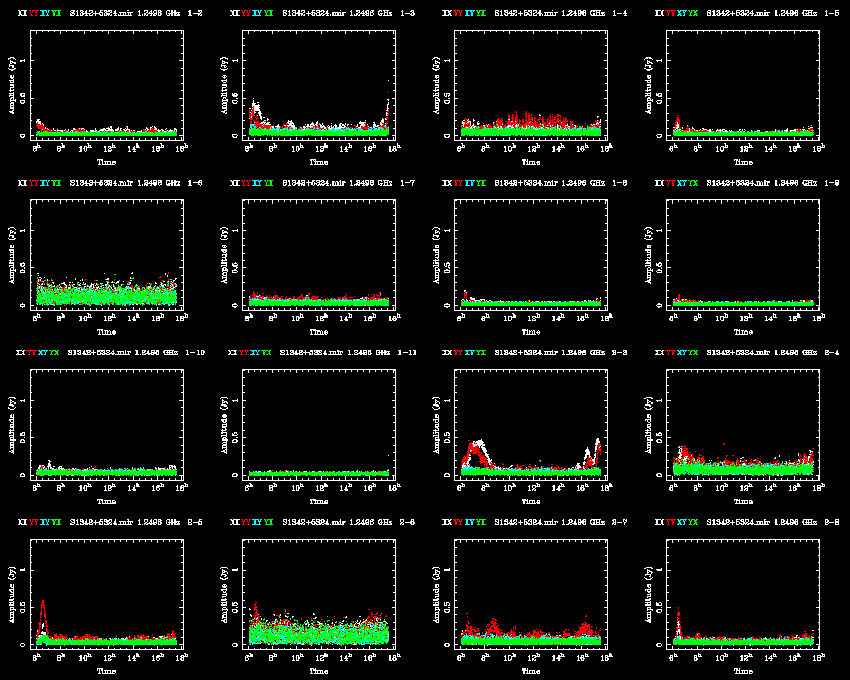

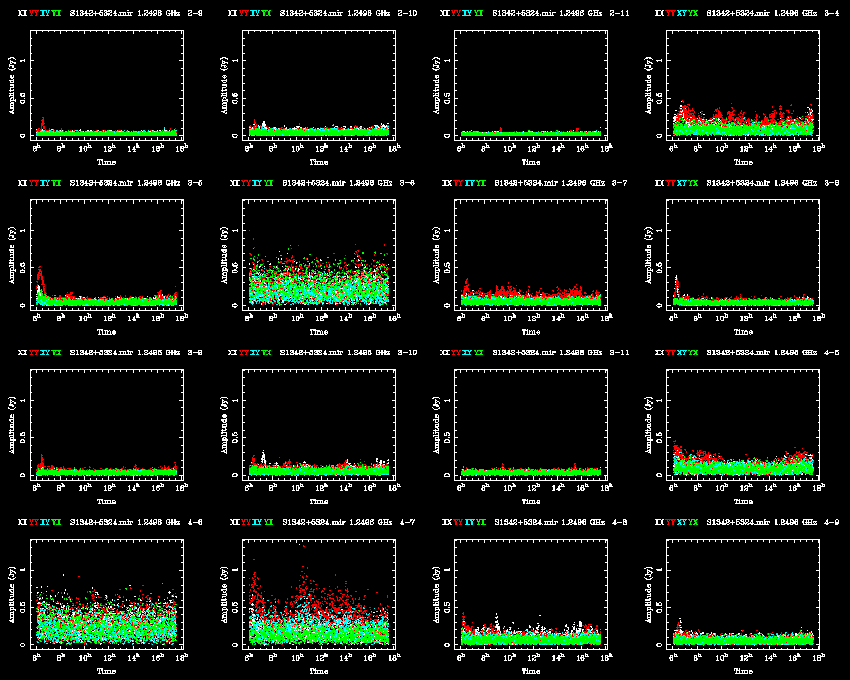

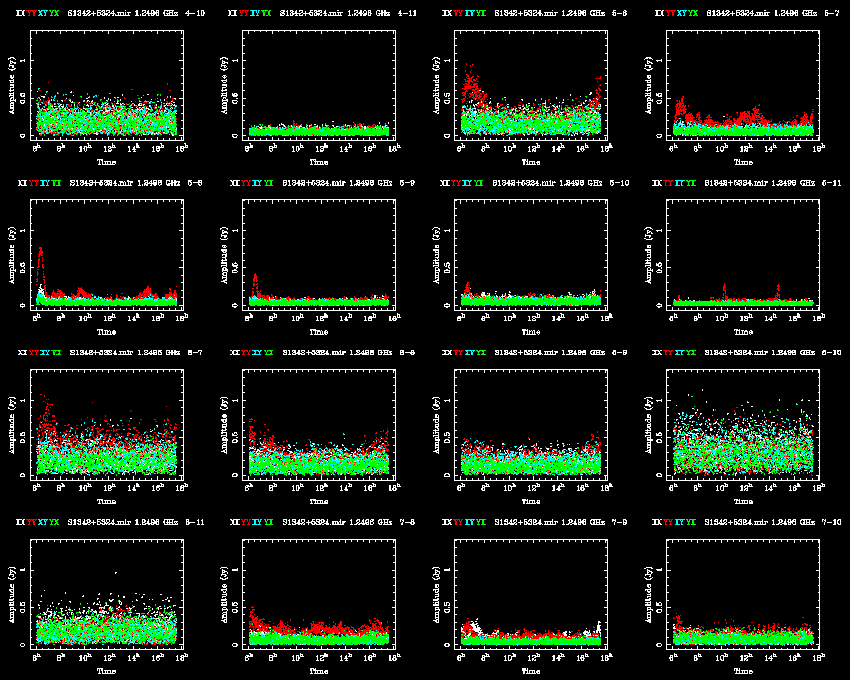

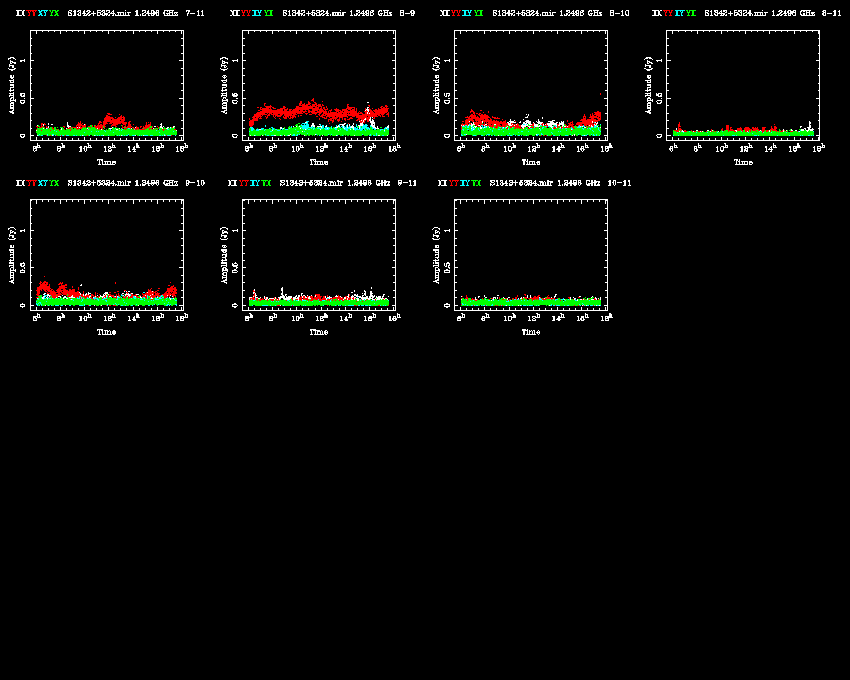

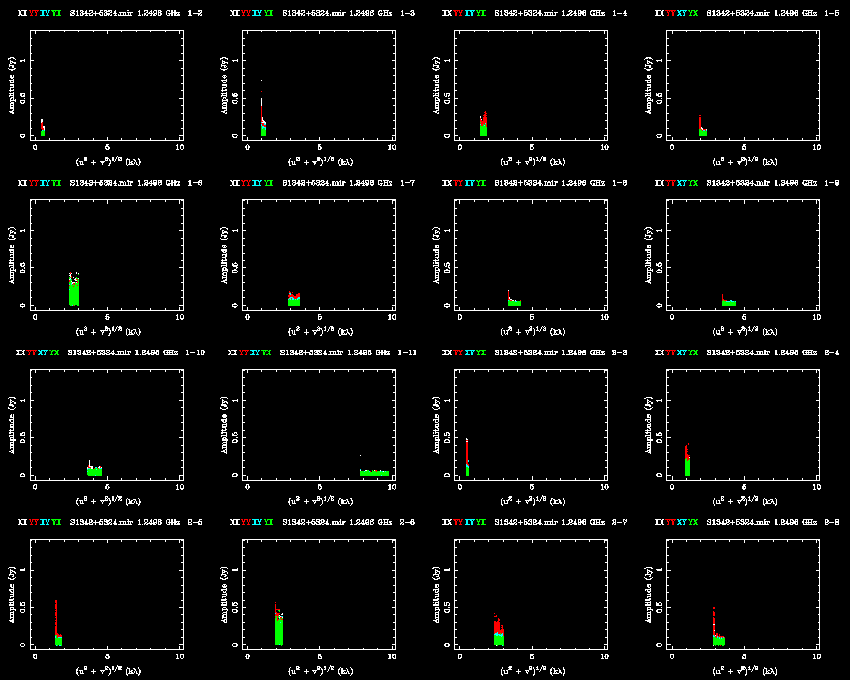

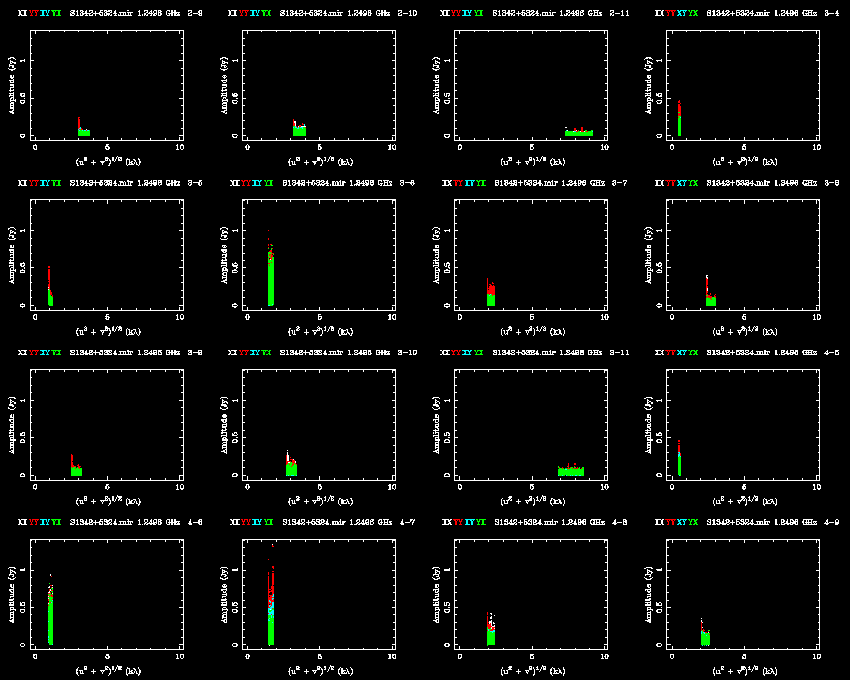

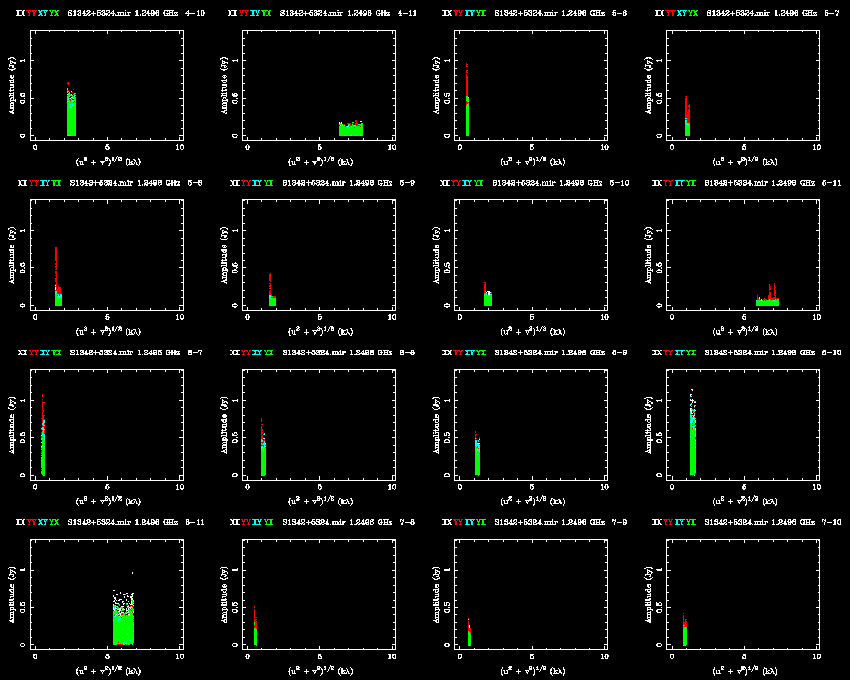

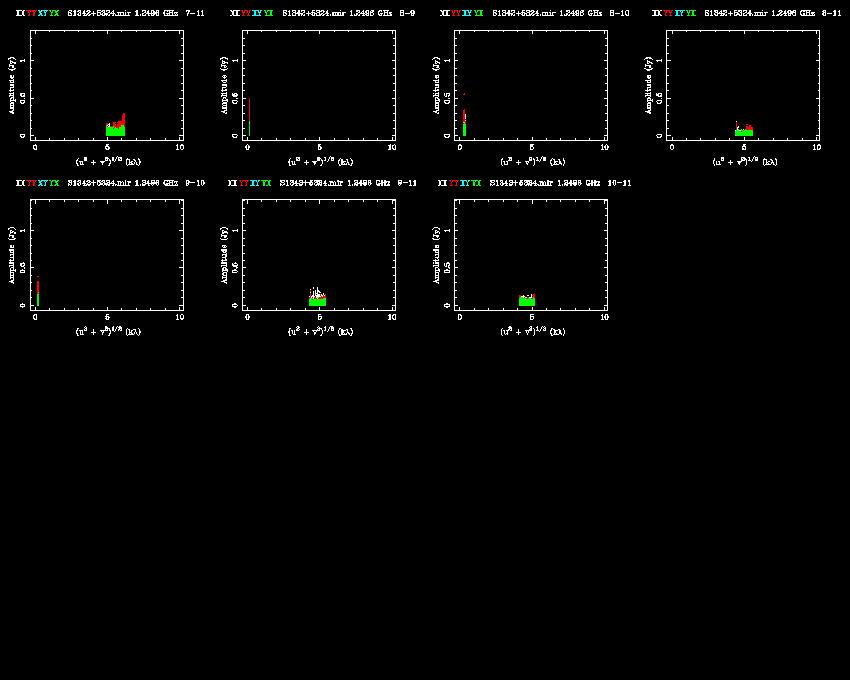

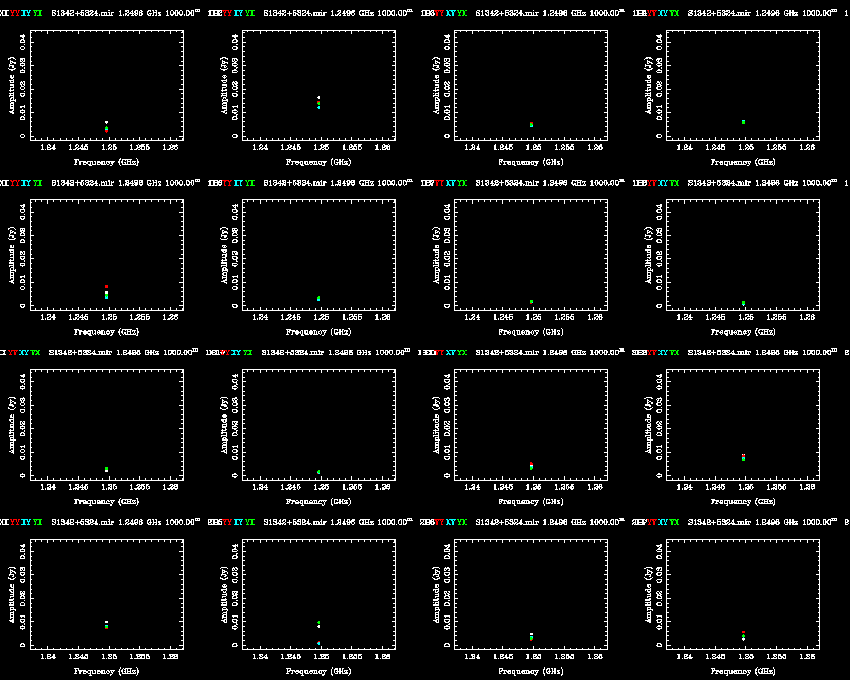

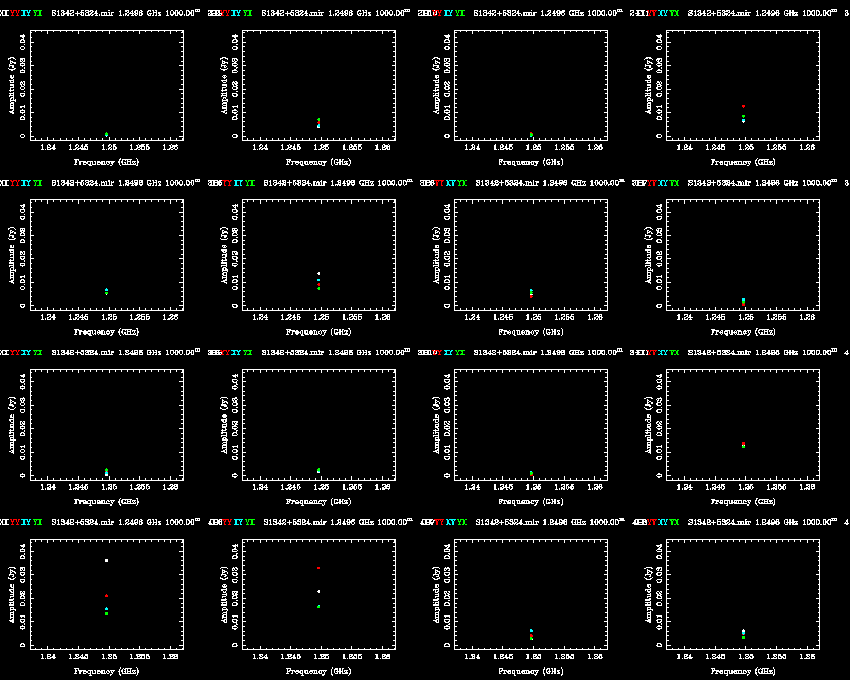

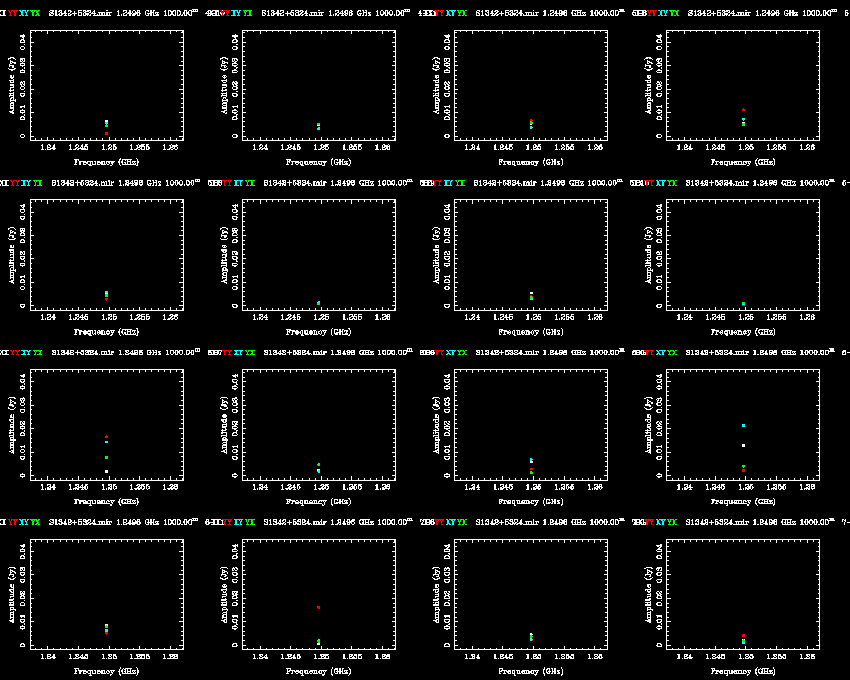

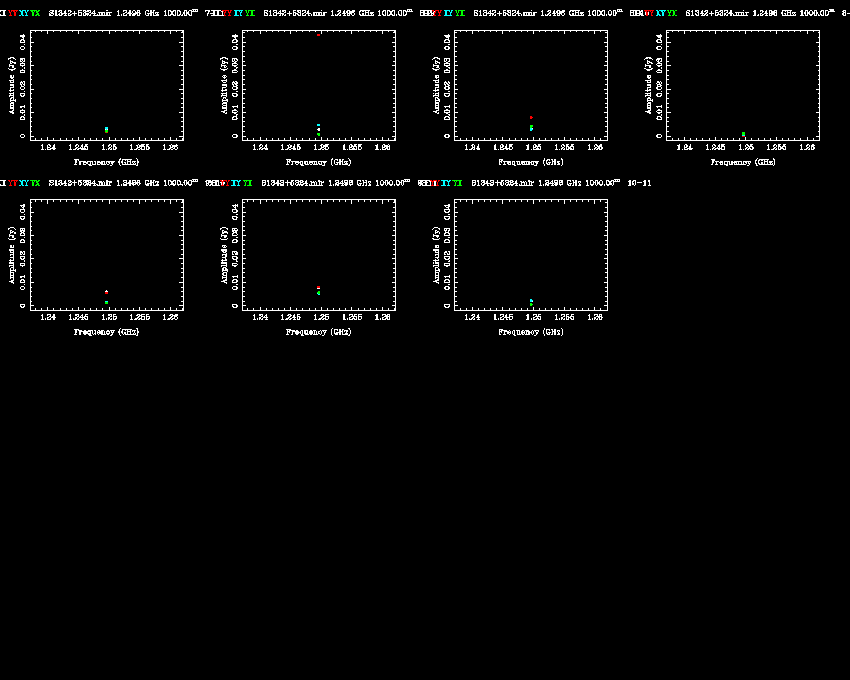

In [39]:
"""Display all plots for target in beam 20"""

pltlist_target = glob.glob(beamdir+'*target.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

In [40]:
#Now pick a few random beams to also produce plots for them
#Look at inspection plots to select beams that I think might be most problematic:
#11,20,22 plus 15 as mostly good (one hot atnenna?)
convert = apercal.convert(cfgfile)

#make sure in working directory
beamdir = convert.basedir + '22/crosscal/'
#start w/ beam 00, then do other beams separately
subs.managefiles.director(convert,'ch',beamdir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = convert.target[:-3] +'.mir'

start=timer()
get_timeamp(mirtarget,mirdevice='amptime_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_target.gif/gif')
get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')
end=timer()

print 'It took {0} minutes to get the visibilty amplitude plots for a target beam'.format((end-start)/60.)

#find files with glob
pltlist_gif = glob.glob('*.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


/data/adams/apertif/shakedown_S1342+5324/22/crosscal
It took 9.22064793507 minutes to get the visibilty amplitude plots for a target beam


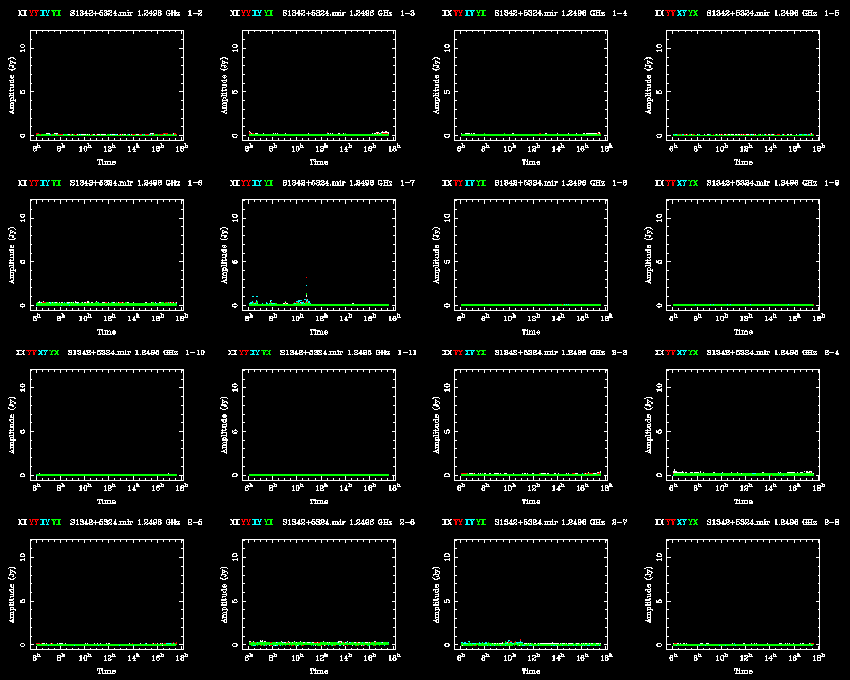

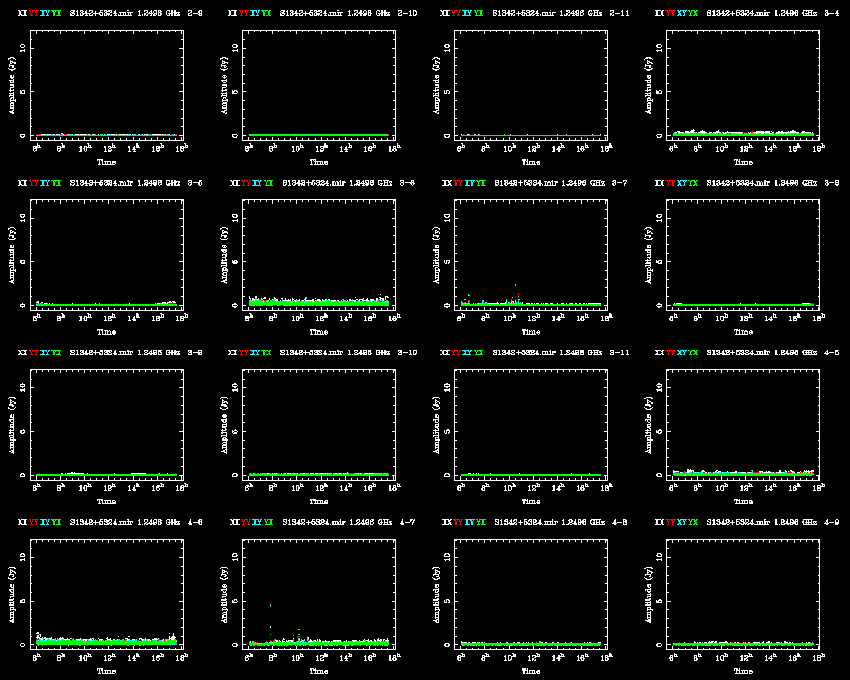

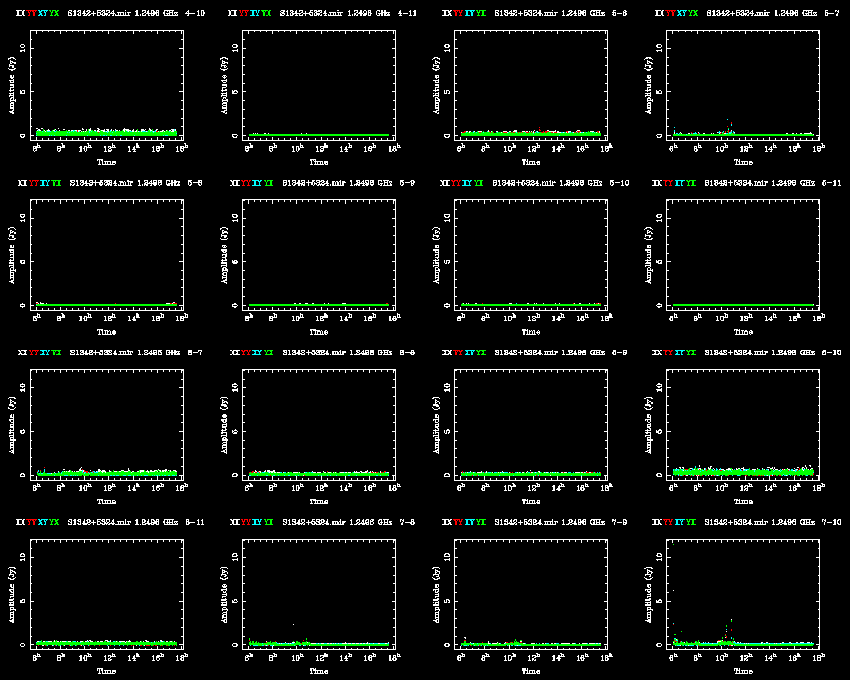

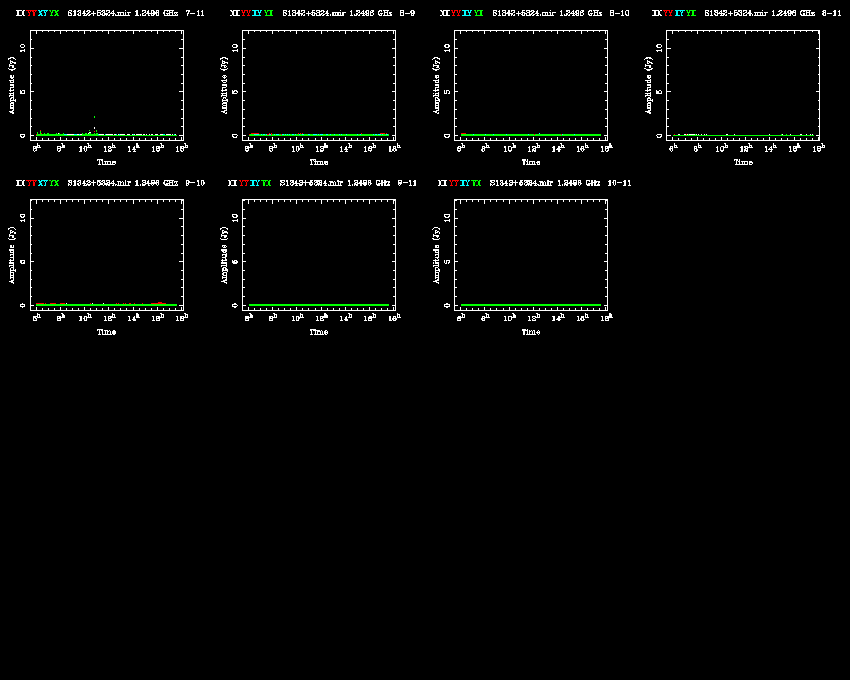

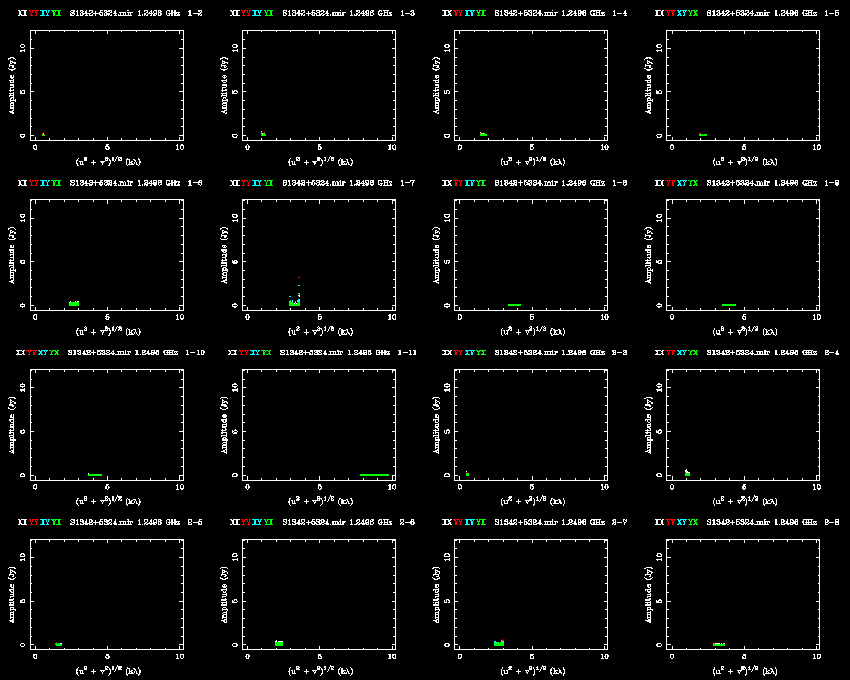

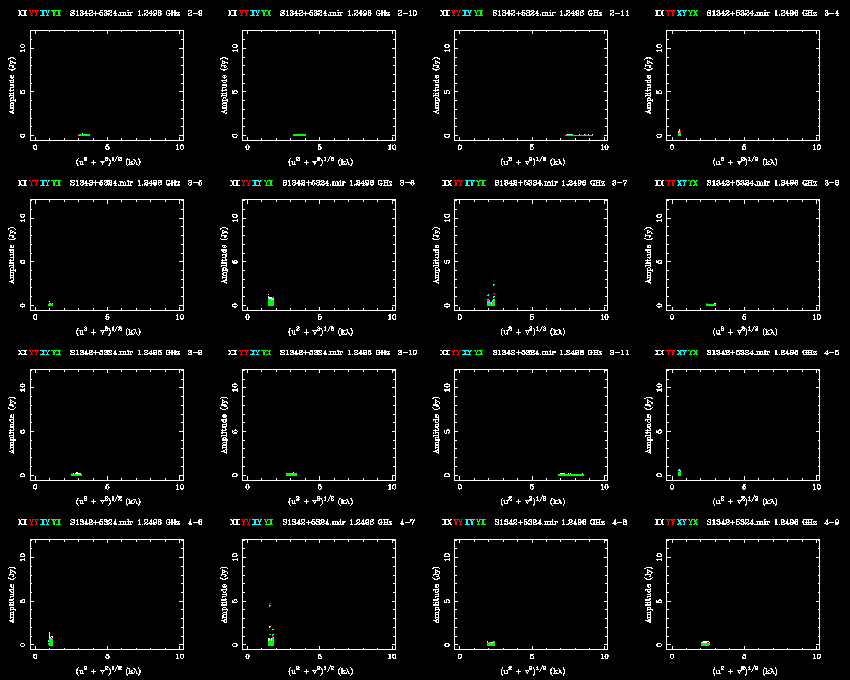

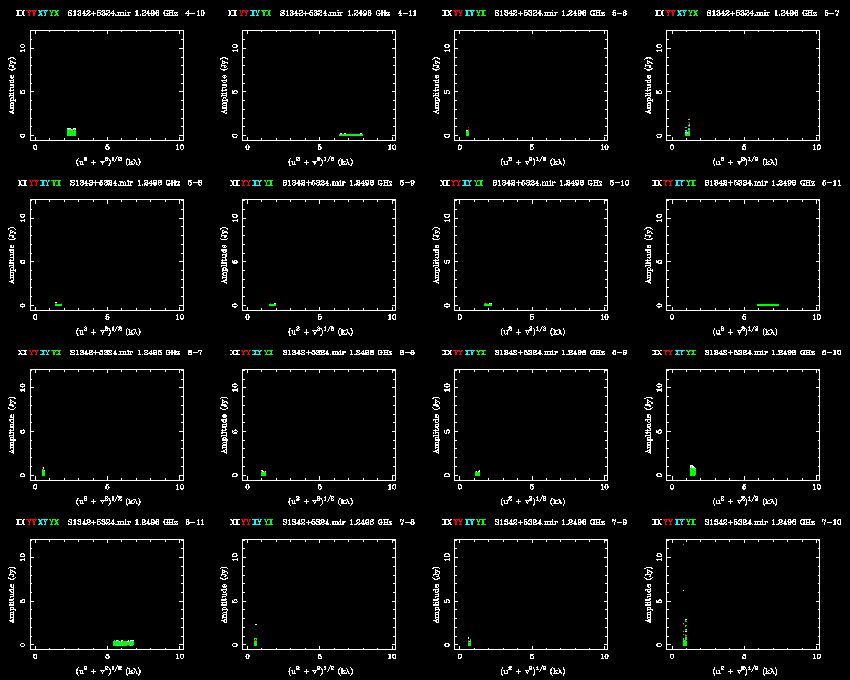

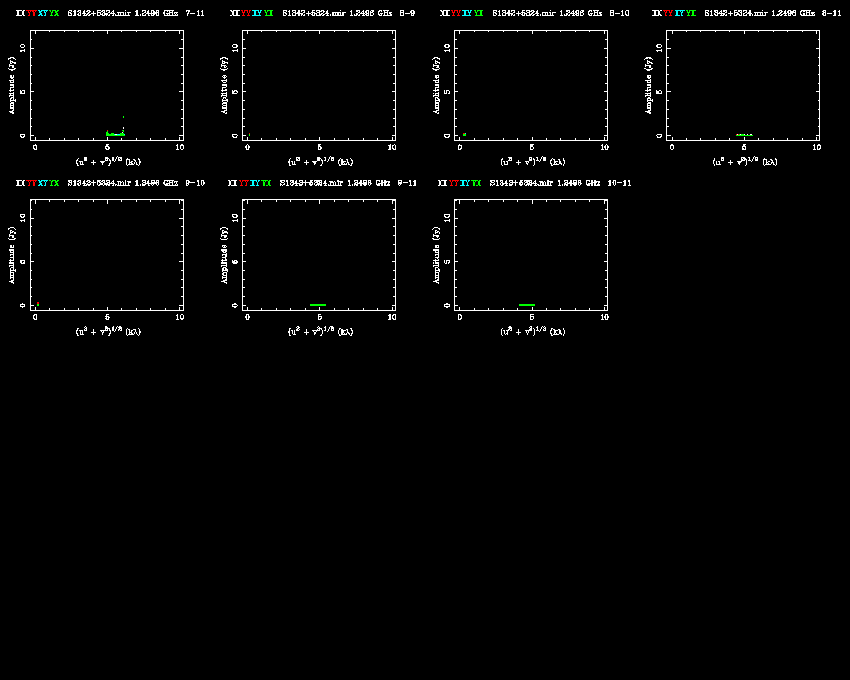

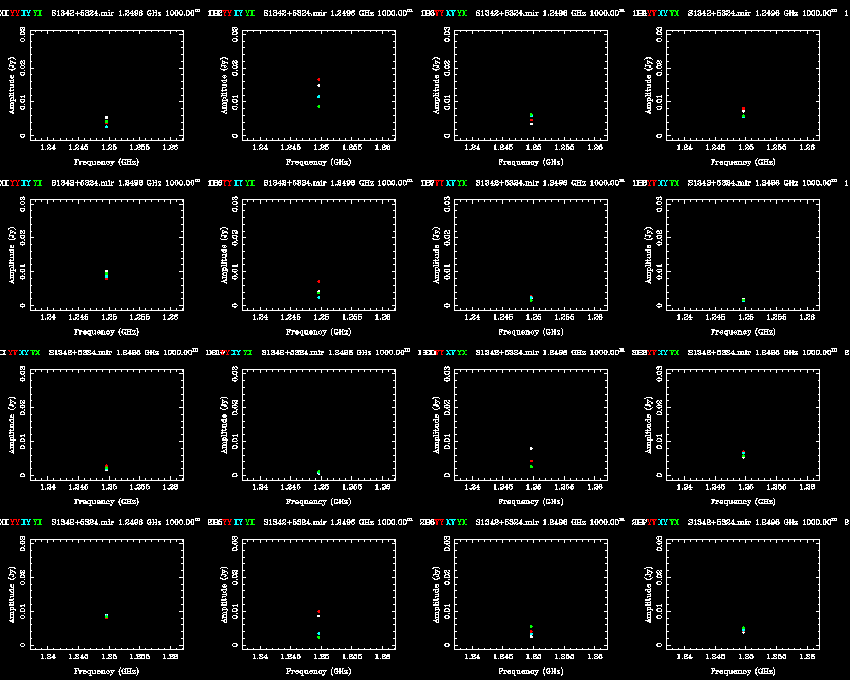

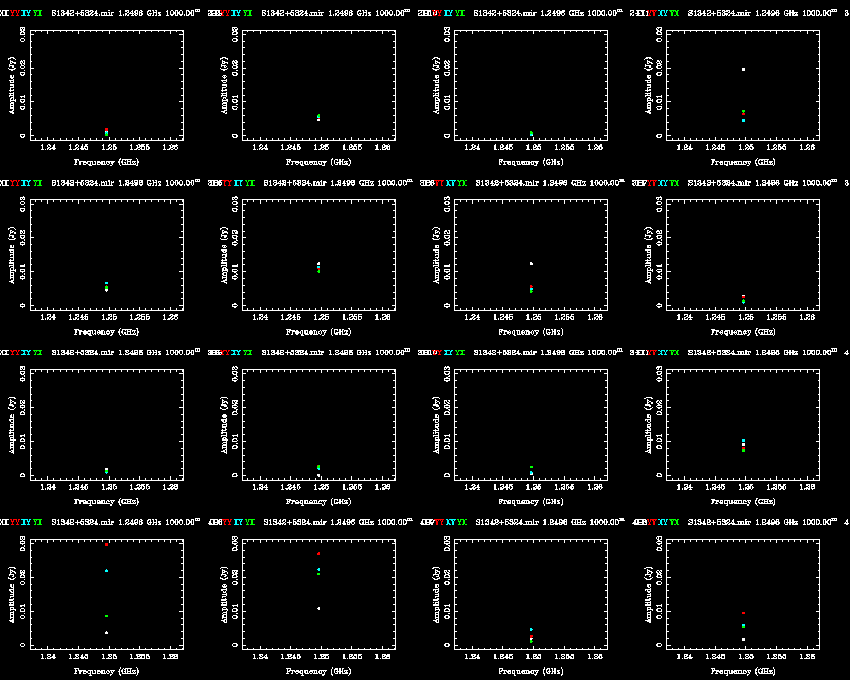

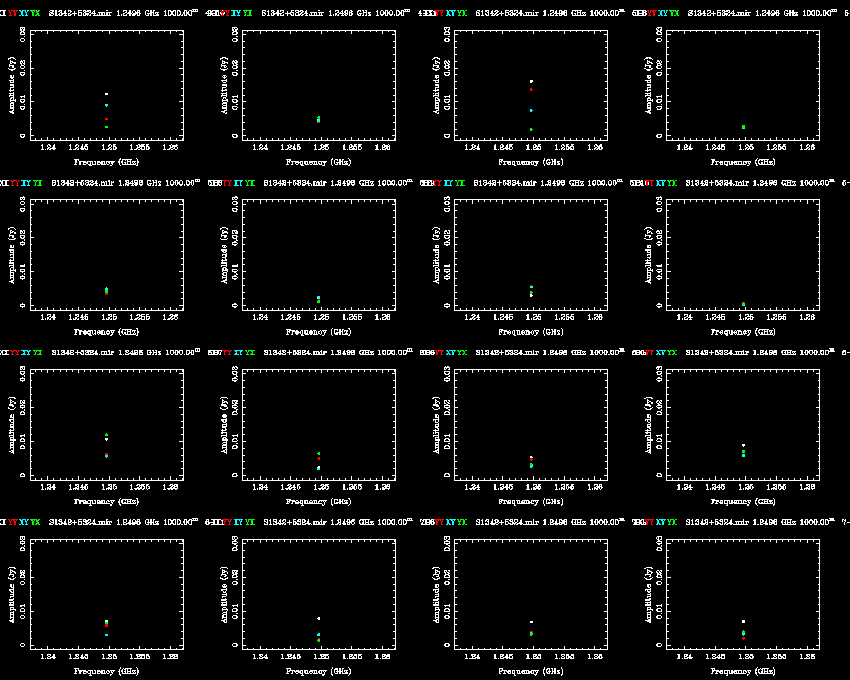

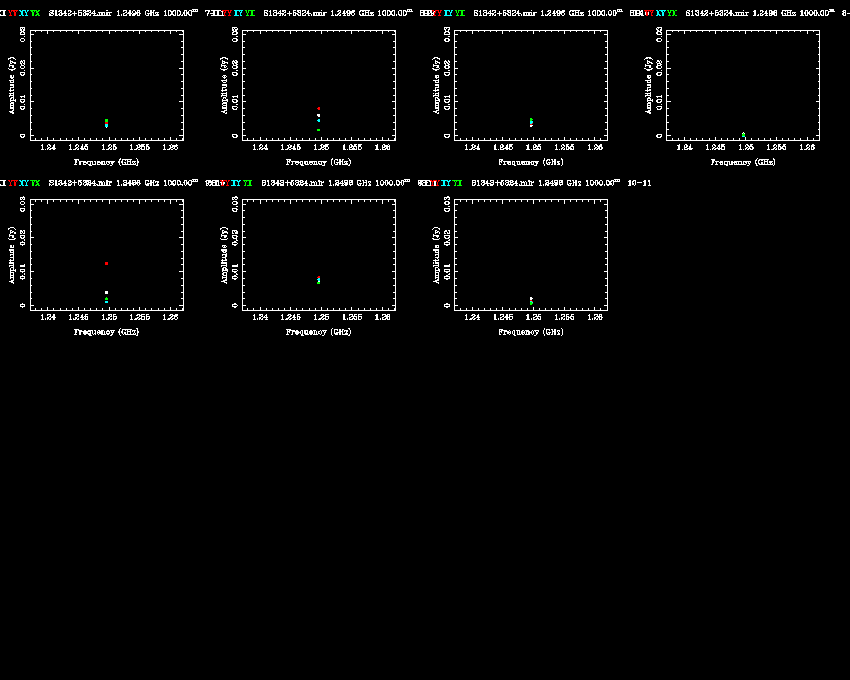

In [41]:
"""Display all plots for target in beam 22"""

pltlist_target = glob.glob(beamdir+'*target.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

In [42]:
#Now pick a few random beams to also produce plots for them
#Look at inspection plots to select beams that I think might be most problematic:
#11,20,22 plus 15 as mostly good (one hot atnenna?)
convert = apercal.convert(cfgfile)

#make sure in working directory
beamdir = convert.basedir + '15/crosscal/'
#start w/ beam 00, then do other beams separately
subs.managefiles.director(convert,'ch',beamdir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = convert.target[:-3] +'.mir'

start=timer()
get_timeamp(mirtarget,mirdevice='amptime_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_target.gif/gif')
get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')
end=timer()

print 'It took {0} minutes to get the visibilty amplitude plots for a target beam'.format((end-start)/60.)

#find files with glob
pltlist_gif = glob.glob('*.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

CONVERT - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


/data/adams/apertif/shakedown_S1342+5324/15/crosscal
It took 9.2257109642 minutes to get the visibilty amplitude plots for a target beam


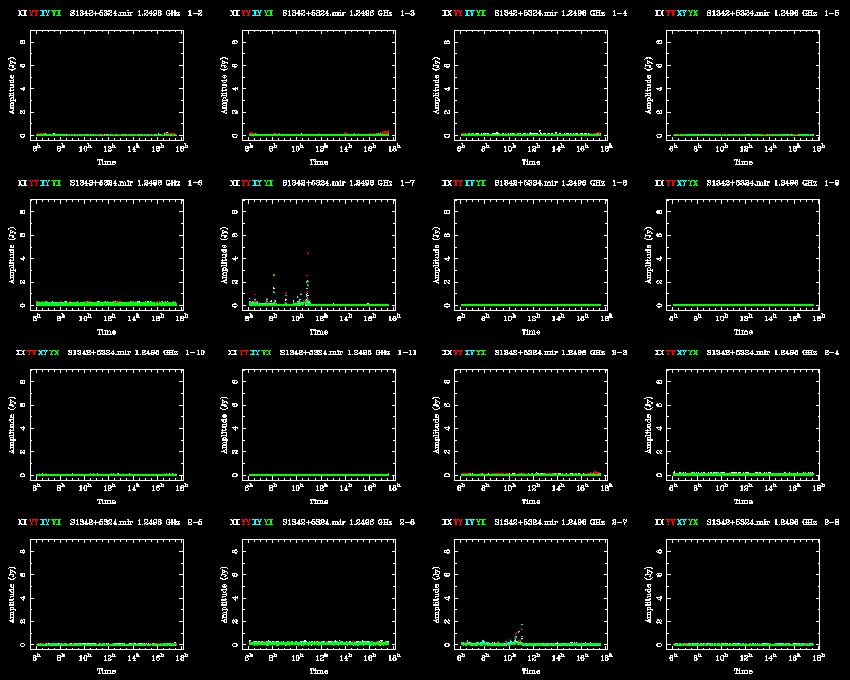

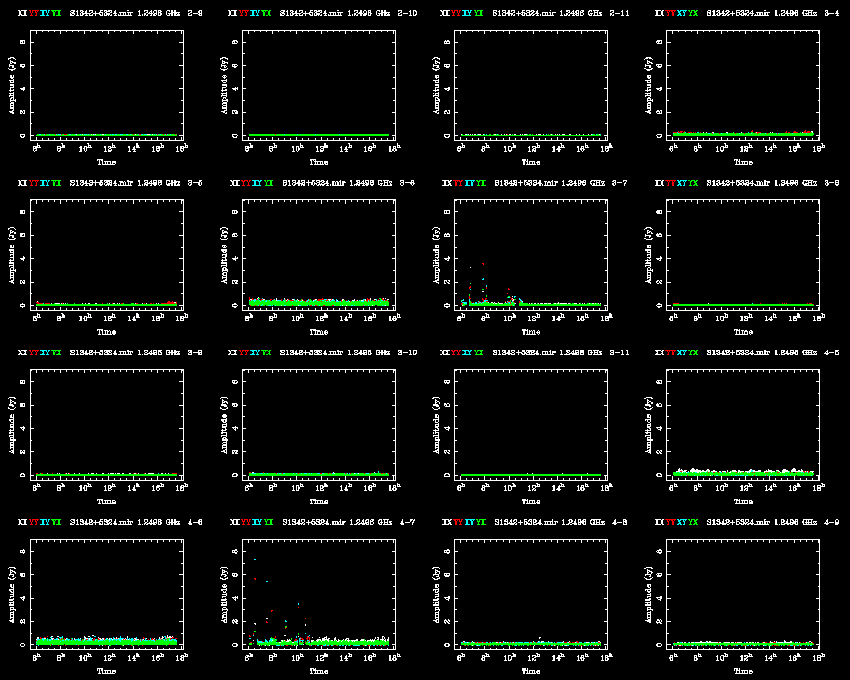

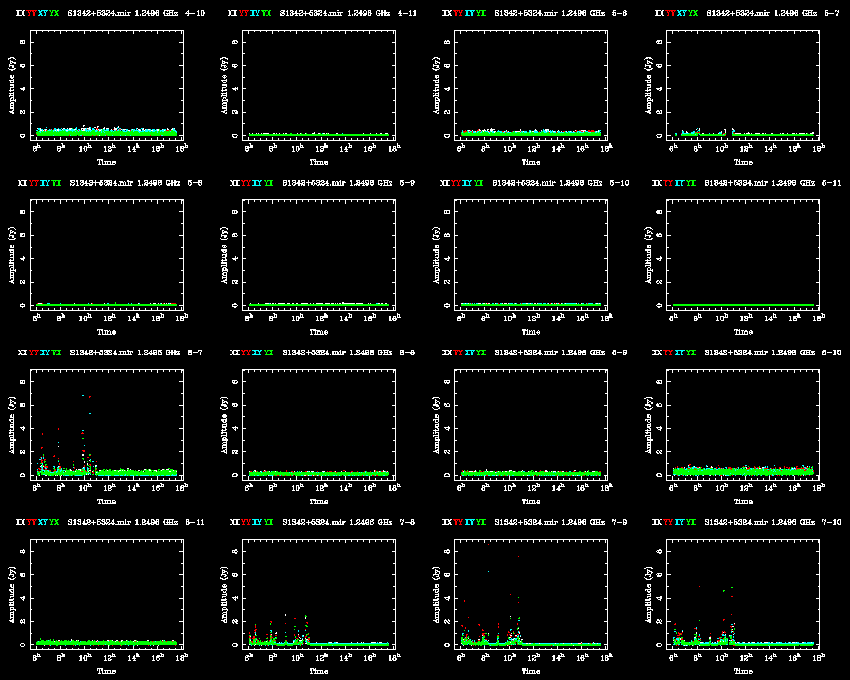

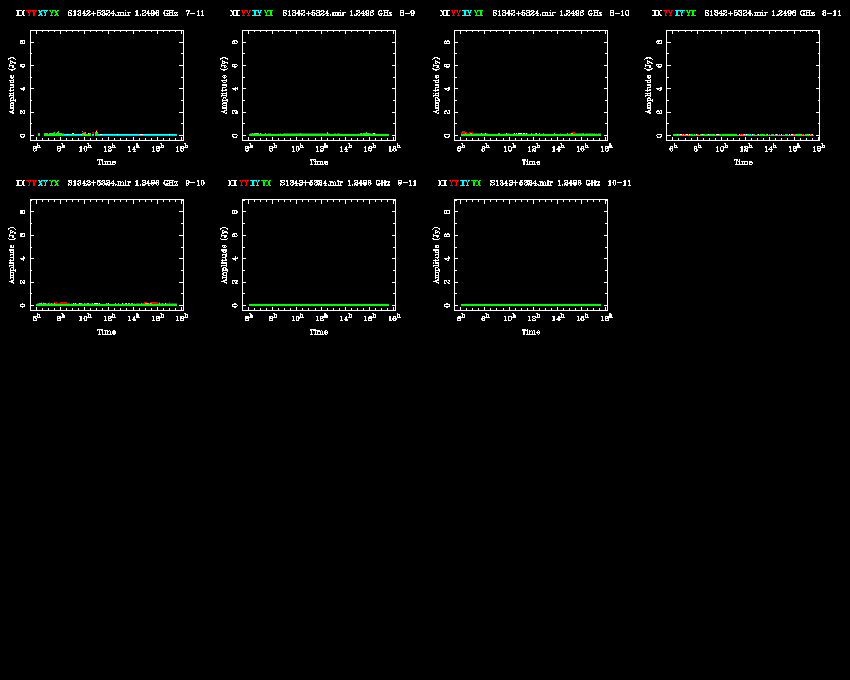

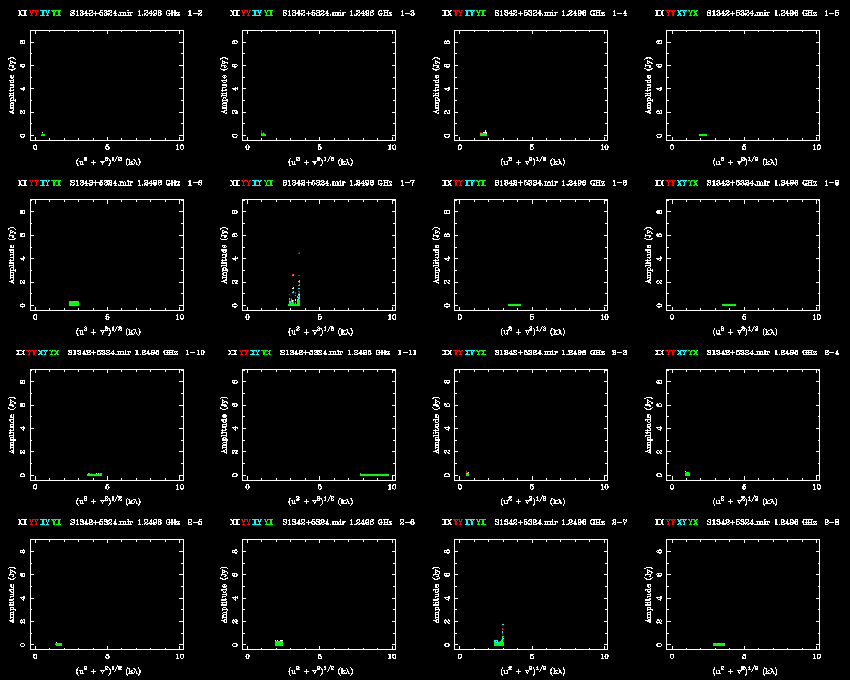

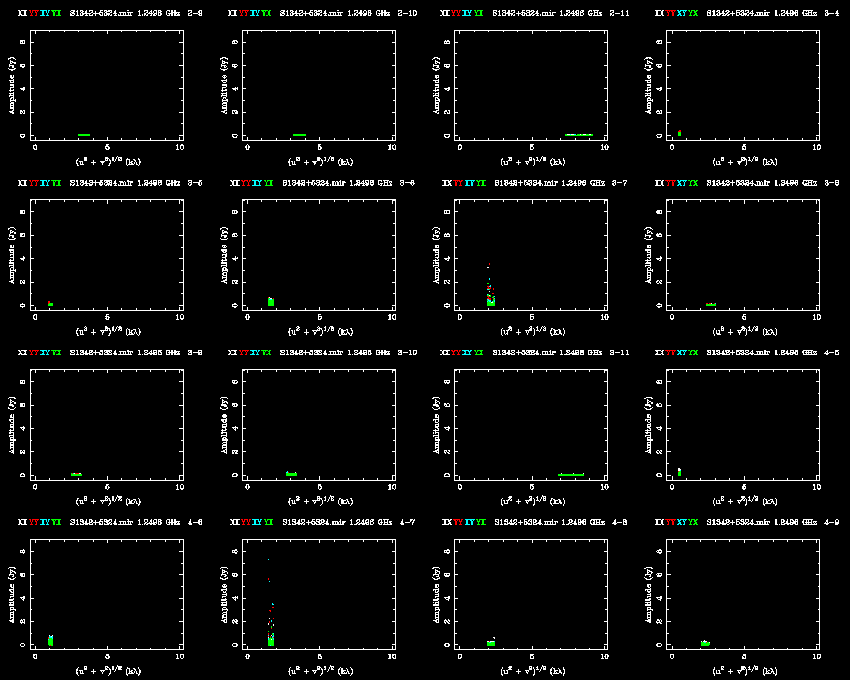

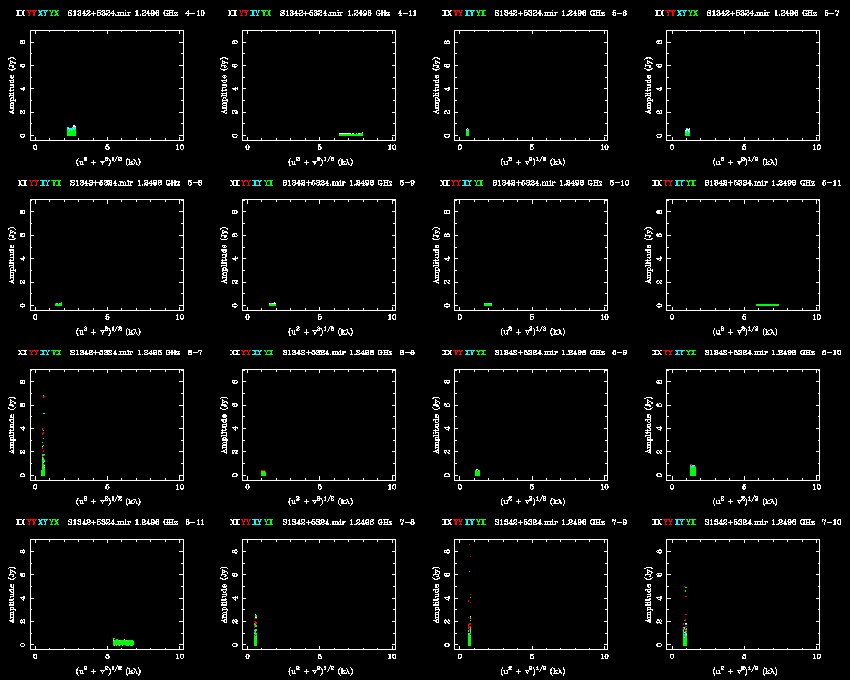

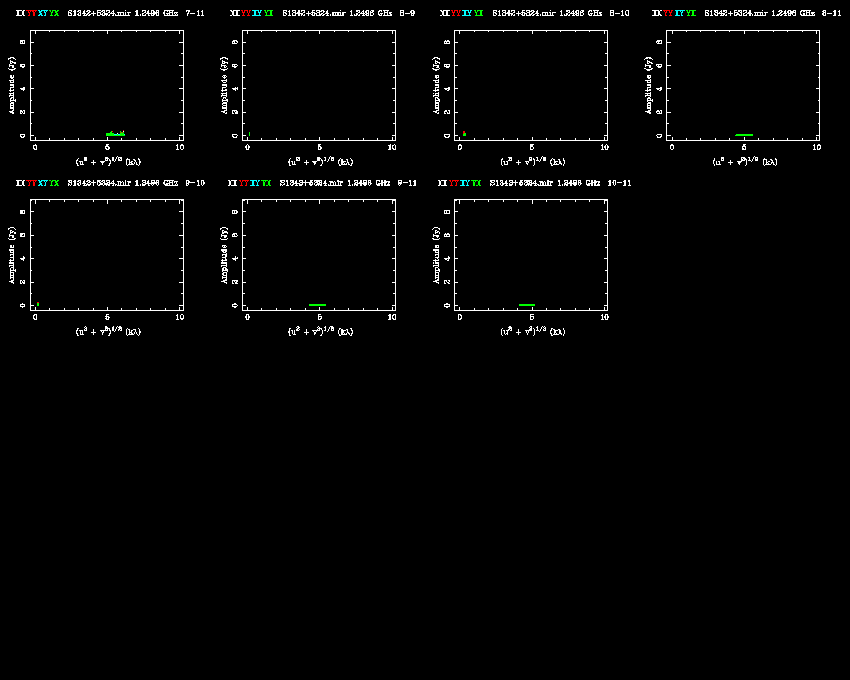

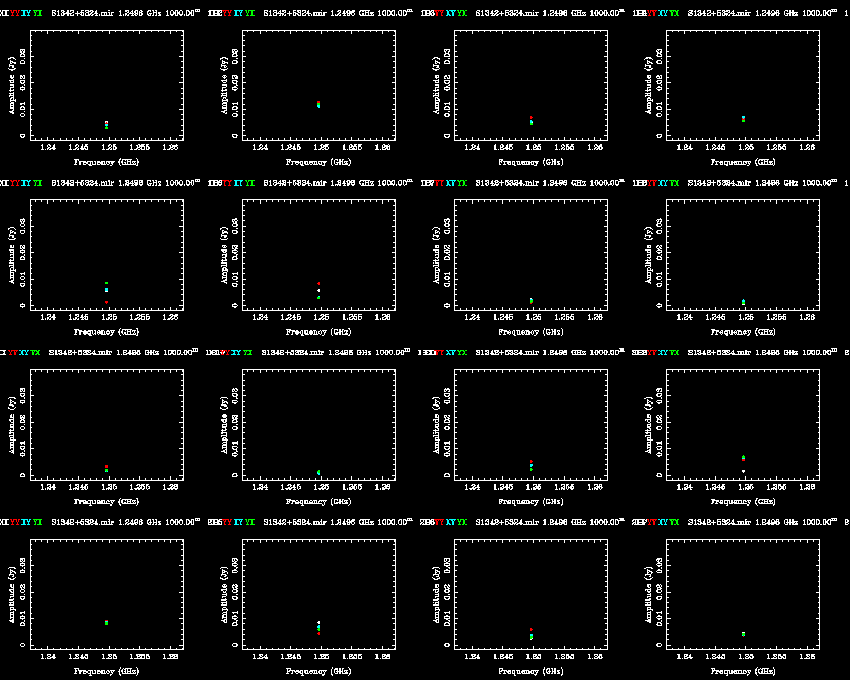

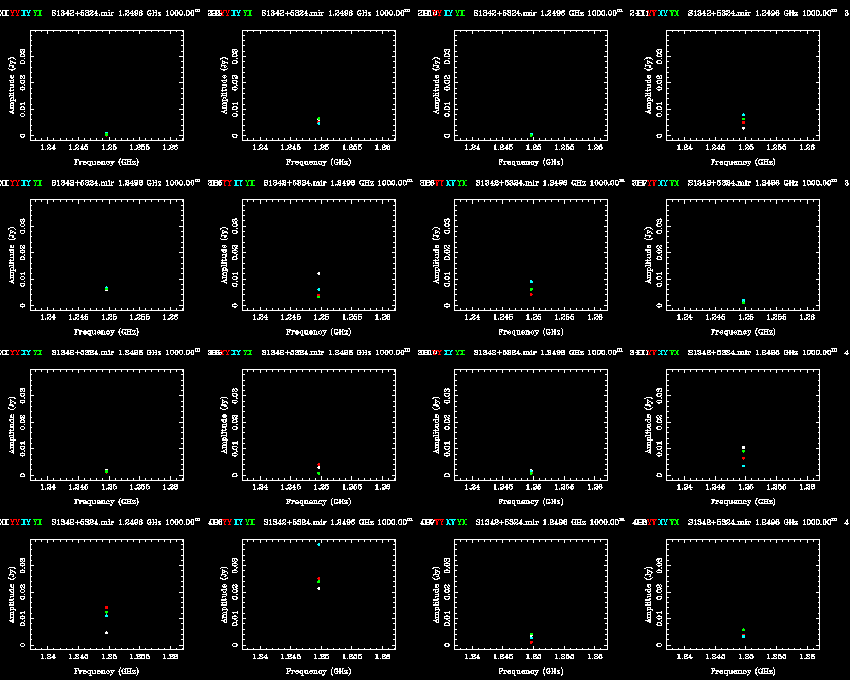

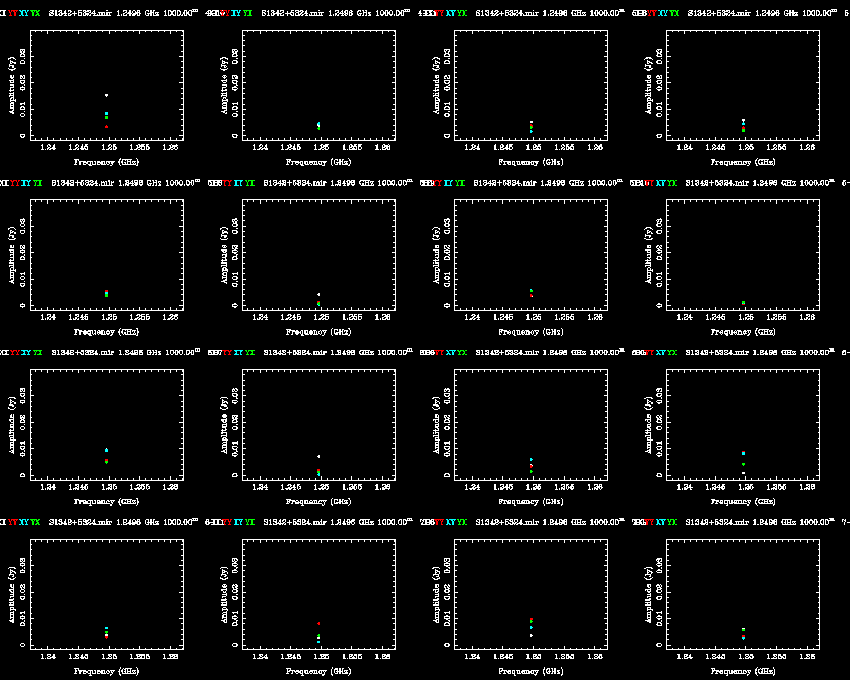

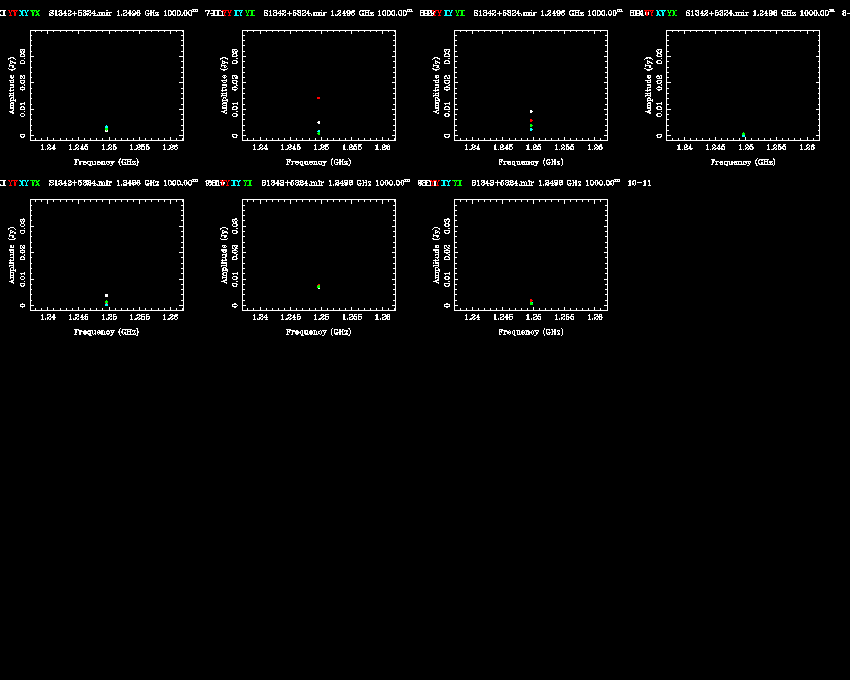

In [43]:
"""Display all plots for target in beam 15"""

pltlist_target = glob.glob(beamdir+'*target.gif*png')
#print atpltlist_png

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

I'm not convinced of data quality but also don't see anything obvious to flag


Will continue on with pipeline for now and see how things go

In [6]:
crosscal=apercal.ccal(cfgfile)
crosscal.show()

CROSSCAL - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


CROSSCAL
	crosscal_bandpass = True
	crosscal_delay = True
	crosscal_polarisation = False
	crosscal_transfer_to_target = True


In [7]:
start=timer()
crosscal.go()
end=timer()

print 'It takes {0} minutes to calculate crosscal solutions'.format((end-start)/60.)

#Crosscal solutions are actually applied in next stage?

CROSSCAL - INFO : ########## Starting CROSS CALIBRATION ##########
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###
CROSSCAL - INFO : ### No polarisation calibration done! ###
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 38 beams! #
CROSSCAL - WARNING : # Beam 00 does not seem to contain data! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 01! #
CROSSCAL - WARNING : # Beam 02 does not seem to contain data! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 03! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 04! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 05! #
CROSSCAL - INFO : # Cal

It takes 2.4487557133 minutes to calculate crosscal solutions


/data/adams/apertif/shakedown_S1342+5324/00/crosscal
It took 5.51842434804 minutes to get the visibilty amplitude plots for a target beam


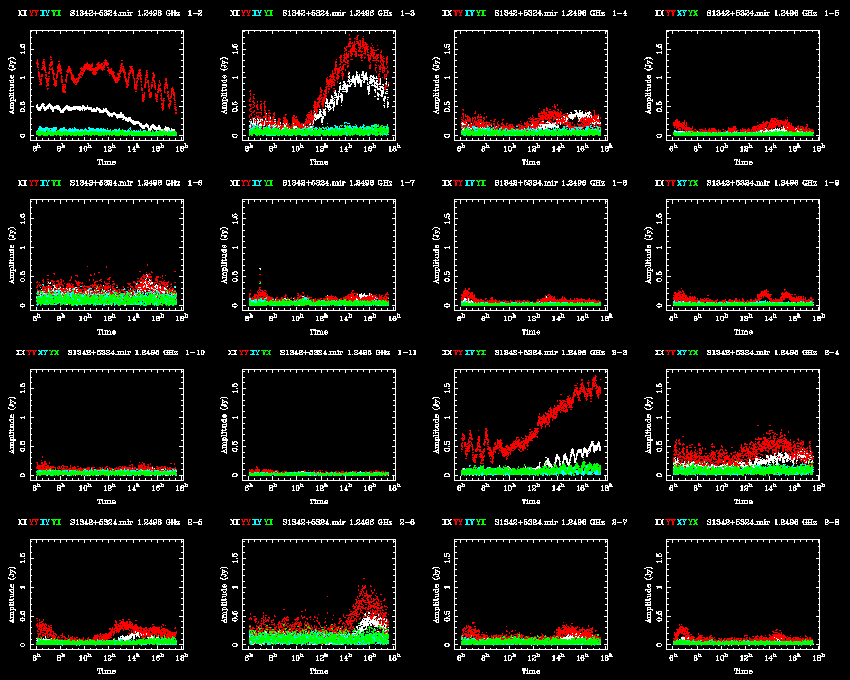

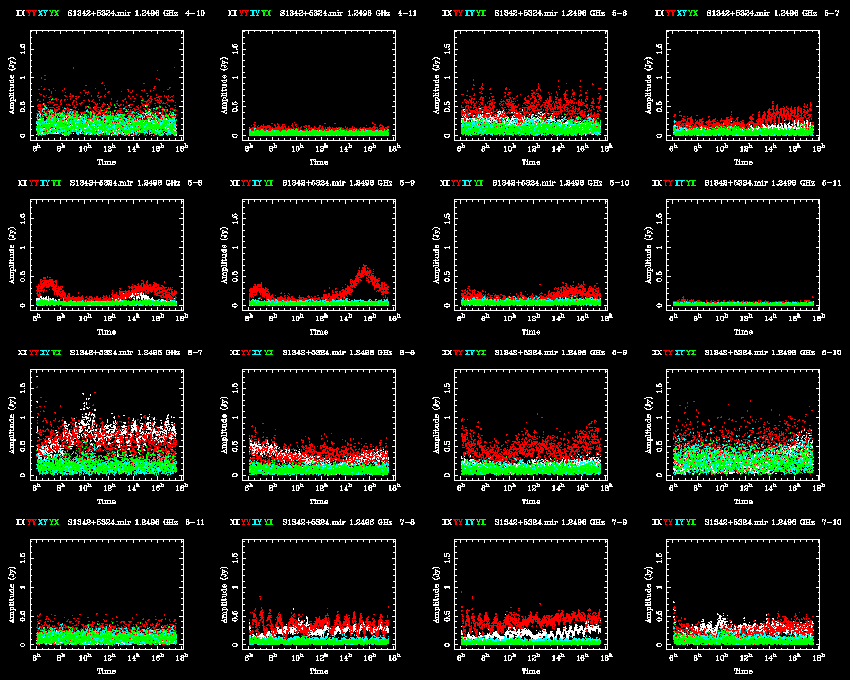

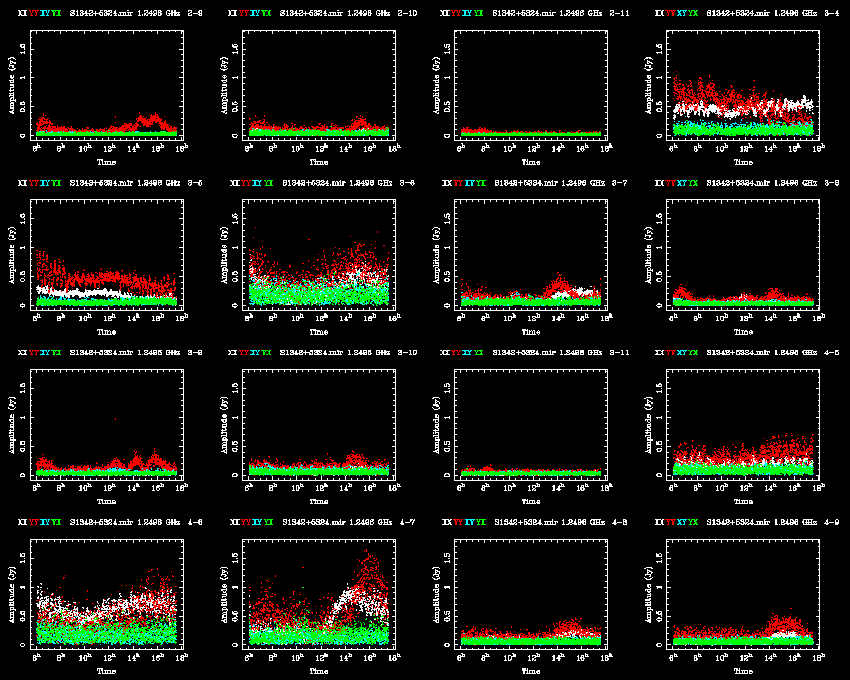

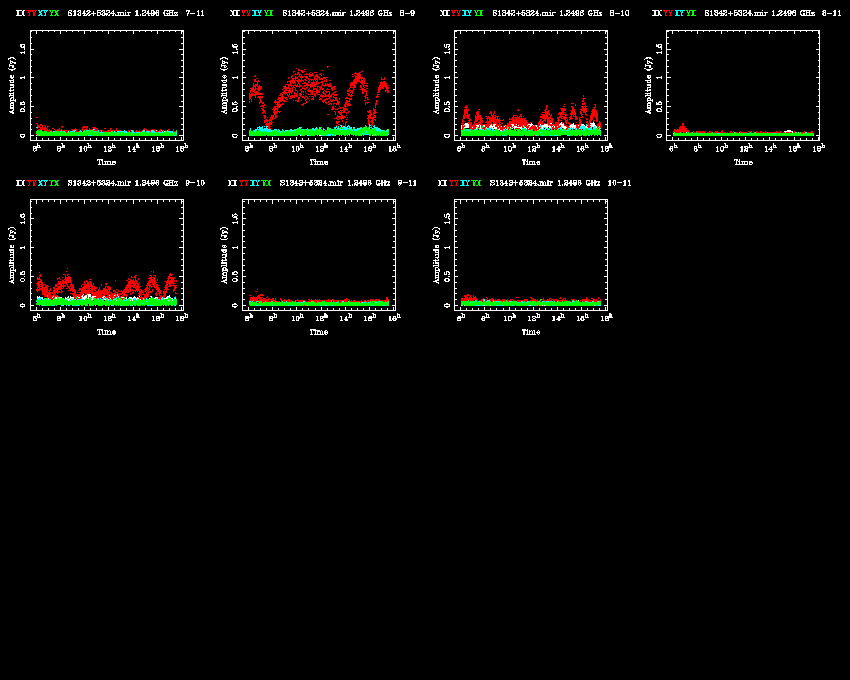

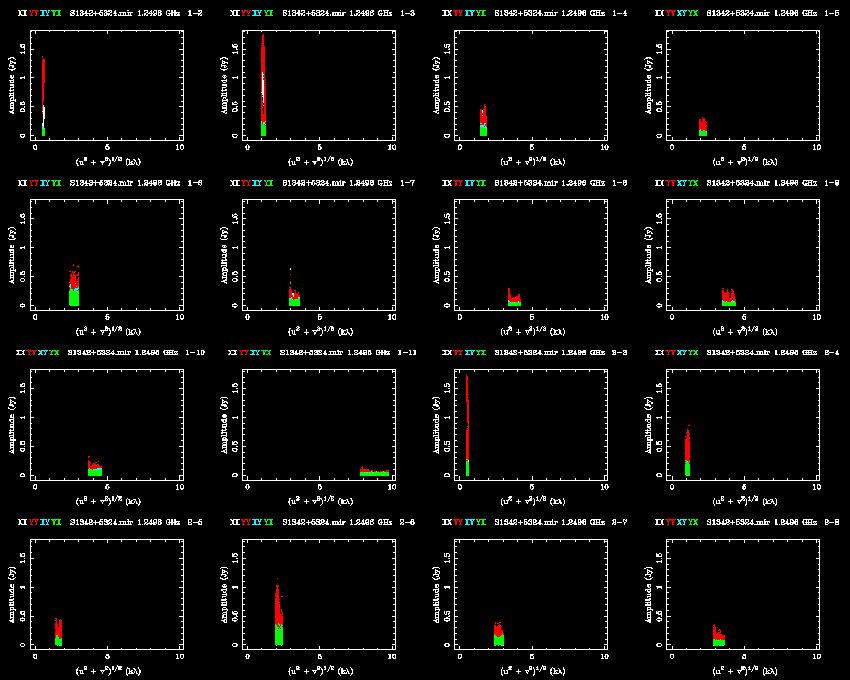

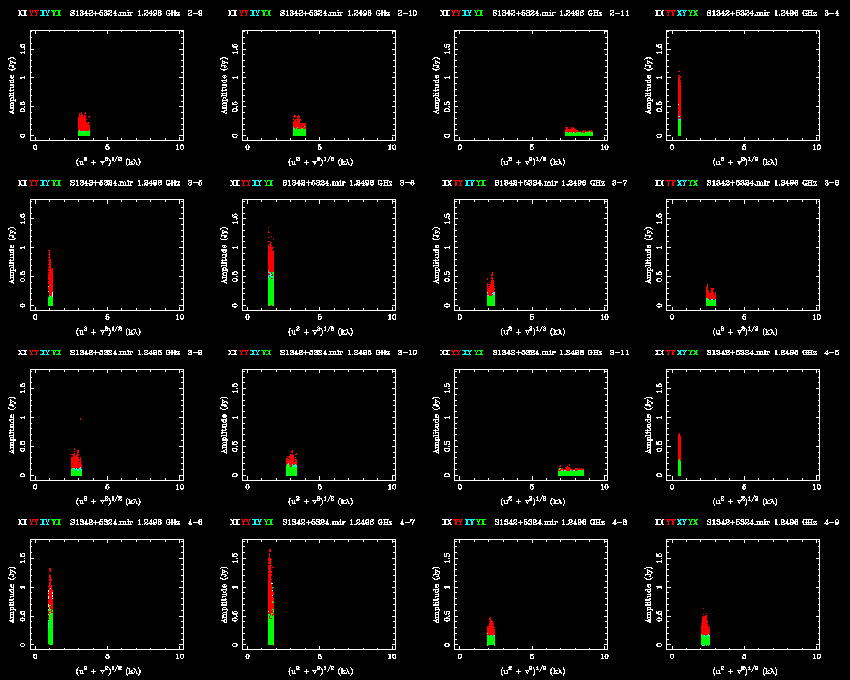

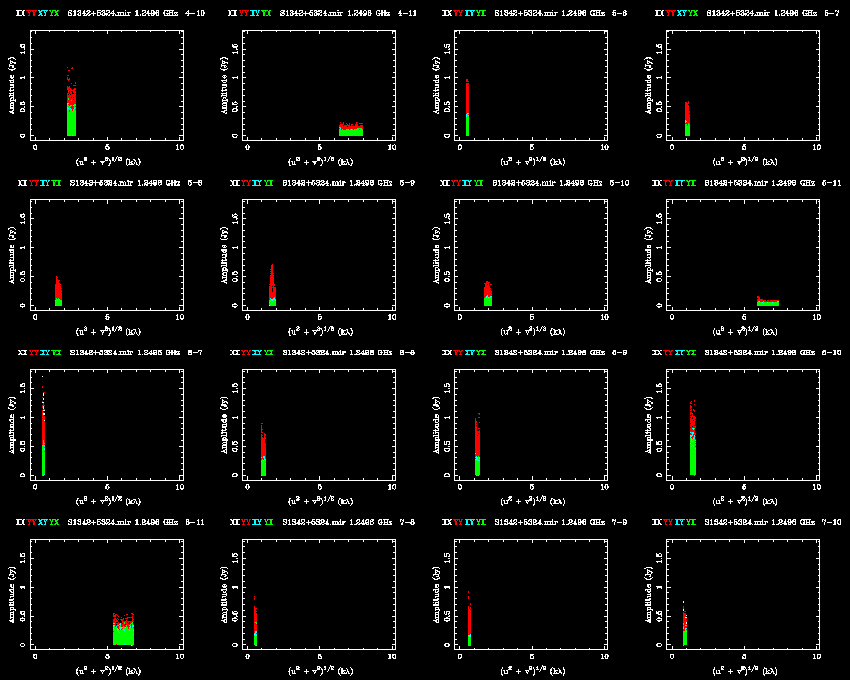

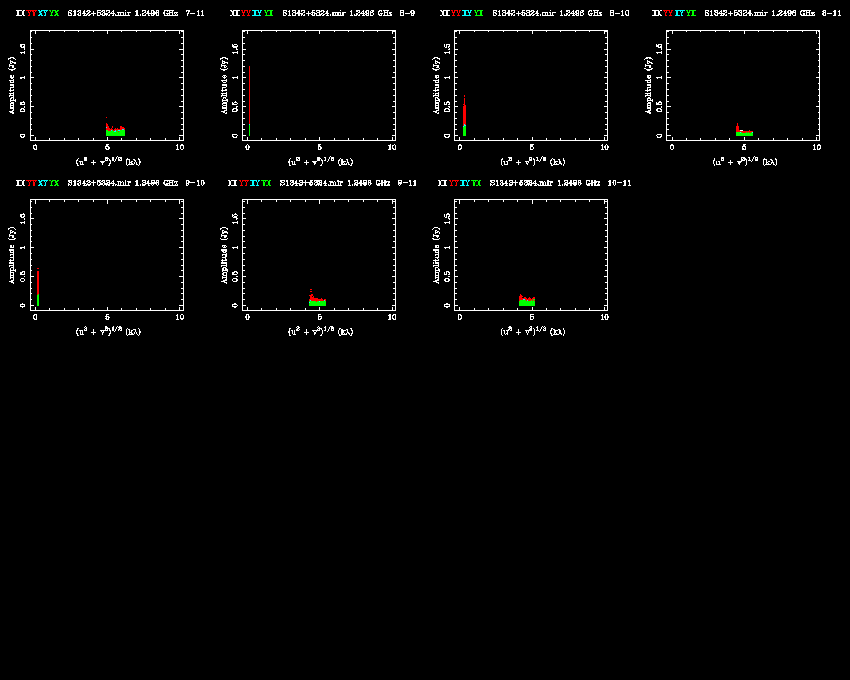

In [35]:
#solutions have been copied to datasets
#So could try quickly redoing plots to look at calibrated data, but don't think that should change much
#will do single central beam as a test

#make sure in working directory
beamdir = crosscal.basedir + '00/crosscal/'
#start w/ beam 00, then do other beams separately
subs.managefiles.director(crosscal,'ch',beamdir)

#Now get plots for target, fluxcal and polcal

print os.getcwd() #check where I am

mirtarget = crosscal.target

start=timer()
get_timeamp(mirtarget,mirdevice='amptime_cal_target.gif/gif')
get_uvdistamp(mirtarget,mirdevice='ampuvdist_cal_target.gif/gif')
#get_freqamp(mirtarget,mirdevice='ampfreq_target.gif/gif')
end=timer()

print 'It took {0} minutes to get the visibilty amplitude plots for a target beam'.format((end-start)/60.)

#find files with glob
pltlist_gif = glob.glob('*cal_target.gif*') #because of this syntax, can only run once!
"""This cell should only be run once, or it will produce double plots
It would be better if I could change search command to be *.gif or *.gif_? 
but I'm not sure how to do that and am leaving it for a later time"""

#append .png to end of all files so that they can be displayed
for f in pltlist_gif:
    shutil.copyfile(f,f+'.png')

pltlist_target = glob.glob(convert.crosscaldir+'/'+'*cal_target.gif*png')

#load each file as an image and display it
for f in pltlist_target:
    tmp=Image(f)
    display(tmp)

In [8]:
#also want to look at calibration solutions themselves
"""
Plot bandpass solution (amplitude & phase)
Print gain amplitude solutions
"""
#make sure in crosscal directory
subs.managefiles.director(crosscal,'ch',crosscal.crosscaldir)

print os.getcwd()

#define miriad target - calibrator in this case!
#vis = convert.fluxcal
mir = crosscal.fluxcal #[:-3] +'.mir'


#run gpplt to get bandpass shape (amp)
gpplt = lib.miriad('gpplt')
gpplt.vis = mir
gpplt.device = 'bp_amp.gif/gif'
gpplt.options='band'
gpplt.yaxis='amp'
gpplt.log = '/home/adams/shakedown/logs/bp_amp_output.txt' #just to minimize output to screen
gpplt.go()

#run gpplt to get bandpass phases
gpplt = lib.miriad('gpplt')
gpplt.vis = mir
gpplt.device = 'bp_phase.gif/gif'
gpplt.options='band'
gpplt.yaxis='phase'
gpplt.log = '/home/adams/shakedown/logs/bp_phase_output.txt' #just to minimize output to screen
gpplt.go()

#run gpplt to get gain amplitude solution
gpplt = lib.miriad('gpplt')
gpplt.vis = mir
gpplt.device = ''
gpplt.log = '/home/adams/shakedown/logs/amp_output.txt' #just to minimize output to screen
gpplt.go()

/data/adams/apertif/shakedown_S1342+5324/00/crosscal


['',
 'gpplt: Revision (not recorded)',
 '',
 'The base time is 18OCT13:00:00:00.0']

In [9]:
"""convert *gif to *png"""

#find files with glob
bpamplist_gif = glob.glob('bp_amp.gif*')
bpphaselist_gif = glob.glob('bp_phase.gif*')


#append .png to end of all files so that they can be displayed
for f in bpamplist_gif:
    shutil.copyfile(f,f+'.png')

for f in bpphaselist_gif:
    shutil.copyfile(f,f+'.png')
    


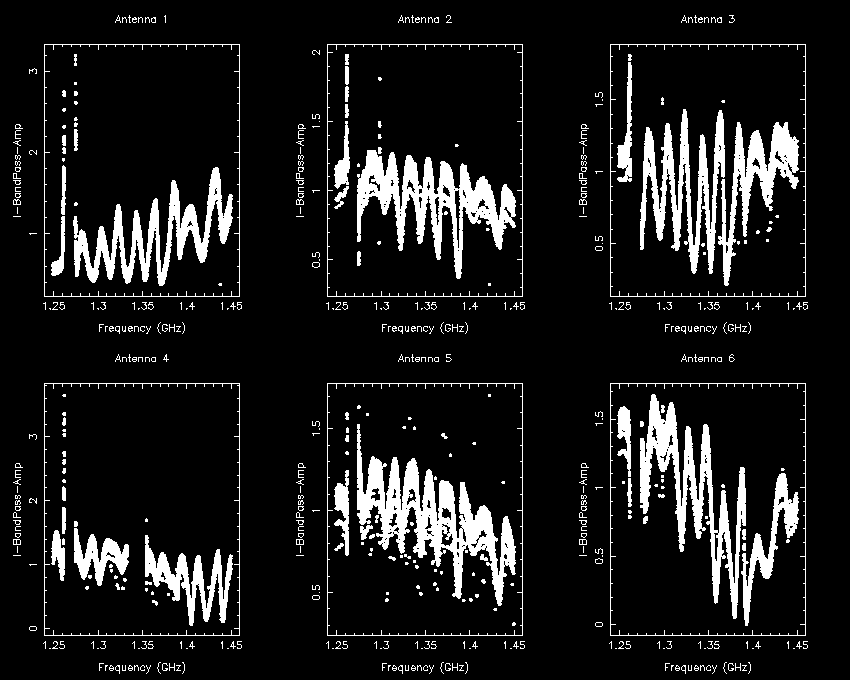

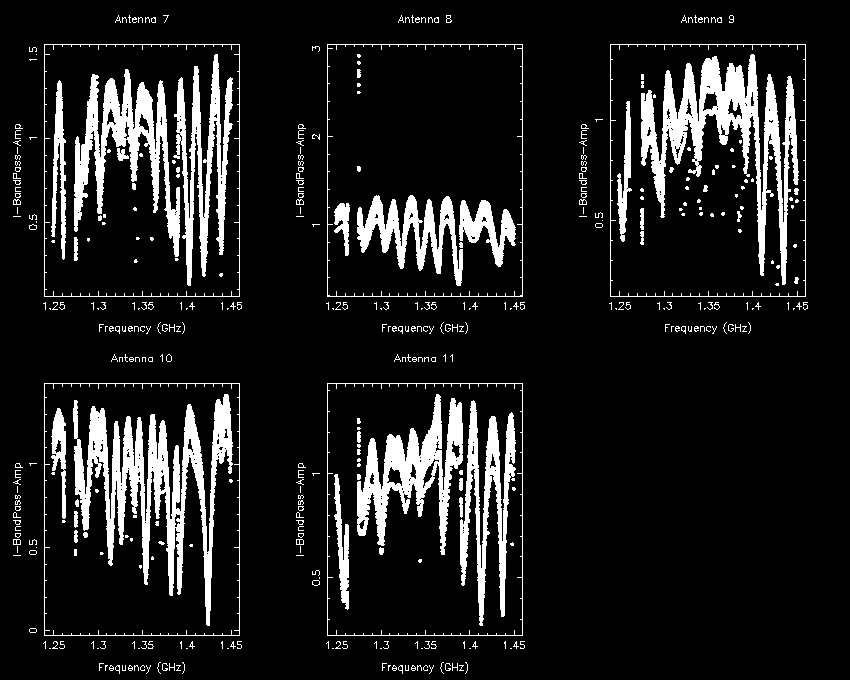

In [10]:
"""Display BP amp plots"""

bpamplist_png = glob.glob(crosscal.crosscaldir+'/'+'bp_amp.gif*png')
#print atpltlist_png

#load each file as an image
x=Image(bpamplist_png[0])
y=Image(bpamplist_png[1])
#z=Image(atpltlist_png[2])
#w=Image(atpltlist_png[3])

#then display all images
display(x,y)

Bandpasses look terrible - why?

Could this be an issue with creating a stokes ii bandpass? Also, isn't that a terrible idea? Wouldn't we expect that the separate polarizations could have very different bandpasses?

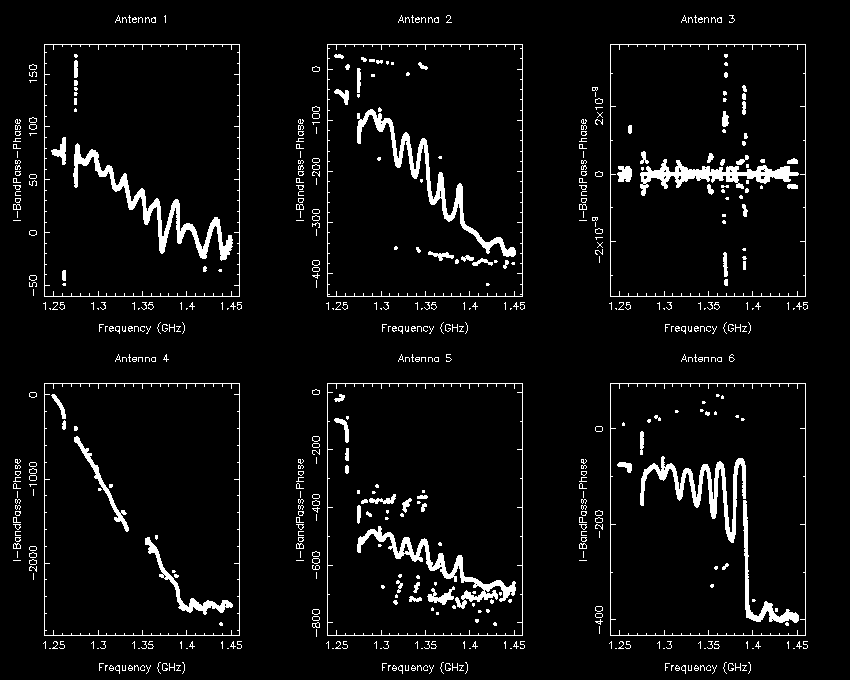

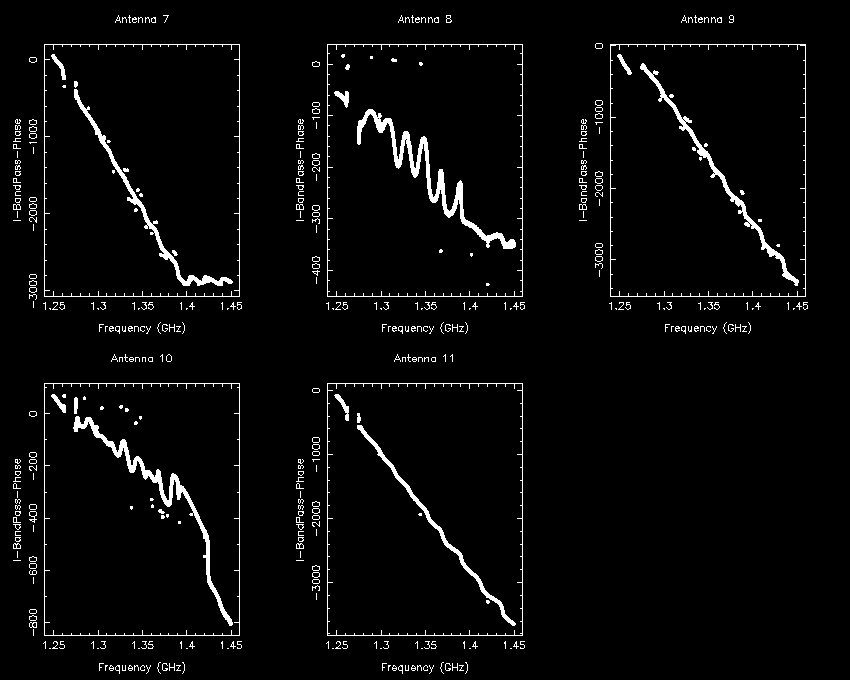

In [11]:
"""Display BP phase plots"""

bpphaselist_png = glob.glob(crosscal.crosscaldir+'/'+'bp_phase.gif*png')
#print atpltlist_png

#load each file as an image
x=Image(bpphaselist_png[0])
y=Image(bpphaselist_png[1])
#z=Image(atpltlist_png[2])
#w=Image(atpltlist_png[3])

#then display all images
display(x,y)

Phase is also terrbile. And now I'm convinced that there is a single stokes I solution, which is terrible. Because the behavior of the two polarizations is very different.

In [12]:
"""Print amplitude solutions"""
#there aren't instructive to dispaly - they're just points
#want to parse log file instead
##the output is stokes ii
#will subs.read_mirlog work?

gains,times = subs.readmirlog.get_gains(mir)

#print gains.shape

#Now I can try to print nicely:
print 'Telescope  Amplitude  Phase'
for i in xrange(gains.shape[0]):
    print '   {0}        {1}  {2}'.format(i,gains[i,:,0],gains[i,:,1])
    


Telescope  Amplitude  Phase
   0        [0.057]  [19.288]
   1        [0.064]  [-12.058]
   2        [0.082]  [-0.]
   3        [0.09]  [13.932]
   4        [0.073]  [9.69]
   5        [0.086]  [-25.168]
   6        [0.085]  [11.342]
   7        [0.039]  [-3.4]
   8        [0.06]  [-4.083]
   9        [0.066]  [-32.991]
   10        [0.054]  [4.544]
   11        [0.]  [0.]


Why are the values for ant11 (RTD) zero?

In [6]:
#Now move on to next stage and run selfcal
#Use default parameters and see how it goes (copy from default.cfg)
#mostly interested in timing and to see what sort of data is produced w/ minimal effort
scal=apercal.scal(cfgfile)
scal.reset()
scal.show()

SELFCAL - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_refant = 
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 5
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 3
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 5.0
	selfcal_standard_drinit = 50
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 45
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_standa

In [ ]:
startscal=timer()
scal.go()
endscal=timer()
print 'Elapsed time to selfcal the data is {} minutes'.format((end - start)/60.) #time in minutes
print 'Elapsed time to selfcal the data is {} hours'.format((end - start)/3600.) #time in hours
print 'Elapsed time to selfcal the data is {} days'.format((end - start)/(24*3600.)) #time in days

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.0125 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0015625 GHz #
SELFCAL - INFO : # Splitting of data chunk 0 for subband 0 done #
SELFCAL - INFO : # Starting splitting of data chunk 1 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 1 to keep bandwidth of chunks equal o

In [ ]:
print 'Elapsed time to selfcal the data is {} minutes'.format((end - start)/60.) #time in minutes
print 'Elapsed time to selfcal the data is {} hours'.format((end - start)/3600.) #time in hours
print 'Elapsed time to selfcal the data is {} days'.format((end - start)/(24*3600.)) #time in days

Below here..
<br><br><br><br><br><br><br><br><br><br>
is old code <br><br><br><br><br><br><br>
that may be useful

In [16]:
#load my python modules - colors!
import sys
sys.path.append('/home/adams/python')
import colors
import aplpy
#Yay! There is aplpy

import numpy as np
import matplotlib.pyplot as plt

cm_rainbow=colors.get_colormap("rainbow")
cm_linear=colors.get_colormap("linear")

#to be able to use latex in image text
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [18]:
%matplotlib inline

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.991e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.344e-03 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


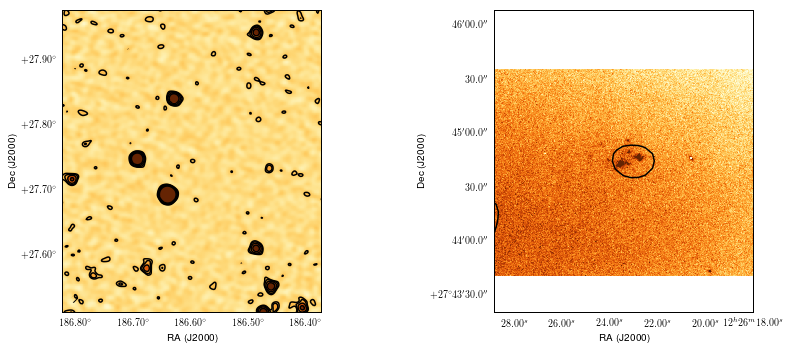

In [31]:
#Now I can work on plotting!
#Plus also comparing to NVSS

#First a quick plot: RC image,  plus Halpha image with RC overlay
#set coordinates of source:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
f1.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.02) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam(rcimage)
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
#f2.tick_labels.set_yformat('ddd.dd')
#f2.tick_labels.set_xformat('ddd.dd')
#f2.add_colorbar()
#f2.colorbar.show()
#f2.colorbar.set_axis_label_text(r'Jy')
#f2.colorbar.set_axis_label_font(size=18, weight='bold')



INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


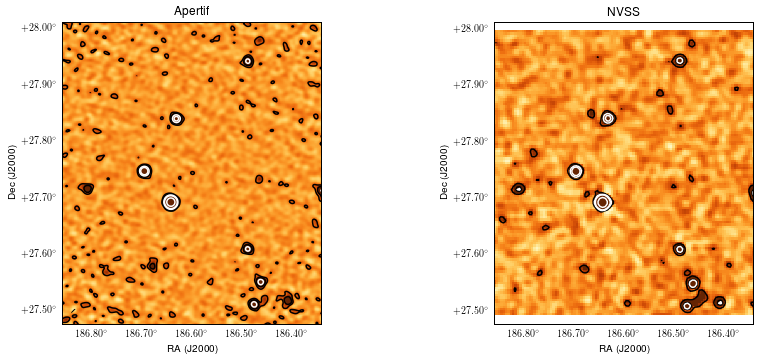

In [46]:
#Now look at NVSS vs Apertif data
#First just plot some comparisons
#Images for both, with contours from other
#Set contours at same absolute level

#Then would like to do a direct source comparison
#talk to Thijs about what he's done

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.005,0.01,0.05]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')



In [ ]:
#want to roughly get flux of source.
#Zoom in in kvis and do s to get max value - should be flux (peak flux is flux, I think/hope)
#answer is: 0.76 mJy, so almost 4sigm (3.8)

INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


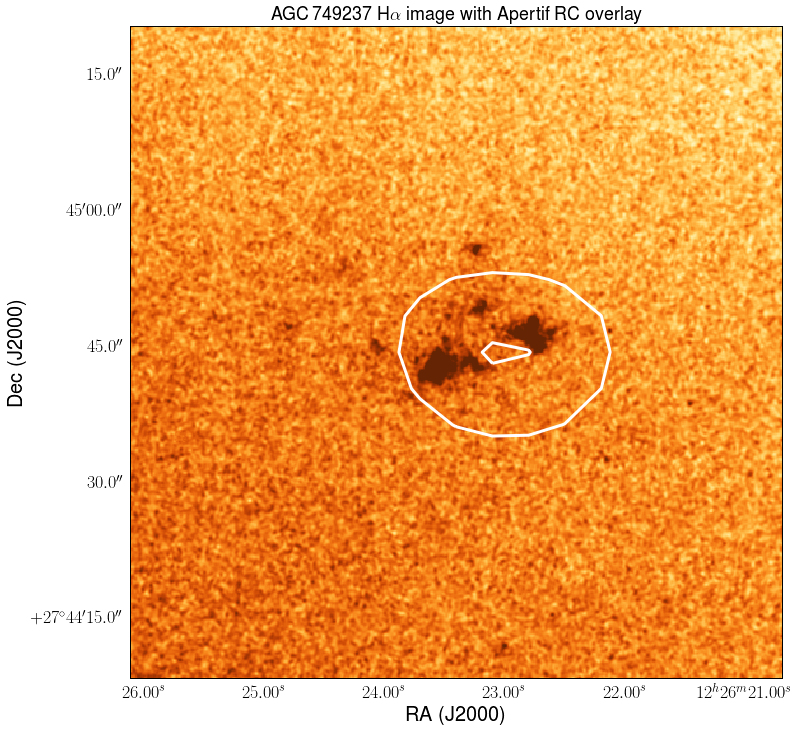

In [41]:
#make just a nice H-alpha RC overlay to focus on that

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]

fig=plt.figure(figsize=(12,12))

f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal')
f2.recenter(ra,dec, radius=0.01) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f2.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay',size=18)
f2.axis_labels.set_font(size=20)
f2.tick_labels.set_font(size=18)

plt.savefig('AGC749237_SF.png')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


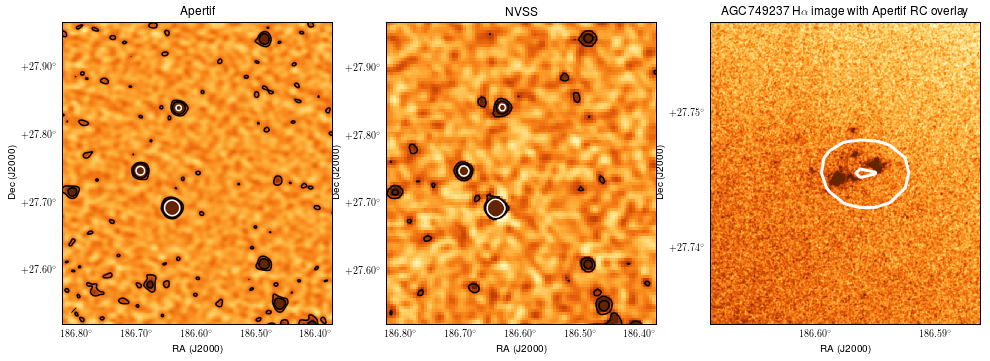

In [44]:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.01]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(15,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.25,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.4,0.15,0.25,0.7])
f2.recenter(ra,dec, radius=0.2) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')

rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]



f3=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.7,0.15,0.25,0.7])
f3.recenter(ra,dec, radius=0.01) 
f3.show_colorscale(cmap=plt.get_cmap(cm_linear))
f3.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f3.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay')
#f3.axis_labels.set_font(size=20)
#f3.tick_labels.set_font(size=18)
f3.tick_labels.set_yformat('ddd.dd')
f3.tick_labels.set_xformat('ddd.dd')


plt.savefig('agc749237.png')

In [ ]:
#Now I would like to actually measure continuum sources
#Both for comparison but also because I want a good measure of the flux of my "detection"

#want to use PyBDSF